# Analyse des ventes d'une librairie en ligne

# 1) Importation des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
import datetime
import seaborn as sns
import scipy

Customers = pd.read_csv('customers.csv', sep =',')
Products = pd.read_csv('products.csv', sep =',')
Transactions = pd.read_csv('transactions.csv', sep =',')

# 2) Exploration des données

## a) Nan

In [2]:
# Créons une fonction qui permet de tester s'il y a des Nan dans un dataframe
# et permet de réssumer les principales informations du dataframe

def Test_Nan(Machin):
    
    S = Machin.shape
    Nbre_Ligne = S[0]
    Nbre_Colonne = S[1]
    
    a = []
    b = []
    c = []
    d = []
    e = []
    
    # On calcul le nbre d'élément au début et après suppression des doublons
    
    a = Nbre_Ligne
    b = Machin.dropna().count()
    c = a - b
    
    # On compte les éléments sauf les Nan
    
    d = Machin.count()
    
    # e le nombre de Nan par colonne
    
    e = a - d
    
    if c[0] > 0:
        print(f"ATTENTION Il y a des Nan dans le dataframe testé !!!")
        print(f"Au total en supprimant les lignes avec Nan on va supprimer {c[0]} lignes sur {a} lignes au total \nsoit {(b[0]/a*100).round(2)} % de lignes conservées")
        for k in range(0,Nbre_Colonne,1):
            print(f"Il y a au total {e[k]} Nan sur la {k+1} ème colonne '{Machin.columns[k]}'")
            
    else:    
        print(f"Il n'y a pas de Nan dans le dataframe testé et il y {a} lignes au total")

# PS: J'ai pu tester en mettant des Nan dans un dataframe test et tout fonctionne
# On met Customers.iloc[0,2]= float("nan") pour insérer un Nan dans le dataframe Customers à la position [0,2]

In [3]:
Customers.head(10)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
5,c_415,m,1993
6,c_285,f,1967
7,c_160,f,1978
8,c_6446,m,1971
9,c_6866,m,1993


In [4]:
Test_Nan(Customers)

Il n'y a pas de Nan dans le dataframe testé et il y 8623 lignes au total


In [5]:
Products.head(10)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
5,0_1163,9.99,0
6,1_463,36.99,1
7,0_2157,34.99,0
8,0_1915,16.99,0
9,0_389,18.99,0


In [6]:
Test_Nan(Products)

Il n'y a pas de Nan dans le dataframe testé et il y 3287 lignes au total


In [7]:
Transactions.head(10)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478
6,0_1475,2022-06-03 04:45:09.871601,s_218033,c_7782
7,0_2110,2021-06-26 14:48:55.311418,s_54122,c_7456
8,0_1156,2022-12-27 12:27:40.641366,s_318058,c_7363
9,1_299,2021-11-29 15:54:25.880121,s_126880,c_1847


In [8]:
Test_Nan(Transactions)

Il n'y a pas de Nan dans le dataframe testé et il y 679532 lignes au total


## b) Doublons + stats descriptives des colonnes

### Table Customers 

In [9]:
Customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [10]:
Customers['client_id'].describe()

count       8623
unique      8623
top       c_7811
freq           1
Name: client_id, dtype: object

In [11]:
Customers['sex'].describe()

count     8623
unique       2
top          f
freq      4491
Name: sex, dtype: object

In [12]:
Customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [13]:
Count_Customers = Customers.groupby(["sex"]).count()
Count_Customers

,client_id,birth
sex,,
f,4491,4491
m,4132,4132


In [14]:
Count_Customers.iloc[1,0]

4132

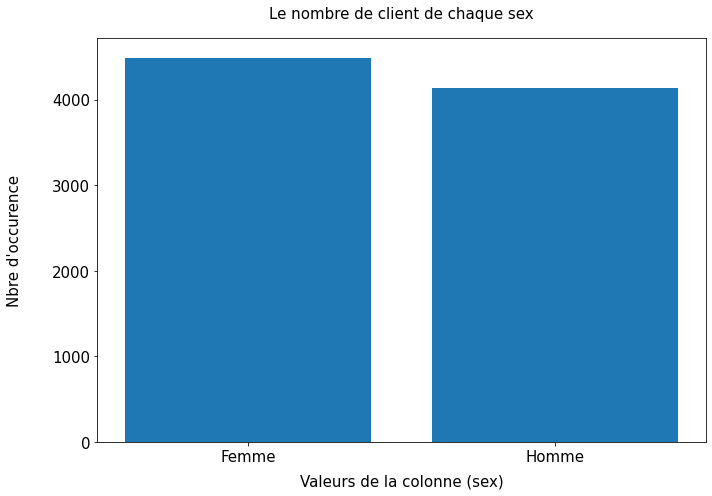

In [15]:

# Taille de la figure

fs = 15

plt.figure(figsize=(fs-5,fs-8))


# X et Y

# a nombre de femme

a = Count_Customers.iloc[0,0]

#b nbr d'homme

b = Count_Customers.iloc[1,0]

Y = [a,b]
X = ["Femme","Homme"]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"Nbre d'occurence", fontsize = fs, labelpad= 30)
plt.xlabel(u"Valeurs de la colonne (sex)", fontsize = fs, labelpad= 10)
plt.title(u"Le nombre de client de chaque sex", fontsize = fs, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Nbre_Client_Par_Sex.png")
plt.show()




In [16]:
Customers['birth'].describe().round(2)

count    8623.00
mean     1978.28
std        16.92
min      1929.00
25%      1966.00
50%      1979.00
75%      1992.00
max      2004.00
Name: birth, dtype: float64

In [17]:
# La date d'aujourd'hui

tday = datetime.date.today()

# L'année actuelle

Year = tday.year

# Mettre l'année automatiquement

Customers['age'] = Year - Customers["birth"]
Customers

,client_id,sex,birth,age
0,c_4410,f,1967,54
1,c_7839,f,1975,46
2,c_1699,f,1984,37
3,c_5961,f,1962,59
4,c_5320,m,1943,78
...,...,...,...,...
8618,c_7920,m,1956,65
8619,c_7403,f,1970,51
8620,c_5119,m,1974,47
8621,c_5643,f,1968,53


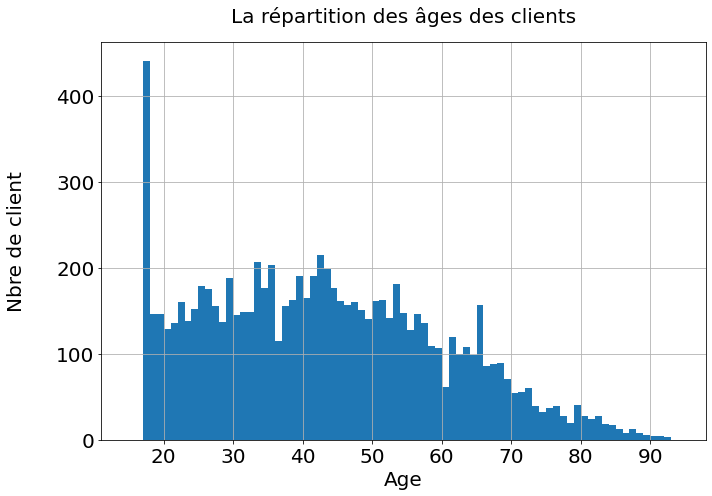

In [18]:
# Voici l'histogramme représentant l'âge de tous les clients


# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-8))

# Traçage de la courbe

Customers["age"].hist(figsize=(fs-10,fs-13), bins = np.arange(15,95,1))

# Customisation du graphique

plt.ylabel(u"Nbre de client", fontsize = fs, labelpad= 30)
plt.xlabel(u"Age", fontsize = fs )
plt.title(u"La répartition des âges des clients", fontsize = fs, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()


# Pour sauvegarder la figure

plt.savefig("P6_La_répartition_ages_clients.png")
plt.show()


In [19]:
Customers_17_ans = Customers["age"] == 17
DF_Cust_17_ans = Customers[Customers_17_ans]
DF_Cust_17_ans

,client_id,sex,birth,age
43,c_1046,m,2004,17
71,c_3081,m,2004,17
95,c_1418,f,2004,17
101,c_3338,m,2004,17
106,c_1774,f,2004,17
...,...,...,...,...
8584,c_461,f,2004,17
8594,c_294,m,2004,17
8598,c_5339,f,2004,17
8606,c_4077,m,2004,17


In [20]:
print(f"Il y a {DF_Cust_17_ans.count()[0]} clients qui ont 17 ans soit {((DF_Cust_17_ans.count()[0]*100)/(Customers['birth'].describe()[0])).round(2)} % des clients totaux")

Il y a 440 clients qui ont 17 ans soit 5.1 % des clients totaux


In [21]:
Customers["age"].describe().round(2)

count    8623.00
mean       42.72
std        16.92
min        17.00
25%        29.00
50%        42.00
75%        55.00
max        92.00
Name: age, dtype: float64

### Table Products

In [22]:
Products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [23]:
Products["id_prod"].describe()

count      3287
unique     3287
top       0_418
freq          1
Name: id_prod, dtype: object

In [24]:
Products["price"].describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

In [25]:
Masque_prix_inf_zero = Products["price"]<=0
Products[Masque_prix_inf_zero]

,id_prod,price,categ
731,T_0,-1.0,0


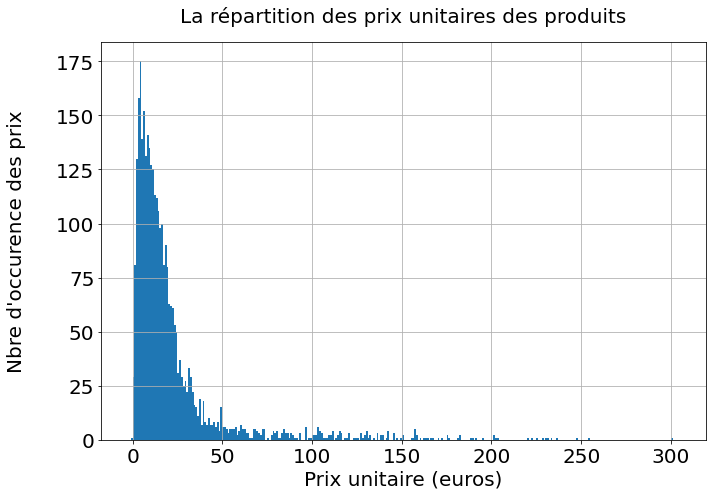

In [26]:
# Voici l'histogramme représentant le prix unitaire de tous les produits


# Taille de la figure

fs = 20

# Traçage de la courbe

Products["price"].hist(figsize=(fs-10,fs-13), bins = np.arange(-2,305,1))

# Customisation du graphique

plt.ylabel(u"Nbre d'occurence des prix", fontsize = fs, labelpad= 30)
plt.xlabel(u"Prix unitaire (euros)", fontsize = fs )
plt.title(u"La répartition des prix unitaires des produits", fontsize = fs, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()


# Pour sauvegarder la figure

plt.savefig("P6_La_répartitions_prix_unitaires.png")
plt.show()


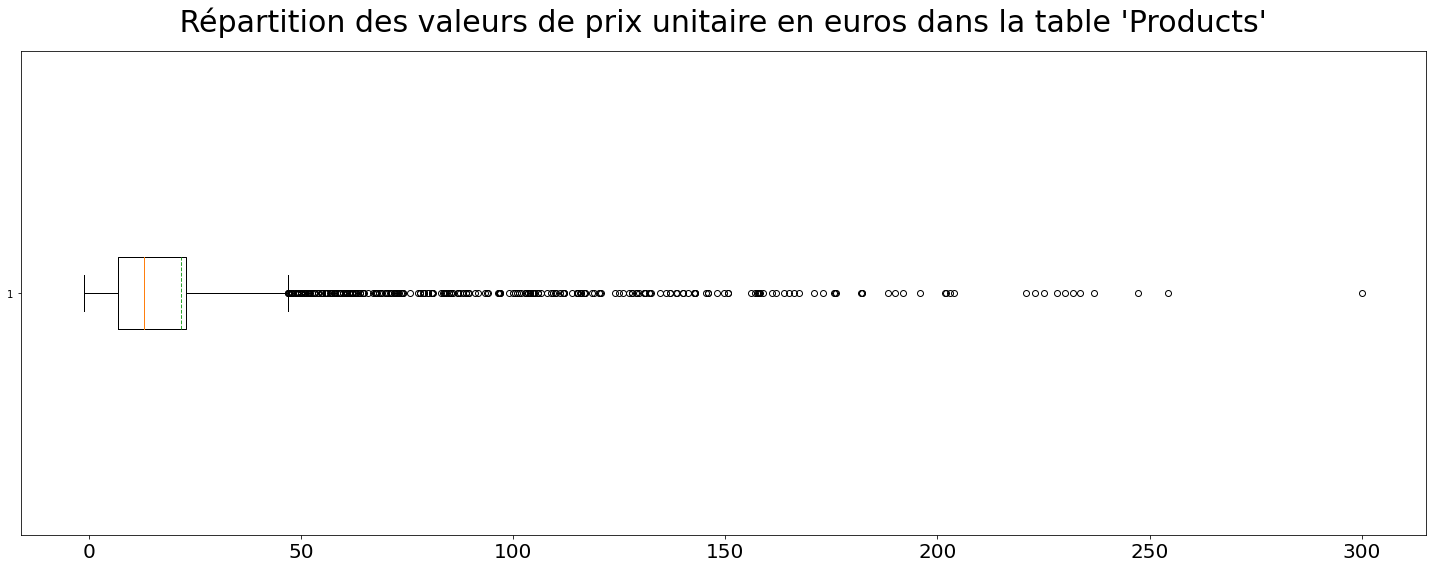

In [27]:
# Traçage des quartiles et identification des outliers gràce à la boîte à moustache

# Taille de la figure

fs = 20

plt.figure(figsize=(fs, fs-12))


# Traçage de la courbe

plt.boxplot(Products["price"], meanline = True, showmeans= True,  vert = False)

# Customisation du graphique

plt.title(u" Répartition des valeurs de prix unitaire en euros dans la table 'Products' ", fontsize = fs + 10, pad= 20)

# Taille des valeurs en légende

plt.xticks(fontsize=fs)

plt.tight_layout()



# Pour sauvegarder la figure

plt.savefig("P6_boite_moustache_outliers_prix.png")
plt.show()



In [28]:
A = Products["price"].describe()
A

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

In [29]:
# La moustache de droite est à 1.5 fois l'écart interquartile Q1-Q3

Moustache_droite_prix = 1.5*(A[6]-A[4])
Moustache_droite_prix

23.999999999999996

In [30]:
M_Outliers_Price = Products["price"] >= 24
Outliers_Price = Products[M_Outliers_Price]
Outliers_Price

,id_prod,price,categ
6,1_463,36.99,1
7,0_2157,34.99,0
10,2_228,225.17,2
11,1_178,51.92,1
15,0_1232,26.65,0
...,...,...,...
3271,2_123,147.99,2
3279,1_331,55.99,1
3282,2_23,115.99,2
3285,1_140,38.56,1


In [31]:
print(f"Il y a {Outliers_Price.count()[0]} valeurs avec un prix statistiquement aberrant soit {((100*Outliers_Price.count()[0])/(A[0])).round(2)} % de valeurs prix \nstatistiquement aberrantes au total ")

Il y a 744 valeurs avec un prix statistiquement aberrant soit 22.63 % de valeurs prix 
statistiquement aberrantes au total 


In [32]:
Products["categ"].describe().round(2)

count    3287.00
mean        0.37
std         0.62
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         2.00
Name: categ, dtype: float64

In [33]:
Count_Products = Products[["id_prod","categ"]].groupby(["categ"]).count()
Count_Products

,id_prod
categ,
0,2309
1,739
2,239


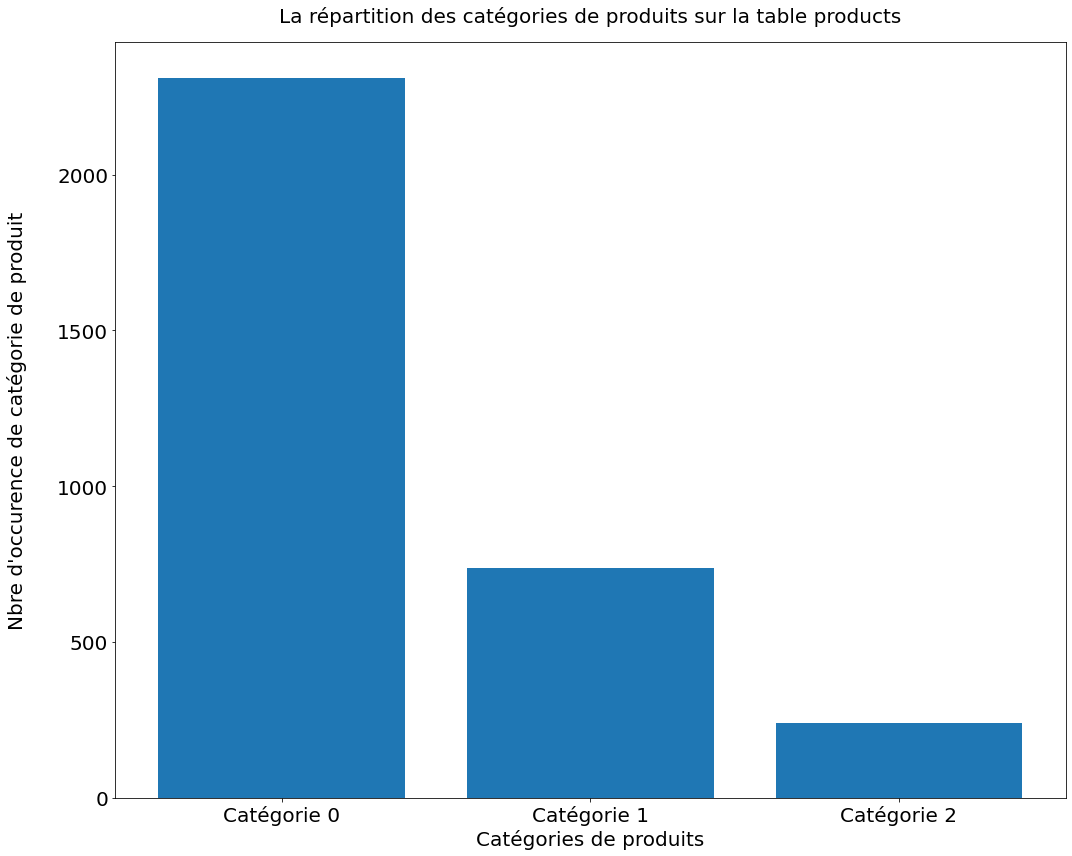

In [34]:
# Voici l'histogramme représentant les catégories de tous les produits


# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-8))

# X et Y

a = Count_Products.iloc[0,0]

b = Count_Products.iloc[1,0]

c = Count_Products.iloc[2,0]

Y = [a,b,c]

X = ["Catégorie 0","Catégorie 1","Catégorie 2"]


# Traçage de la courbe

plt.bar(X,Y)


# Customisation du graphique

plt.ylabel(u"Nbre d'occurence de catégorie de produit", fontsize = fs, labelpad= 30)
plt.xlabel(u"Catégories de produits", fontsize = fs )
plt.title(u"La répartition des catégories de produits sur la table products", fontsize = fs, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()



# Pour sauvegarder la figure

plt.savefig("P6_La_répartition_catégories_produits.png")
plt.show()


### Table Transactions

In [35]:
Transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [36]:
Transactions["id_prod"].describe()

count     679532
unique      3267
top        1_369
freq        2252
Name: id_prod, dtype: object

In [37]:
# Faisons un apreçu de la colonne date de transaction

Transactions['date']

0         2022-05-20 13:21:29.043970
1         2022-02-02 07:55:19.149409
2         2022-06-18 15:44:33.155329
3         2021-06-24 04:19:29.835891
4         2023-01-11 08:22:08.194479
                     ...            
679527    2022-01-15 13:05:06.246925
679528    2022-03-19 16:03:23.429229
679529    2022-12-20 04:33:37.584749
679530    2021-07-16 20:36:35.350579
679531    2022-09-28 01:12:01.973763
Name: date, Length: 679532, dtype: object

In [38]:
D = Transactions["date"].describe()
D

count                              679532
unique                             679371
top       test_2021-03-01 02:30:02.237413
freq                                   13
Name: date, dtype: object

In [39]:
print(f"Il y a {D[1]} date unique et {D[0]-D[1]} transactions simultanées ce qui est étrange avec une transaction précise \nà 6 chiffres après la seconde.")
print(f"De plus il y a la transaction {D[2]} qui est présente {D[3]} fois c.a.d que cette transaction \ns'est effectuée 13 fois pendant le même instant.")
print(f"On peut voir dans sa colonne date qu'il s'agit d'un test et non d'un piratage ou d'un problème")

Il y a 679371 date unique et 161 transactions simultanées ce qui est étrange avec une transaction précise 
à 6 chiffres après la seconde.
De plus il y a la transaction test_2021-03-01 02:30:02.237413 qui est présente 13 fois c.a.d que cette transaction 
s'est effectuée 13 fois pendant le même instant.
On peut voir dans sa colonne date qu'il s'agit d'un test et non d'un piratage ou d'un problème


In [40]:
Transactions["session_id"].describe()

count     679532
unique    342316
top          s_0
freq         200
Name: session_id, dtype: object

In [41]:
Transactions["client_id"].describe()

count     679532
unique      8602
top       c_1609
freq       25488
Name: client_id, dtype: object

## c) Préparation des données avant analyse

###  Les clients qui ont 17 ans

In [42]:
print(f"Il y a {DF_Cust_17_ans.count()[0]} clients qui ont 17 ans soit {((DF_Cust_17_ans.count()[0]*100)/(Customers['birth'].describe()[0])).round(2)} % des clients totaux")

Il y a 440 clients qui ont 17 ans soit 5.1 % des clients totaux


In [43]:
# Voici la liste de tous ces clients

DF_Cust_17_ans

,client_id,sex,birth,age
43,c_1046,m,2004,17
71,c_3081,m,2004,17
95,c_1418,f,2004,17
101,c_3338,m,2004,17
106,c_1774,f,2004,17
...,...,...,...,...
8584,c_461,f,2004,17
8594,c_294,m,2004,17
8598,c_5339,f,2004,17
8606,c_4077,m,2004,17


### Pb du prix négatif + des produits tests

In [44]:
# Voici les prix unitaires inférieurs à zéro

Products[Masque_prix_inf_zero]

,id_prod,price,categ
731,T_0,-1.0,0


In [45]:
Products.sort_values(["id_prod"],ascending=True)

,id_prod,price,categ
1001,0_0,3.75,0
803,0_1,10.99,0
2691,0_10,17.95,0
663,0_100,20.60,0
922,0_1000,6.84,0
...,...,...,...
2576,2_96,47.91,2
2698,2_97,160.99,2
3088,2_98,149.74,2
3188,2_99,84.99,2


In [46]:
# Vérifions si les catégories 1 ont leur id_prod commençant par 1

Categ_1 = Products["categ"] == 1
Products[Categ_1]

# => OK

,id_prod,price,categ
3,1_587,4.99,1
6,1_463,36.99,1
11,1_178,51.92,1
12,1_143,9.99,1
13,1_314,9.00,1
...,...,...,...
3270,1_651,18.99,1
3272,1_272,4.55,1
3278,1_387,9.99,1
3279,1_331,55.99,1


In [47]:
# Vérifions qu'il n'y a pas d'autre T avec la méthode contains

M1 = Products["id_prod"].str.contains("T"or"t")
Products[M1]

,id_prod,price,categ
731,T_0,-1.0,0


In [48]:
# Je décide de supprimer cette ligne
# PS: en lien avec la colonne date on peut voir qu'il y a des tests dont ce fameux test T_0

Products2 = Products[-M1] 
Products2

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


### Outliers prix

In [49]:
print(f"Il y a {Outliers_Price.count()[0]} valeurs avec un prix statistiquement aberrant soit {((100*Outliers_Price.count()[0])/(A[0])).round(2)} % de valeurs prix \nstatistiquement aberrantes au total ")

Il y a 744 valeurs avec un prix statistiquement aberrant soit 22.63 % de valeurs prix 
statistiquement aberrantes au total 


In [50]:
Outliers_Price

,id_prod,price,categ
6,1_463,36.99,1
7,0_2157,34.99,0
10,2_228,225.17,2
11,1_178,51.92,1
15,0_1232,26.65,0
...,...,...,...
3271,2_123,147.99,2
3279,1_331,55.99,1
3282,2_23,115.99,2
3285,1_140,38.56,1


### Préparation de la colonne date + sessions tests et clients tests identifiés

In [51]:
Transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [52]:
Transactions["date"].describe()

count                              679532
unique                             679371
top       test_2021-03-01 02:30:02.237413
freq                                   13
Name: date, dtype: object

In [53]:
print(f"Il y a {D[1]} date unique et {D[0]-D[1]} transactions simultanées ce qui est étrange avec une transaction précise \nà 6 chiffres après la seconde.")
print(f"De plus il y a la transaction {D[2]} qui est présente {D[3]} fois c.a.d que cette transaction \ns'est effectuée 13 fois pendant le même instant.")
print(f"On peut voir dans sa colonne date qu'il s'agit d'un test et non d'un piratage ou d'un problème")

Il y a 679371 date unique et 161 transactions simultanées ce qui est étrange avec une transaction précise 
à 6 chiffres après la seconde.
De plus il y a la transaction test_2021-03-01 02:30:02.237413 qui est présente 13 fois c.a.d que cette transaction 
s'est effectuée 13 fois pendant le même instant.
On peut voir dans sa colonne date qu'il s'agit d'un test et non d'un piratage ou d'un problème


In [54]:
# Cherchons les colonnes tests avec la méthode contains

M2 = Transactions["date"].str.contains("test"or"t"or"T")
Transactions[M2]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [55]:
#Prenons la table transactions sans toutes les transactions tests

Transactions2 = Transactions[-M2]
Transactions2


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [56]:
# Regardons la sessions test s_0

M3 = Transactions["session_id"] == 's_0'

Transactions[M3]

# Elle représente tous les tests déjà supprimés

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [57]:
# Effectivement

M4 = Transactions2["session_id"] == 's_0'

Transactions2[M4]

,id_prod,date,session_id,client_id


In [58]:
# Regardons le client_id ct_0 et ct_1

M5 = Transactions2["client_id"] == 'ct_0'
Transactions2[M5]


,id_prod,date,session_id,client_id


In [59]:
M6 = Transactions2["client_id"] == 'ct_1'
Transactions2[M6]

,id_prod,date,session_id,client_id


In [60]:
Transactions2["date"].describe()

count                         679332
unique                        679332
top       2021-09-13 05:52:38.851448
freq                               1
Name: date, dtype: object

In [61]:
Transactions2

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [62]:
# Je crée une copie pour faire les opérations car si je laissais Transactions2 j'avais un warning

Transactions3 = Transactions2.copy()
Transactions3

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [63]:
Transactions3["date"]

# Cette colonne est un objet on va le convertir en datetime pour extraire facilement la date et le temps

0         2022-05-20 13:21:29.043970
1         2022-02-02 07:55:19.149409
2         2022-06-18 15:44:33.155329
3         2021-06-24 04:19:29.835891
4         2023-01-11 08:22:08.194479
                     ...            
679527    2022-01-15 13:05:06.246925
679528    2022-03-19 16:03:23.429229
679529    2022-12-20 04:33:37.584749
679530    2021-07-16 20:36:35.350579
679531    2022-09-28 01:12:01.973763
Name: date, Length: 679332, dtype: object

In [64]:
Date_Time_Colonne = pd.to_datetime(Transactions3["date"])
Date_Time_Colonne

0        2022-05-20 13:21:29.043970
1        2022-02-02 07:55:19.149409
2        2022-06-18 15:44:33.155329
3        2021-06-24 04:19:29.835891
4        2023-01-11 08:22:08.194479
                    ...            
679527   2022-01-15 13:05:06.246925
679528   2022-03-19 16:03:23.429229
679529   2022-12-20 04:33:37.584749
679530   2021-07-16 20:36:35.350579
679531   2022-09-28 01:12:01.973763
Name: date, Length: 679332, dtype: datetime64[ns]

In [65]:
# Je crée 4 nouvelles colonnes pour tracer le CA en fonction du temps

Transactions3["Calendrier"] = Date_Time_Colonne.apply(lambda x: pd.Timestamp(x).strftime('%Y/%m/%d'))
Transactions3["Année"] = Date_Time_Colonne.apply(lambda x: pd.Timestamp(x).strftime('%Y'))
Transactions3["Année_Mois"] = Date_Time_Colonne.apply(lambda x: pd.Timestamp(x).strftime('%Y/%m'))
Transactions3["Jour"] = Date_Time_Colonne.apply(lambda x: pd.Timestamp(x).strftime('%d'))
Transactions3["Heure"] = Date_Time_Colonne.apply(lambda x: pd.Timestamp(x).strftime('%H-%M'))

Transactions3


,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022/05/20,2022,2022/05,20,13-21
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022/02/02,2022,2022/02,02,07-55
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022/06/18,2022,2022/06,18,15-44
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021/06/24,2021,2021/06,24,04-19
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023/01/11,2023,2023/01,11,08-22
...,...,...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022/01/15,2022,2022/01,15,13-05
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022/03/19,2022,2022/03,19,16-03
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022/12/20,2022,2022/12,20,04-33
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021/07/16,2021,2021/07,16,20-36


In [66]:
Transactions3.dtypes

id_prod       object
date          object
session_id    object
client_id     object
Calendrier    object
Année         object
Année_Mois    object
Jour          object
Heure         object
dtype: object

In [67]:
# je vais mettre la colonne calendrier en type temporelle
# et la colonne année en int

Transactions3["Calendrier"] = Transactions3["Calendrier"].apply(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d'))
Transactions3["Année"] = Transactions3["Année"].apply(lambda x: int(x))
Transactions3["Jour"] = Transactions3["Jour"].apply(lambda x: int(x))


Transactions3



,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022,2022/05,20,13-21
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022,2022/02,2,07-55
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022,2022/06,18,15-44
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021,2021/06,24,04-19
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023,2023/01,11,08-22
...,...,...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,2022,2022/01,15,13-05
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,2022,2022/03,19,16-03
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,2022,2022/12,20,04-33
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,2021,2021/07,16,20-36


In [68]:
Transactions3.dtypes

id_prod               object
date                  object
session_id            object
client_id             object
Calendrier    datetime64[ns]
Année                  int64
Année_Mois            object
Jour                   int64
Heure                 object
dtype: object

In [69]:
Transactions3["Calendrier"].describe(datetime_is_numeric=True)

count                           679332
mean     2022-03-03 03:12:07.300348416
min                2021-03-01 00:00:00
25%                2021-09-08 00:00:00
50%                2022-03-03 00:00:00
75%                2022-08-30 00:00:00
max                2023-02-28 00:00:00
Name: Calendrier, dtype: object

In [70]:
Transactions3 = Transactions3.sort_values(["Calendrier"], ascending=True)
Transactions3

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure
367642,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021,2021/03,1,21-50
615460,0_1115,2021-03-01 06:43:40.590384,s_134,c_7575,2021-03-01,2021,2021/03,1,06-43
301505,0_1434,2021-03-01 10:14:21.593374,s_206,c_226,2021-03-01,2021,2021/03,1,10-14
561805,2_43,2021-03-01 21:11:16.391272,s_437,c_7563,2021-03-01,2021,2021/03,1,21-11
438763,1_631,2021-03-01 05:43:45.601513,s_127,c_8607,2021-03-01,2021,2021/03,1,05-43
...,...,...,...,...,...,...,...,...,...
244301,1_283,2023-02-28 13:27:38.262457,s_348222,c_6775,2023-02-28,2023,2023/02,28,13-27
166547,0_1421,2023-02-28 12:37:59.788687,s_348221,c_7844,2023-02-28,2023,2023/02,28,12-37
250345,0_1333,2023-02-28 22:40:24.405750,s_348416,c_6714,2023-02-28,2023,2023/02,28,22-40
228185,2_12,2023-02-28 15:36:26.670993,s_348280,c_4958,2023-02-28,2023,2023/02,28,15-36


In [71]:
Count_Transac_Année_Mois = Transactions3.groupby(["Année_Mois"]).count()
Count_Transac_Année_Mois.head(10)

,id_prod,date,session_id,client_id,Calendrier,Année,Jour,Heure
Année_Mois,,,,,,,,
2021/03,28610,28610,28610,28610,28610,28610,28610,28610
2021/04,28457,28457,28457,28457,28457,28457,28457,28457
2021/05,28293,28293,28293,28293,28293,28293,28293,28293
2021/06,26857,26857,26857,26857,26857,26857,26857,26857
2021/07,24742,24742,24742,24742,24742,24742,24742,24742
2021/08,25659,25659,25659,25659,25659,25659,25659,25659
2021/09,33326,33326,33326,33326,33326,33326,33326,33326
2021/10,21606,21606,21606,21606,21606,21606,21606,21606
2021/11,28321,28321,28321,28321,28321,28321,28321,28321


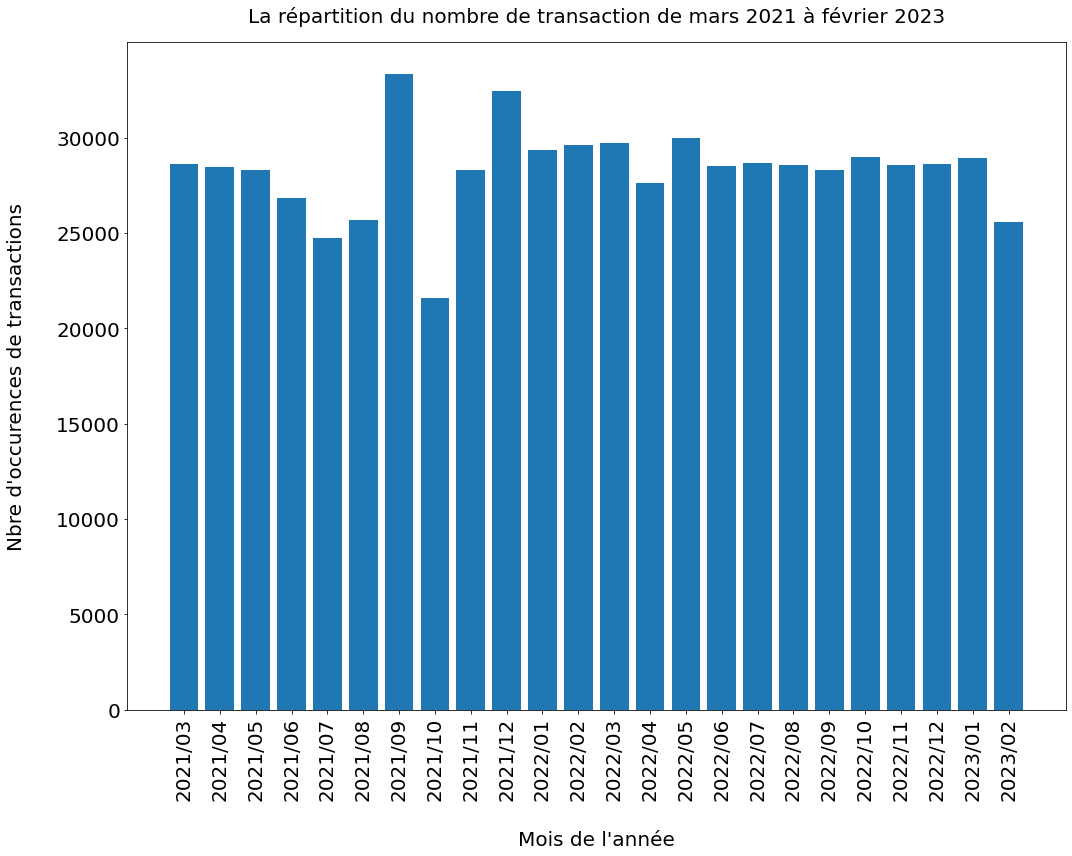

In [72]:
# Voici l'histogramme représentant le nombre de transactions par mois de mars 2021 à février 2023


# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-8))

# X et Y

Nbre_lignes = Count_Transac_Année_Mois.shape[0]
Nbre_Colonne = Count_Transac_Année_Mois.shape[1]

Y = [Count_Transac_Année_Mois.iloc[i,0] for i in range(Nbre_lignes)]
X = Count_Transac_Année_Mois.index

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"Nbre d'occurences de transactions", fontsize = fs, labelpad= 30)
plt.xlabel(u"Mois de l'année", fontsize = fs, labelpad= 30 )
plt.title(u"La répartition du nombre de transaction de mars 2021 à février 2023", fontsize = fs, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_La_répartition_Nbre_Transaction_2021_2023.png")
plt.show()

# 3) Tables utilisées pour l'analyse

## Products2 

In [73]:
# Pour résumer voici les tables utilisées: Products2 + Customers 2 + Transactions3

#Products2 sans le prix inférieur à 0 et avec les potentiles outliers qu'on prendra en compte dans l'analyse du CA ...

Products2

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [74]:
Test_Nan(Products2)

Il n'y a pas de Nan dans le dataframe testé et il y 3286 lignes au total


## Customers2

In [75]:
# La table customers avec les clients + ceux de 17 ans et les 2 client ct_0 test et ct_1 que je vais enlever
# Il ne va rester que la table Customers2 avec les clients + ceux de 17 ans

Customers

,client_id,sex,birth,age
0,c_4410,f,1967,54
1,c_7839,f,1975,46
2,c_1699,f,1984,37
3,c_5961,f,1962,59
4,c_5320,m,1943,78
...,...,...,...,...
8618,c_7920,m,1956,65
8619,c_7403,f,1970,51
8620,c_5119,m,1974,47
8621,c_5643,f,1968,53


In [76]:
M6 = Customers["client_id"] == 'ct_0'
Customers[M6]

,client_id,sex,birth,age
2735,ct_0,f,2001,20


In [77]:
M7 = Customers["client_id"] == 'ct_1'
Customers[M7]

,client_id,sex,birth,age
8494,ct_1,m,2001,20


In [78]:
Customers2 = Customers[(-M6)&(-M7)]
Customers2

# Avec les clients de 17 ans à étudier dans l'analyse

,client_id,sex,birth,age
0,c_4410,f,1967,54
1,c_7839,f,1975,46
2,c_1699,f,1984,37
3,c_5961,f,1962,59
4,c_5320,m,1943,78
...,...,...,...,...
8618,c_7920,m,1956,65
8619,c_7403,f,1970,51
8620,c_5119,m,1974,47
8621,c_5643,f,1968,53


In [79]:
Test_Nan(Customers2)

Il n'y a pas de Nan dans le dataframe testé et il y 8621 lignes au total


## Transactions3

In [80]:
# La table transactions3 sans aucuns tests avec la colonne date(date + heure) dont j'ai pris 
# les informations principales réparties dans d'autres colonnes pour tracer les courbes ...

Transactions3

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure
367642,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021,2021/03,1,21-50
615460,0_1115,2021-03-01 06:43:40.590384,s_134,c_7575,2021-03-01,2021,2021/03,1,06-43
301505,0_1434,2021-03-01 10:14:21.593374,s_206,c_226,2021-03-01,2021,2021/03,1,10-14
561805,2_43,2021-03-01 21:11:16.391272,s_437,c_7563,2021-03-01,2021,2021/03,1,21-11
438763,1_631,2021-03-01 05:43:45.601513,s_127,c_8607,2021-03-01,2021,2021/03,1,05-43
...,...,...,...,...,...,...,...,...,...
244301,1_283,2023-02-28 13:27:38.262457,s_348222,c_6775,2023-02-28,2023,2023/02,28,13-27
166547,0_1421,2023-02-28 12:37:59.788687,s_348221,c_7844,2023-02-28,2023,2023/02,28,12-37
250345,0_1333,2023-02-28 22:40:24.405750,s_348416,c_6714,2023-02-28,2023,2023/02,28,22-40
228185,2_12,2023-02-28 15:36:26.670993,s_348280,c_4958,2023-02-28,2023,2023/02,28,15-36


In [81]:
Test_Nan(Transactions3)

Il n'y a pas de Nan dans le dataframe testé et il y 679332 lignes au total


## Création de la table mère 

In [82]:
# Lions les données avec la fonction merge en créant une table mère et affichons le CA dans le temps

# CA par produit = Nbre de Ventes du produit * prix unitaire du produit
# CA total = Somme des CA pour tous les produits

# Ici une transation => cad une ligne dans la table transaction correspond à l'achat 
# d'un article en une quantité unique

# Donc si on somme toutes les transactions on a le CA global

Transac_Prod = pd.merge(Transactions3,Products2,on='id_prod',how='left')
Transac_Prod

# Transac_Prod correspond à tous les produits qui ont eu une transaction

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ
0,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021,2021/03,1,21-50,4.22,0.0
1,0_1115,2021-03-01 06:43:40.590384,s_134,c_7575,2021-03-01,2021,2021/03,1,06-43,6.99,0.0
2,0_1434,2021-03-01 10:14:21.593374,s_206,c_226,2021-03-01,2021,2021/03,1,10-14,8.58,0.0
3,2_43,2021-03-01 21:11:16.391272,s_437,c_7563,2021-03-01,2021,2021/03,1,21-11,69.99,2.0
4,1_631,2021-03-01 05:43:45.601513,s_127,c_8607,2021-03-01,2021,2021/03,1,05-43,14.99,1.0
...,...,...,...,...,...,...,...,...,...,...,...
679327,1_283,2023-02-28 13:27:38.262457,s_348222,c_6775,2023-02-28,2023,2023/02,28,13-27,14.99,1.0
679328,0_1421,2023-02-28 12:37:59.788687,s_348221,c_7844,2023-02-28,2023,2023/02,28,12-37,19.99,0.0
679329,0_1333,2023-02-28 22:40:24.405750,s_348416,c_6714,2023-02-28,2023,2023/02,28,22-40,5.99,0.0
679330,2_12,2023-02-28 15:36:26.670993,s_348280,c_4958,2023-02-28,2023,2023/02,28,15-36,57.91,2.0


In [83]:
# Déjà il y a une différence entre le left join et le inner join car ici il y a des Nan

Test_Nan(Transac_Prod)

ATTENTION Il y a des Nan dans le dataframe testé !!!
Au total en supprimant les lignes avec Nan on va supprimer 221 lignes sur 679332 lignes au total 
soit 99.97 % de lignes conservées
Il y a au total 0 Nan sur la 1 ème colonne 'id_prod'
Il y a au total 0 Nan sur la 2 ème colonne 'date'
Il y a au total 0 Nan sur la 3 ème colonne 'session_id'
Il y a au total 0 Nan sur la 4 ème colonne 'client_id'
Il y a au total 0 Nan sur la 5 ème colonne 'Calendrier'
Il y a au total 0 Nan sur la 6 ème colonne 'Année'
Il y a au total 0 Nan sur la 7 ème colonne 'Année_Mois'
Il y a au total 0 Nan sur la 8 ème colonne 'Jour'
Il y a au total 0 Nan sur la 9 ème colonne 'Heure'
Il y a au total 221 Nan sur la 10 ème colonne 'price'
Il y a au total 221 Nan sur la 11 ème colonne 'categ'


In [84]:
# En fouillant j'ai pu trouver l'unique produit qui a eu des transactions mais où l'on a pas d'infos sur le prix

Nan_Trans_Prod = Transac_Prod["price"].isna()
Produit_Vendu_Sans_info_Prix = Transac_Prod[Nan_Trans_Prod]
Produit_Vendu_Sans_info_Prix

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ
251,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,2021-03-01,2021,2021/03,1,00-09,NaN,NaN
1167,0_2245,2021-03-02 15:55:49.728644,s_783,c_8060,2021-03-02,2021,2021/03,2,15-55,NaN,NaN
6204,0_2245,2021-03-07 20:00:01.525768,s_3159,c_1189,2021-03-07,2021,2021/03,7,20-00,NaN,NaN
20686,0_2245,2021-03-23 15:57:44.266387,s_10427,c_5869,2021-03-23,2021,2021/03,23,15-57,NaN,NaN
25323,0_2245,2021-03-28 10:46:04.804784,s_12567,c_966,2021-03-28,2021,2021/03,28,10-46,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
662331,0_2245,2023-02-10 11:54:44.891532,s_339558,c_6952,2023-02-10,2023,2023/02,10,11-54,NaN,NaN
667240,0_2245,2023-02-16 05:53:01.627491,s_342289,c_7954,2023-02-16,2023,2023/02,16,05-53,NaN,NaN
668167,0_2245,2023-02-17 20:34:06.230094,s_343000,c_1551,2023-02-17,2023,2023/02,17,20-34,NaN,NaN
668919,0_2245,2023-02-17 03:03:12.668129,s_342683,c_1533,2023-02-17,2023,2023/02,17,03-03,NaN,NaN


In [85]:
# Je vais créer Transac_prod2 pour enlever les Nan de transac prod et garder ces 2 dataframes en mémoire

Transac_Prod2 = Transac_Prod.copy()
Transac_Prod2


,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ
0,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021,2021/03,1,21-50,4.22,0.0
1,0_1115,2021-03-01 06:43:40.590384,s_134,c_7575,2021-03-01,2021,2021/03,1,06-43,6.99,0.0
2,0_1434,2021-03-01 10:14:21.593374,s_206,c_226,2021-03-01,2021,2021/03,1,10-14,8.58,0.0
3,2_43,2021-03-01 21:11:16.391272,s_437,c_7563,2021-03-01,2021,2021/03,1,21-11,69.99,2.0
4,1_631,2021-03-01 05:43:45.601513,s_127,c_8607,2021-03-01,2021,2021/03,1,05-43,14.99,1.0
...,...,...,...,...,...,...,...,...,...,...,...
679327,1_283,2023-02-28 13:27:38.262457,s_348222,c_6775,2023-02-28,2023,2023/02,28,13-27,14.99,1.0
679328,0_1421,2023-02-28 12:37:59.788687,s_348221,c_7844,2023-02-28,2023,2023/02,28,12-37,19.99,0.0
679329,0_1333,2023-02-28 22:40:24.405750,s_348416,c_6714,2023-02-28,2023,2023/02,28,22-40,5.99,0.0
679330,2_12,2023-02-28 15:36:26.670993,s_348280,c_4958,2023-02-28,2023,2023/02,28,15-36,57.91,2.0


In [86]:
Describe_Transac_prod = Transac_Prod["price"].describe()
Describe_Transac_prod

count    679111.000000
mean         17.454773
std          18.328998
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [87]:
# je remplace les prix Nan par la moyenne des prix unitaires

Transac_Prod2["price_modif"] = Transac_Prod2["price"].fillna(Describe_Transac_prod[1])

# Je remplace les catégories Nan par 0 la catégories la plus répandues


Transac_Prod2["categ_modif"] = Transac_Prod2["categ"].fillna(0)

Transac_Prod2


,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif
0,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021,2021/03,1,21-50,4.22,0.0,4.22,0.0
1,0_1115,2021-03-01 06:43:40.590384,s_134,c_7575,2021-03-01,2021,2021/03,1,06-43,6.99,0.0,6.99,0.0
2,0_1434,2021-03-01 10:14:21.593374,s_206,c_226,2021-03-01,2021,2021/03,1,10-14,8.58,0.0,8.58,0.0
3,2_43,2021-03-01 21:11:16.391272,s_437,c_7563,2021-03-01,2021,2021/03,1,21-11,69.99,2.0,69.99,2.0
4,1_631,2021-03-01 05:43:45.601513,s_127,c_8607,2021-03-01,2021,2021/03,1,05-43,14.99,1.0,14.99,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,1_283,2023-02-28 13:27:38.262457,s_348222,c_6775,2023-02-28,2023,2023/02,28,13-27,14.99,1.0,14.99,1.0
679328,0_1421,2023-02-28 12:37:59.788687,s_348221,c_7844,2023-02-28,2023,2023/02,28,12-37,19.99,0.0,19.99,0.0
679329,0_1333,2023-02-28 22:40:24.405750,s_348416,c_6714,2023-02-28,2023,2023/02,28,22-40,5.99,0.0,5.99,0.0
679330,2_12,2023-02-28 15:36:26.670993,s_348280,c_4958,2023-02-28,2023,2023/02,28,15-36,57.91,2.0,57.91,2.0


In [88]:
# vérifions si tout à bien été remplacé

Test_Nan(Transac_Prod2)

ATTENTION Il y a des Nan dans le dataframe testé !!!
Au total en supprimant les lignes avec Nan on va supprimer 221 lignes sur 679332 lignes au total 
soit 99.97 % de lignes conservées
Il y a au total 0 Nan sur la 1 ème colonne 'id_prod'
Il y a au total 0 Nan sur la 2 ème colonne 'date'
Il y a au total 0 Nan sur la 3 ème colonne 'session_id'
Il y a au total 0 Nan sur la 4 ème colonne 'client_id'
Il y a au total 0 Nan sur la 5 ème colonne 'Calendrier'
Il y a au total 0 Nan sur la 6 ème colonne 'Année'
Il y a au total 0 Nan sur la 7 ème colonne 'Année_Mois'
Il y a au total 0 Nan sur la 8 ème colonne 'Jour'
Il y a au total 0 Nan sur la 9 ème colonne 'Heure'
Il y a au total 221 Nan sur la 10 ème colonne 'price'
Il y a au total 221 Nan sur la 11 ème colonne 'categ'
Il y a au total 0 Nan sur la 12 ème colonne 'price_modif'
Il y a au total 0 Nan sur la 13 ème colonne 'categ_modif'


In [89]:
Test_Nan(Transac_Prod)

ATTENTION Il y a des Nan dans le dataframe testé !!!
Au total en supprimant les lignes avec Nan on va supprimer 221 lignes sur 679332 lignes au total 
soit 99.97 % de lignes conservées
Il y a au total 0 Nan sur la 1 ème colonne 'id_prod'
Il y a au total 0 Nan sur la 2 ème colonne 'date'
Il y a au total 0 Nan sur la 3 ème colonne 'session_id'
Il y a au total 0 Nan sur la 4 ème colonne 'client_id'
Il y a au total 0 Nan sur la 5 ème colonne 'Calendrier'
Il y a au total 0 Nan sur la 6 ème colonne 'Année'
Il y a au total 0 Nan sur la 7 ème colonne 'Année_Mois'
Il y a au total 0 Nan sur la 8 ème colonne 'Jour'
Il y a au total 0 Nan sur la 9 ème colonne 'Heure'
Il y a au total 221 Nan sur la 10 ème colonne 'price'
Il y a au total 221 Nan sur la 11 ème colonne 'categ'


In [90]:
# Rq: Si je fais un outter join On peut remarquer que certains product_id n'ont pas été vendus 
# => Ceux sans transactions

pd.merge(Transactions3,Products2,on='id_prod',how='outer')

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ
0,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021.0,2021/03,1.0,21-50,4.22,0.0
1,0_1682,2021-03-07 08:44:14.451539,s_2963,c_2631,2021-03-07,2021.0,2021/03,7.0,08-44,4.22,0.0
2,0_1682,2021-03-23 22:13:15.453979,s_10546,c_6775,2021-03-23,2021.0,2021/03,23.0,22-13,4.22,0.0
3,0_1682,2021-03-23 09:46:54.869200,s_10307,c_85,2021-03-23,2021.0,2021/03,23.0,09-46,4.22,0.0
4,0_1682,2021-04-05 14:33:37.029851,s_16374,c_2176,2021-04-05,2021.0,2021/04,5.0,14-33,4.22,0.0
...,...,...,...,...,...,...,...,...,...,...,...
679348,0_1624,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,24.50,0.0
679349,2_86,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,132.36,2.0
679350,0_299,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,22.99,0.0
679351,0_510,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,23.66,0.0


In [91]:
# Rassemblons toutes les informations dans une table mère

Mother_Table = pd.merge(Transac_Prod2,Customers2,on='client_id',how='left')
Mother_Table

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age
0,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021,2021/03,1,21-50,4.22,0.0,4.22,0.0,f,1981,40
1,0_1115,2021-03-01 06:43:40.590384,s_134,c_7575,2021-03-01,2021,2021/03,1,06-43,6.99,0.0,6.99,0.0,m,1973,48
2,0_1434,2021-03-01 10:14:21.593374,s_206,c_226,2021-03-01,2021,2021/03,1,10-14,8.58,0.0,8.58,0.0,m,1984,37
3,2_43,2021-03-01 21:11:16.391272,s_437,c_7563,2021-03-01,2021,2021/03,1,21-11,69.99,2.0,69.99,2.0,f,1999,22
4,1_631,2021-03-01 05:43:45.601513,s_127,c_8607,2021-03-01,2021,2021/03,1,05-43,14.99,1.0,14.99,1.0,m,1974,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,1_283,2023-02-28 13:27:38.262457,s_348222,c_6775,2023-02-28,2023,2023/02,28,13-27,14.99,1.0,14.99,1.0,m,1983,38
679328,0_1421,2023-02-28 12:37:59.788687,s_348221,c_7844,2023-02-28,2023,2023/02,28,12-37,19.99,0.0,19.99,0.0,f,1979,42
679329,0_1333,2023-02-28 22:40:24.405750,s_348416,c_6714,2023-02-28,2023,2023/02,28,22-40,5.99,0.0,5.99,0.0,f,1968,53
679330,2_12,2023-02-28 15:36:26.670993,s_348280,c_4958,2023-02-28,2023,2023/02,28,15-36,57.91,2.0,57.91,2.0,m,1999,22


In [92]:
Test_Nan(Mother_Table)

ATTENTION Il y a des Nan dans le dataframe testé !!!
Au total en supprimant les lignes avec Nan on va supprimer 221 lignes sur 679332 lignes au total 
soit 99.97 % de lignes conservées
Il y a au total 0 Nan sur la 1 ème colonne 'id_prod'
Il y a au total 0 Nan sur la 2 ème colonne 'date'
Il y a au total 0 Nan sur la 3 ème colonne 'session_id'
Il y a au total 0 Nan sur la 4 ème colonne 'client_id'
Il y a au total 0 Nan sur la 5 ème colonne 'Calendrier'
Il y a au total 0 Nan sur la 6 ème colonne 'Année'
Il y a au total 0 Nan sur la 7 ème colonne 'Année_Mois'
Il y a au total 0 Nan sur la 8 ème colonne 'Jour'
Il y a au total 0 Nan sur la 9 ème colonne 'Heure'
Il y a au total 221 Nan sur la 10 ème colonne 'price'
Il y a au total 221 Nan sur la 11 ème colonne 'categ'
Il y a au total 0 Nan sur la 12 ème colonne 'price_modif'
Il y a au total 0 Nan sur la 13 ème colonne 'categ_modif'
Il y a au total 0 Nan sur la 14 ème colonne 'sex'
Il y a au total 0 Nan sur la 15 ème colonne 'birth'
Il y a au t

# 4)  Demande d'Antoine

## a)  Analyse du CA 

### Le CA Global sur 2021-2023

In [93]:
CA_Global_2021_2023 = Mother_Table["price_modif"].sum().round(2)
CA_Global_2021_2023

11857586.18

### Le CA par année 

In [94]:
# Regardons le CA sur 2021 / 2022 et 2023 et sur les 2 années révolues 2021-2021 et 2022-2023 

In [95]:
CA_par_année = Mother_Table[["id_prod","Année","price_modif"]].groupby(["Année"]).sum().round(2)
CA_par_année.rename(columns={'price_modif': 'CA'
                           }, inplace=True)
CA_par_année

,CA
Année,
2021,4772345.13
2022,6110776.38
2023,974464.68


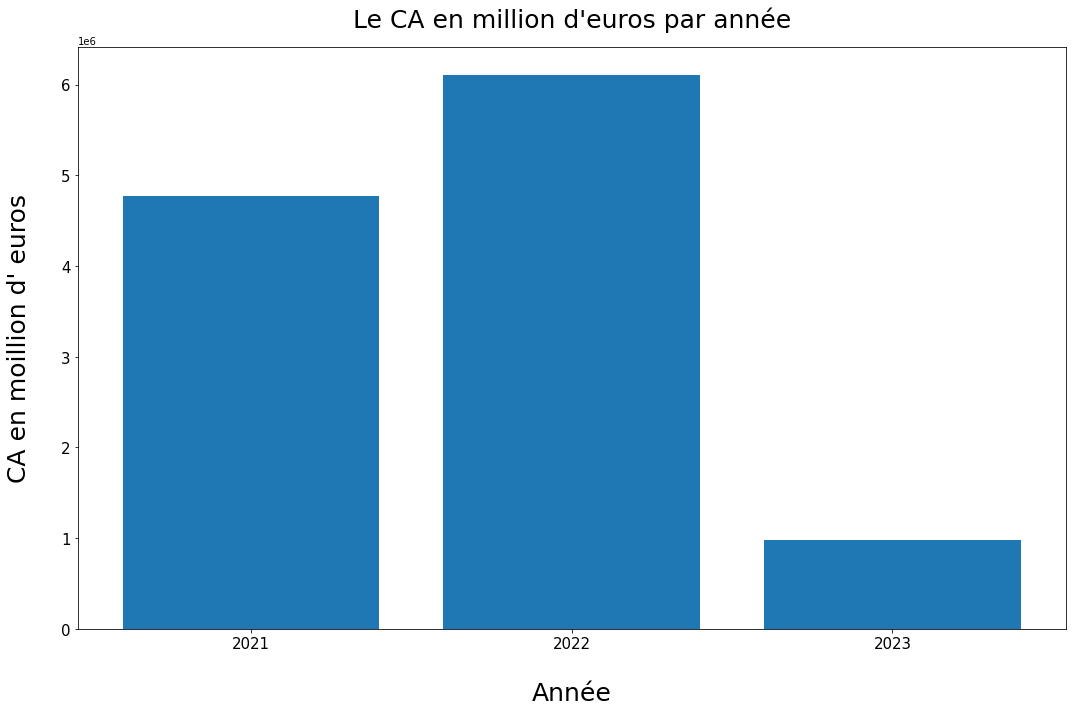

In [96]:
# Voici l'histogramme représentant les prix des produits invendus

# Taille de la figure

fs = 15

plt.figure(figsize=(fs,fs-5))

# X et Y

Y = CA_par_année["CA"]
X = [u"2021",u"2022",u"2023"]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"CA en moillion d' euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Année", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le CA en million d'euros par année", fontsize = fs+10, pad= 20)

# Set text labels.

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_CA_par_année.png")
plt.show()


In [97]:
Mother_Table

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age
0,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021,2021/03,1,21-50,4.22,0.0,4.22,0.0,f,1981,40
1,0_1115,2021-03-01 06:43:40.590384,s_134,c_7575,2021-03-01,2021,2021/03,1,06-43,6.99,0.0,6.99,0.0,m,1973,48
2,0_1434,2021-03-01 10:14:21.593374,s_206,c_226,2021-03-01,2021,2021/03,1,10-14,8.58,0.0,8.58,0.0,m,1984,37
3,2_43,2021-03-01 21:11:16.391272,s_437,c_7563,2021-03-01,2021,2021/03,1,21-11,69.99,2.0,69.99,2.0,f,1999,22
4,1_631,2021-03-01 05:43:45.601513,s_127,c_8607,2021-03-01,2021,2021/03,1,05-43,14.99,1.0,14.99,1.0,m,1974,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,1_283,2023-02-28 13:27:38.262457,s_348222,c_6775,2023-02-28,2023,2023/02,28,13-27,14.99,1.0,14.99,1.0,m,1983,38
679328,0_1421,2023-02-28 12:37:59.788687,s_348221,c_7844,2023-02-28,2023,2023/02,28,12-37,19.99,0.0,19.99,0.0,f,1979,42
679329,0_1333,2023-02-28 22:40:24.405750,s_348416,c_6714,2023-02-28,2023,2023/02,28,22-40,5.99,0.0,5.99,0.0,f,1968,53
679330,2_12,2023-02-28 15:36:26.670993,s_348280,c_4958,2023-02-28,2023,2023/02,28,15-36,57.91,2.0,57.91,2.0,m,1999,22


In [98]:
Masque_année1 = (Mother_Table["Année_Mois"]<="2022/02")
Masque_année1

0          True
1          True
2          True
3          True
4          True
          ...  
679327    False
679328    False
679329    False
679330    False
679331    False
Name: Année_Mois, Length: 679332, dtype: bool

In [99]:
Mother_Table_année1 = Mother_Table[Masque_année1]
Mother_Table_année1

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age
0,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021,2021/03,1,21-50,4.22,0.0,4.22,0.0,f,1981,40
1,0_1115,2021-03-01 06:43:40.590384,s_134,c_7575,2021-03-01,2021,2021/03,1,06-43,6.99,0.0,6.99,0.0,m,1973,48
2,0_1434,2021-03-01 10:14:21.593374,s_206,c_226,2021-03-01,2021,2021/03,1,10-14,8.58,0.0,8.58,0.0,m,1984,37
3,2_43,2021-03-01 21:11:16.391272,s_437,c_7563,2021-03-01,2021,2021/03,1,21-11,69.99,2.0,69.99,2.0,f,1999,22
4,1_631,2021-03-01 05:43:45.601513,s_127,c_8607,2021-03-01,2021,2021/03,1,05-43,14.99,1.0,14.99,1.0,m,1974,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337283,2_110,2022-02-28 10:12:20.667911,s_172131,c_1769,2022-02-28,2022,2022/02,28,10-12,62.25,2.0,62.25,2.0,m,1996,25
337284,1_392,2022-02-28 13:13:40.958647,s_172200,c_7108,2022-02-28,2022,2022/02,28,13-13,18.11,1.0,18.11,1.0,f,1961,60
337285,1_296,2022-02-28 00:32:05.527835,s_171938,c_1092,2022-02-28,2022,2022/02,28,00-32,24.67,1.0,24.67,1.0,f,1972,49
337286,0_1859,2022-02-28 09:55:50.204540,s_172128,c_1345,2022-02-28,2022,2022/02,28,09-55,4.99,0.0,4.99,0.0,m,1973,48


In [100]:
CA_année1 = Mother_Table_année1["price_modif"].sum().round(2)
CA_année1

5833534.89

In [101]:
Masque_année2 = (Mother_Table["Année_Mois"]>="2022/03")&(Mother_Table["Année_Mois"]<="2023/02")
Masque_année2

0         False
1         False
2         False
3         False
4         False
          ...  
679327     True
679328     True
679329     True
679330     True
679331     True
Name: Année_Mois, Length: 679332, dtype: bool

In [102]:
Mother_Table_année2 = Mother_Table[Masque_année2]
Mother_Table_année2

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age
337288,1_379,2022-03-01 16:54:59.857723,s_172793,c_1511,2022-03-01,2022,2022/03,1,16-54,26.99,1.0,26.99,1.0,f,1968,53
337289,0_1893,2022-03-01 06:57:24.744009,s_172592,c_1057,2022-03-01,2022,2022/03,1,06-57,18.99,0.0,18.99,0.0,f,1977,44
337290,1_84,2022-03-01 13:07:21.364987,s_172709,c_7942,2022-03-01,2022,2022/03,1,13-07,14.04,1.0,14.04,1.0,m,1974,47
337291,1_412,2022-03-01 22:45:49.243650,s_172902,c_1845,2022-03-01,2022,2022/03,1,22-45,16.65,1.0,16.65,1.0,m,1992,29
337292,1_282,2022-03-01 23:37:24.150950,s_172917,c_8112,2022-03-01,2022,2022/03,1,23-37,23.20,1.0,23.20,1.0,m,2004,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,1_283,2023-02-28 13:27:38.262457,s_348222,c_6775,2023-02-28,2023,2023/02,28,13-27,14.99,1.0,14.99,1.0,m,1983,38
679328,0_1421,2023-02-28 12:37:59.788687,s_348221,c_7844,2023-02-28,2023,2023/02,28,12-37,19.99,0.0,19.99,0.0,f,1979,42
679329,0_1333,2023-02-28 22:40:24.405750,s_348416,c_6714,2023-02-28,2023,2023/02,28,22-40,5.99,0.0,5.99,0.0,f,1968,53
679330,2_12,2023-02-28 15:36:26.670993,s_348280,c_4958,2023-02-28,2023,2023/02,28,15-36,57.91,2.0,57.91,2.0,m,1999,22


In [103]:
CA_année2 = Mother_Table_année2["price_modif"].sum().round(2)
CA_année2

6024051.29

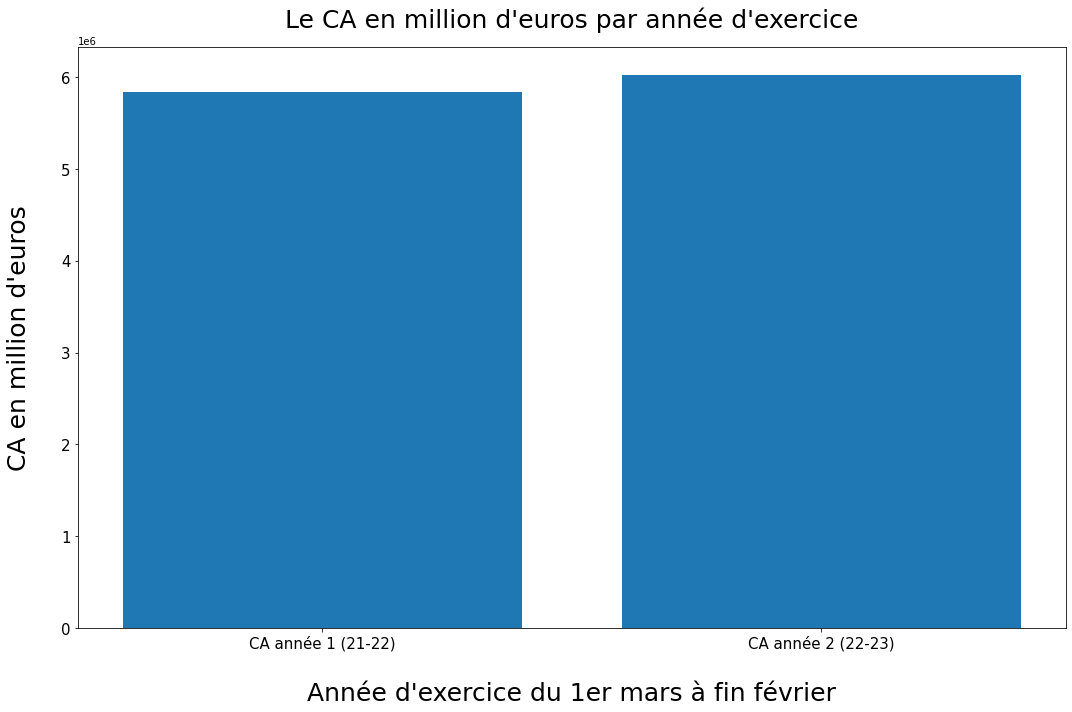

In [104]:
# Voici l'histogramme représentant les prix des produits invendus

# Taille de la figure

fs = 15

plt.figure(figsize=(fs,fs-5))

# X et Y

a = CA_année1
b = CA_année2

Y = [a,b]
X = [u"CA année 1 (21-22)",u"CA année 2 (22-23)"]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"CA en million d'euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Année d'exercice du 1er mars à fin février", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le CA en million d'euros par année d'exercice", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_CA_par_année_exercice.png")
plt.show()

In [105]:
print(f"Le CA de l'année d'exercice 1 est de {CA_année1} euros et pour l'année 2 de {CA_année2} euros")
print(f"La progression du CA entre l'année 1 et 2 est de  {((CA_année2-CA_année1)*100/(CA_année1)).round(2)} %")

Le CA de l'année d'exercice 1 est de 5833534.89 euros et pour l'année 2 de 6024051.29 euros
La progression du CA entre l'année 1 et 2 est de  3.27 %


### Le CA par mois 

In [106]:
CA_par_année_mois = Mother_Table[["id_prod","Année_Mois","price_modif"]].groupby(["Année_Mois"]).sum().round(2)
CA_par_année_mois.rename(columns={'price_modif': 'CA'
                           }, inplace=True)
CA_par_année_mois.head(10)

,CA
Année_Mois,
2021/03,482597.70
2021/04,476353.67
2021/05,493083.11
2021/06,484210.74
2021/07,482905.22
2021/08,482441.88
2021/09,507450.14
2021/10,320920.92
2021/11,516342.28


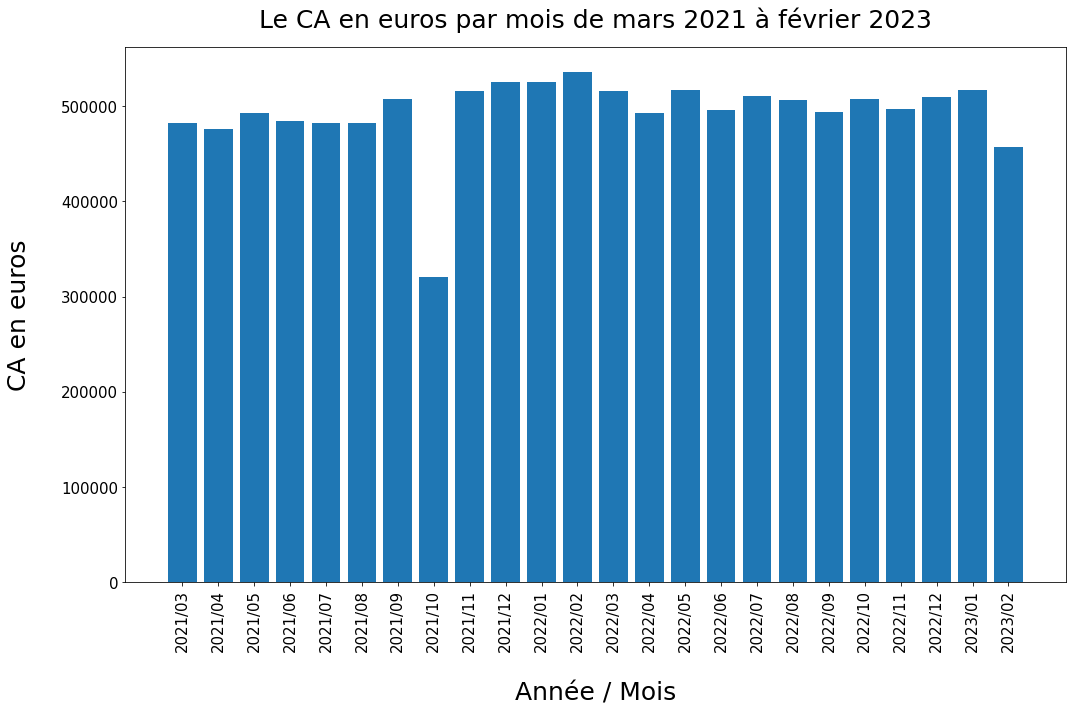

In [107]:
# Taille de la figure

fs = 15

plt.figure(figsize=(fs,fs-5))

# X et Y

Y = CA_par_année_mois["CA"]
X = CA_par_année_mois.index

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Année / Mois", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le CA en euros par mois de mars 2021 à février 2023", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs,rotation="vertical")
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_CA_par_mois.png")
plt.show()

In [108]:
CA_par_année_mois["CA"].describe().round(2)

count        24.00
mean     494066.09
std       41218.38
min      320920.92
25%      483884.36
50%      501731.92
75%      515821.97
max      535763.50
Name: CA, dtype: float64

In [109]:
# Déjà affichons le taux d'évolution du CA par mois

Taux_évo_CA_par_mois = [((CA_par_année_mois["CA"][i]-CA_par_année_mois["CA"][i-1])*100/(CA_par_année_mois["CA"][i-1])).round(2) for i in range(1,CA_par_année_mois.size)]

Taux_évo_CA_par_mois

[-1.29,
 3.51,
 -1.8,
 -0.27,
 -0.1,
 5.18,
 -36.76,
 60.89,
 1.88,
 -0.12,
 1.97,
 -3.75,
 -4.35,
 4.9,
 -4.11,
 2.99,
 -0.86,
 -2.43,
 2.8,
 -2.21,
 2.71,
 1.44,
 -11.76]

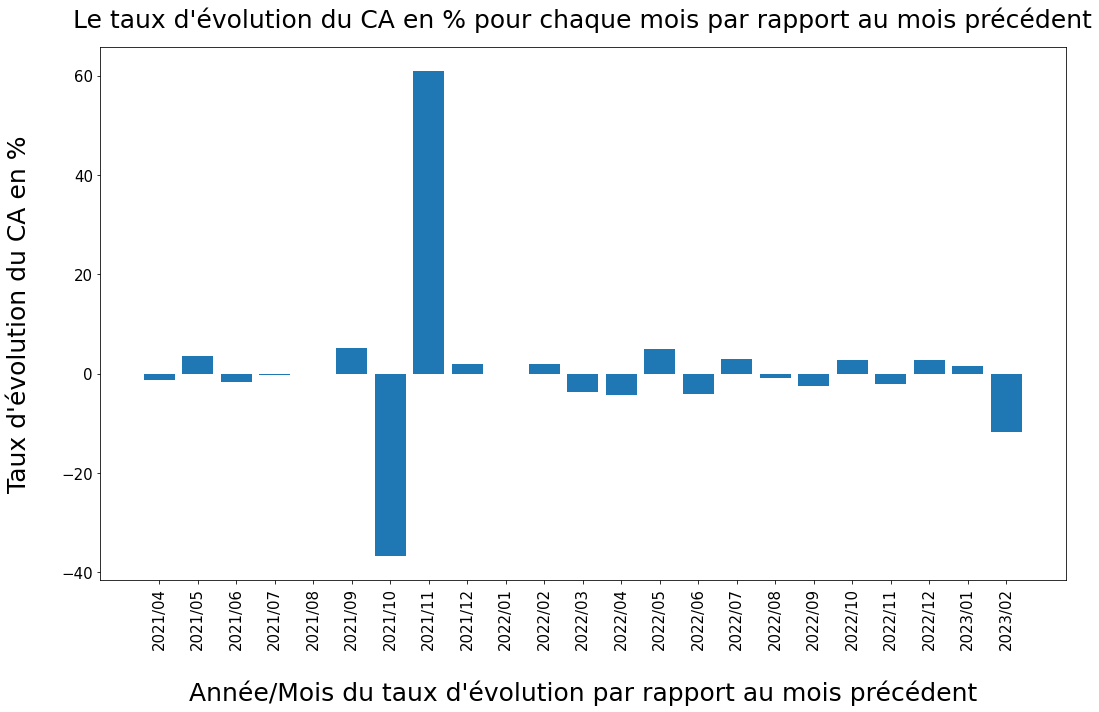

In [110]:
#Faisons-en une représentation graphique

# Taille de la figure

fs = 15

plt.figure(figsize=(fs,fs-5))

# X et Y

Y = Taux_évo_CA_par_mois
X = CA_par_année_mois.index[1:]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"Taux d'évolution du CA en %", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Année/Mois du taux d'évolution par rapport au mois précédent", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le taux d'évolution du CA en % pour chaque mois par rapport au mois précédent", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs,rotation="vertical")
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Taux_évolution_CA_par_mois.png")
plt.show()

### Regardons ce pb de baisse du CA en Octobre 2021 !

In [111]:
Mother_Table.head(5)

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age
0,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021,2021/03,1,21-50,4.22,0.0,4.22,0.0,f,1981,40
1,0_1115,2021-03-01 06:43:40.590384,s_134,c_7575,2021-03-01,2021,2021/03,1,06-43,6.99,0.0,6.99,0.0,m,1973,48
2,0_1434,2021-03-01 10:14:21.593374,s_206,c_226,2021-03-01,2021,2021/03,1,10-14,8.58,0.0,8.58,0.0,m,1984,37
3,2_43,2021-03-01 21:11:16.391272,s_437,c_7563,2021-03-01,2021,2021/03,1,21-11,69.99,2.0,69.99,2.0,f,1999,22
4,1_631,2021-03-01 05:43:45.601513,s_127,c_8607,2021-03-01,2021,2021/03,1,05-43,14.99,1.0,14.99,1.0,m,1974,47


In [112]:
Masque_Octobre2021 = (Mother_Table["Année_Mois"]=="2021/10")
Mother_Table_octobre_2021 = Mother_Table[Masque_Octobre2021]
Mother_Table_octobre_2021

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age
195944,0_1398,2021-10-01 05:48:39.708160,s_98283,c_4103,2021-10-01,2021,2021/10,1,05-48,4.52,0.0,4.52,0.0,f,1980,41
195945,0_1121,2021-10-01 09:43:45.079526,s_98348,c_7917,2021-10-01,2021,2021/10,1,09-43,19.99,0.0,19.99,0.0,f,1979,42
195946,1_425,2021-10-01 15:22:41.795599,s_98476,c_2854,2021-10-01,2021,2021/10,1,15-22,16.99,1.0,16.99,1.0,m,2004,17
195947,0_1616,2021-10-01 05:15:53.702856,s_98275,c_179,2021-10-01,2021,2021/10,1,05-15,13.50,0.0,13.50,0.0,m,1982,39
195948,0_1584,2021-10-01 01:17:40.611321,s_98196,c_1384,2021-10-01,2021,2021/10,1,01-17,11.85,0.0,11.85,0.0,m,1974,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217545,1_540,2021-10-31 05:34:04.424666,s_112585,c_1961,2021-10-31,2021,2021/10,31,05-34,6.59,1.0,6.59,1.0,m,1985,36
217546,0_1275,2021-10-31 02:41:59.516489,s_112533,c_1115,2021-10-31,2021,2021/10,31,02-41,3.99,0.0,3.99,0.0,f,1982,39
217547,1_712,2021-10-31 02:45:46.074812,s_112537,c_3007,2021-10-31,2021,2021/10,31,02-45,25.48,1.0,25.48,1.0,f,1992,29
217548,0_1411,2021-10-31 17:03:31.917547,s_112813,c_7471,2021-10-31,2021,2021/10,31,17-03,8.99,0.0,8.99,0.0,f,1969,52


In [113]:
Octobre_2021 = Mother_Table_octobre_2021[["Jour","price_modif"]].groupby(["Jour"]).sum().round(2)
Octobre_2021.rename(columns={'price_modif':'CA'}, inplace=True)
Octobre_2021

,CA
Jour,
1,17058.34
2,9182.13
3,8993.05
4,9314.59
5,9390.46
6,9490.69
7,8191.08
8,10207.35
9,9425.36


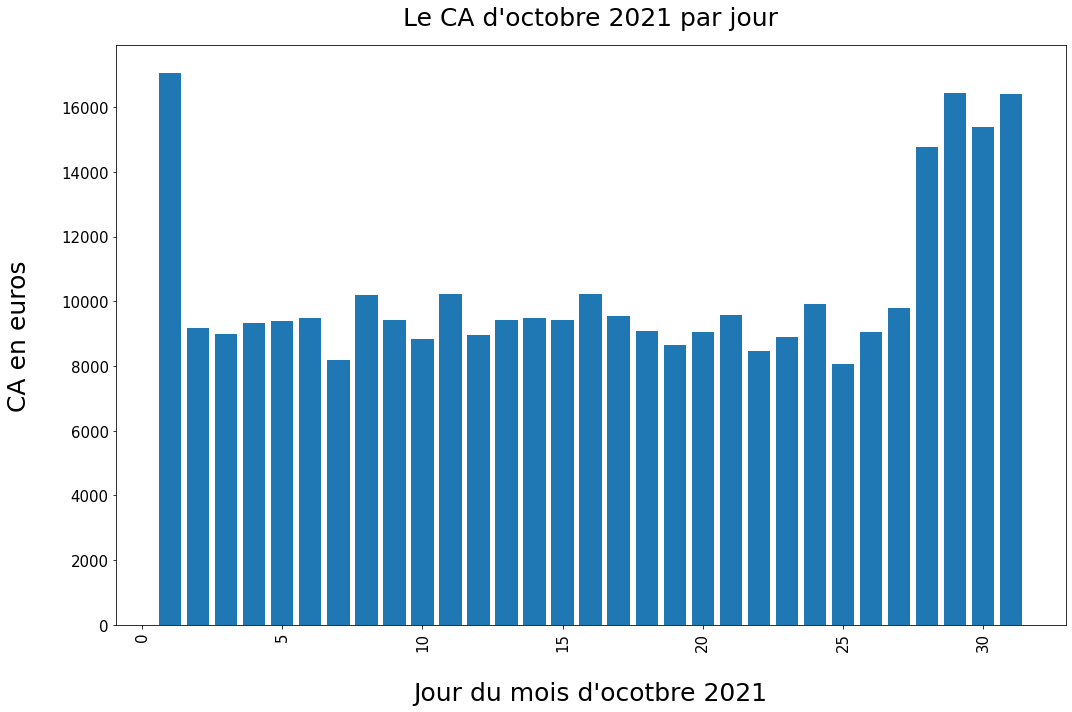

In [114]:
#Faisons-en une représentation graphique

# Taille de la figure

fs = 15

plt.figure(figsize=(fs,fs-5))

# X et Y

Y = Octobre_2021["CA"]
X = Octobre_2021.index[:]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Jour du mois d'ocotbre 2021", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le CA d'octobre 2021 par jour", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs,rotation="vertical")
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Octobre_2021.png")
plt.show()

In [115]:
Masque_Septembre2021 = (Mother_Table["Année_Mois"]=="2021/09")
Mother_Table_Septembre_2021 = Mother_Table[Masque_Septembre2021]
Mother_Table_Septembre_2021

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age
162618,1_400,2021-09-01 12:25:50.061706,s_83561,c_7700,2021-09-01,2021,2021/09,1,12-25,16.60,1.0,16.60,1.0,f,1967,54
162619,1_488,2021-09-01 14:02:07.713730,s_83591,c_4919,2021-09-01,2021,2021/09,1,14-02,12.19,1.0,12.19,1.0,m,1982,39
162620,1_599,2021-09-01 11:17:02.543895,s_83536,c_3644,2021-09-01,2021,2021/09,1,11-17,12.99,1.0,12.99,1.0,m,1991,30
162621,0_1958,2021-09-01 17:38:03.542625,s_83666,c_2101,2021-09-01,2021,2021/09,1,17-38,11.10,0.0,11.10,0.0,m,1988,33
162622,1_551,2021-09-01 15:37:43.964907,s_83621,c_4477,2021-09-01,2021,2021/09,1,15-37,14.99,1.0,14.99,1.0,f,1999,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195939,1_296,2021-09-30 01:41:13.855514,s_97692,c_3658,2021-09-30,2021,2021/09,30,01-41,24.67,1.0,24.67,1.0,m,1998,23
195940,0_1634,2021-09-30 11:12:25.187463,s_97891,c_7748,2021-09-30,2021,2021/09,30,11-12,5.80,0.0,5.80,0.0,f,1989,32
195941,0_1030,2021-09-30 00:45:42.559656,s_97673,c_7564,2021-09-30,2021,2021/09,30,00-45,13.73,0.0,13.73,0.0,m,1990,31
195942,0_1788,2021-09-30 22:05:38.816083,s_98125,c_8324,2021-09-30,2021,2021/09,30,22-05,8.34,0.0,8.34,0.0,m,1975,46


In [116]:
Masque_Novembre2021 = (Mother_Table["Année_Mois"]=="2021/11")
Mother_Table_Novembre_2021 = Mother_Table[Masque_Novembre2021]
Mother_Table_Novembre_2021

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age
217550,0_1230,2021-11-01 06:24:52.731640,s_113068,c_759,2021-11-01,2021,2021/11,1,06-24,12.83,0.0,12.83,0.0,f,1963,58
217551,1_598,2021-11-01 23:33:38.348468,s_113429,c_651,2021-11-01,2021,2021/11,1,23-33,14.05,1.0,14.05,1.0,m,1964,57
217552,0_1882,2021-11-01 11:06:11.255750,s_113162,c_4562,2021-11-01,2021,2021/11,1,11-06,15.95,0.0,15.95,0.0,m,1981,40
217553,1_412,2021-11-01 23:35:53.932825,s_113426,c_7208,2021-11-01,2021,2021/11,1,23-35,16.65,1.0,16.65,1.0,m,1979,42
217554,0_1399,2021-11-01 06:47:35.319990,s_113074,c_2156,2021-11-01,2021,2021/11,1,06-47,17.99,0.0,17.99,0.0,m,1978,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245866,0_1358,2021-11-30 19:49:27.743022,s_127453,c_304,2021-11-30,2021,2021/11,30,19-49,16.49,0.0,16.49,0.0,f,1988,33
245867,1_265,2021-11-30 06:49:39.034385,s_127197,c_6422,2021-11-30,2021,2021/11,30,06-49,24.99,1.0,24.99,1.0,m,1951,70
245868,1_538,2021-11-30 15:01:44.951130,s_127363,c_6871,2021-11-30,2021,2021/11,30,15-01,27.03,1.0,27.03,1.0,m,1969,52
245869,1_56,2021-11-30 00:21:17.962025,s_127055,c_2240,2021-11-30,2021,2021/11,30,00-21,13.98,1.0,13.98,1.0,m,1945,76


In [117]:
Septembre_2021 = Mother_Table_Septembre_2021[["Jour","price_modif"]].groupby(["Jour"]).sum().round(2)
Septembre_2021.rename(columns={'price_modif':'CA'}, inplace=True)
Septembre_2021

,CA
Jour,
1,15580.17
2,16015.98
3,16138.33
4,14771.23
5,15240.28
6,15967.34
7,16768.75
8,15474.50
9,16527.85


In [118]:
Novembre_2021 = Mother_Table_Novembre_2021[["Jour","price_modif"]].groupby(["Jour"]).sum().round(2)
Novembre_2021.rename(columns={'price_modif':'CA'}, inplace=True)
Novembre_2021

,CA
Jour,
1,17827.46
2,17872.17
3,15875.14
4,16512.38
5,16919.80
6,14841.96
7,16986.06
8,17175.84
9,15760.69


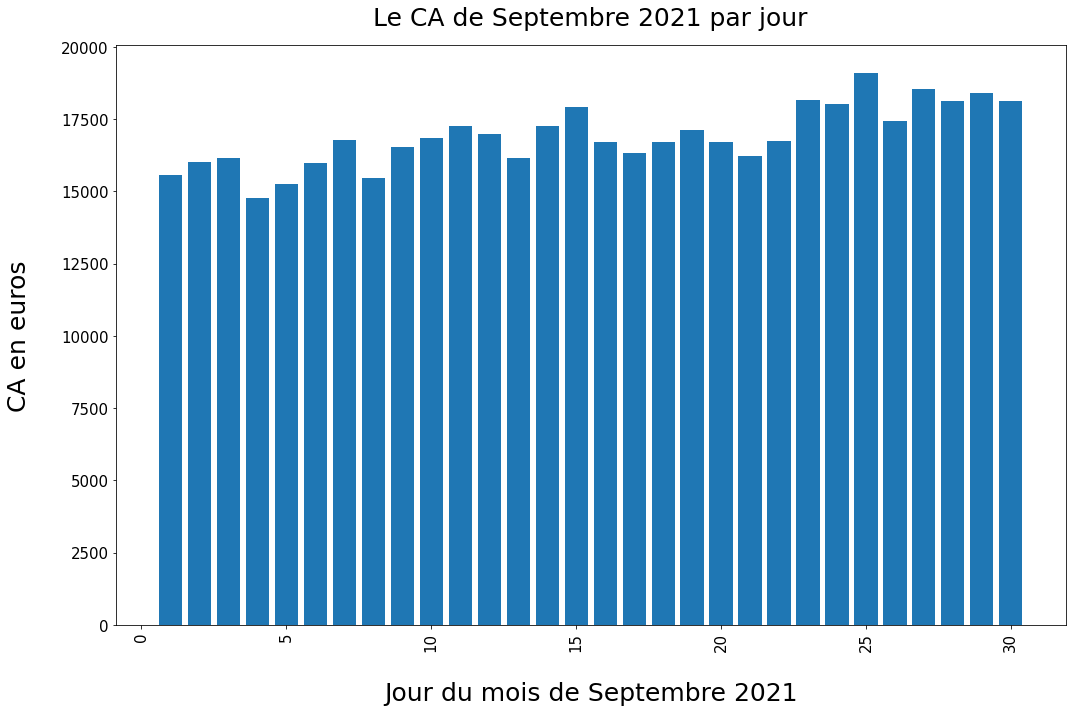

In [119]:
#Faisons-en une représentation graphique

# Taille de la figure

fs = 15

plt.figure(figsize=(fs,fs-5))

# X et Y

Y = Septembre_2021["CA"]
X = Septembre_2021.index[:]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Jour du mois de Septembre 2021", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le CA de Septembre 2021 par jour", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs,rotation="vertical")
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Septembre_2021.png")
plt.show()

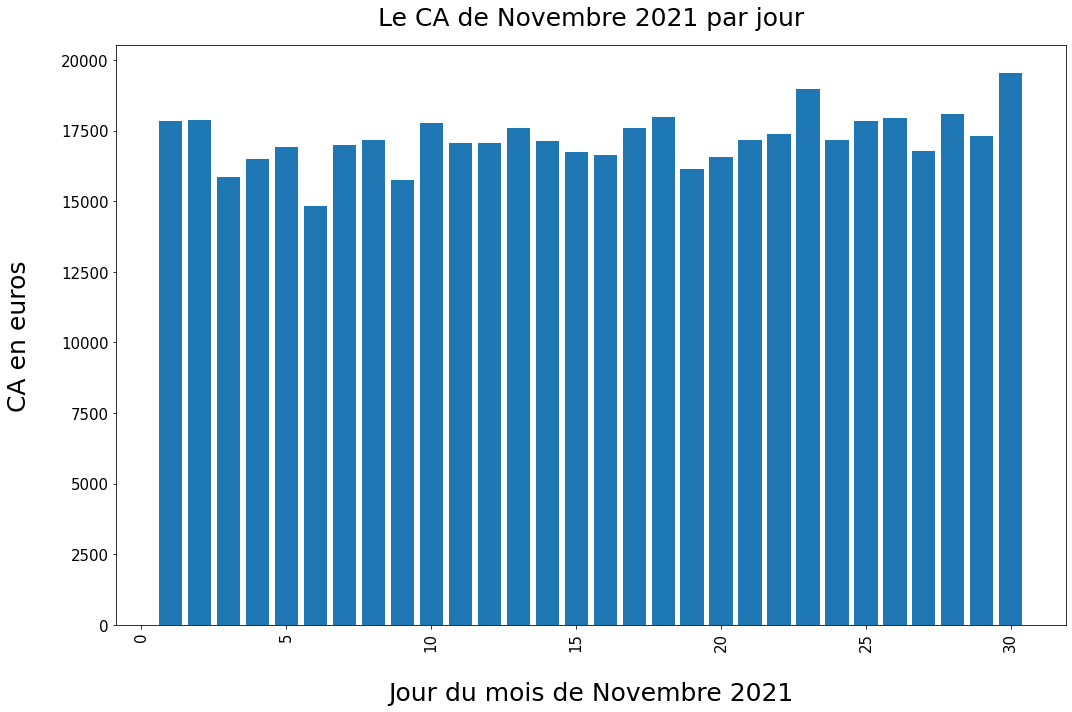

In [120]:
#Faisons-en une représentation graphique

# Taille de la figure

fs = 15

plt.figure(figsize=(fs,fs-5))

# X et Y

Y = Novembre_2021["CA"]
X = Novembre_2021.index[:]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Jour du mois de Novembre 2021", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le CA de Novembre 2021 par jour", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs,rotation="vertical")
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Novembre_2021.png")
plt.show()

## Demande du tuteur Moyenne mobile

In [121]:
# On va réafficher le CA en fonction du mois mias en calculant la moyenne du CA par mois sur une fenêtre plus grande

CA_par_année_mois = Mother_Table[["id_prod","Année_Mois","price_modif"]].groupby(["Année_Mois"]).sum().round(2)
CA_par_année_mois.rename(columns={'price_modif': 'CA'
                           }, inplace=True)
CA_par_année_mois.head(10)


,CA
Année_Mois,
2021/03,482597.70
2021/04,476353.67
2021/05,493083.11
2021/06,484210.74
2021/07,482905.22
2021/08,482441.88
2021/09,507450.14
2021/10,320920.92
2021/11,516342.28


In [122]:
# Je vais mettre mes index en datetime pour pouvoir calculer la moyenne mobile

CA_par_année_mois.index = pd.to_datetime(CA_par_année_mois.index)
CA_par_année_mois.index

DatetimeIndex(['2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', name='Année_Mois', freq=None)

In [123]:
# On utilise la fonction rolling qui définie la fênetre de valeur à prendre en compte pour appliquer 
# la moyenne ensuite

# J'ai pris ici 3 mois de fenêtre CENTREE => exemple en avril on va prendre le CA des 3 mois
# (mars / avril / Mai) ensuite on fait la moyenne 

w = 3

CA_par_année_mois_mobile = CA_par_année_mois.rolling(window = w,center=True).mean().round(2)
CA_par_année_mois_mobile.head(10)

# Rq: C'est normal que pour le premier mois il y a Nan car la fonction rolling ne peut pas prendre 
# le mois de février 2021 pour calculer 03/2021 car cette valeur n'existe pas.

,CA
Année_Mois,
2021-03-01,NaN
2021-04-01,484011.49
2021-05-01,484549.17
2021-06-01,486733.02
2021-07-01,483185.95
2021-08-01,490932.41
2021-09-01,436937.65
2021-10-01,448237.78
2021-11-01,454434.22


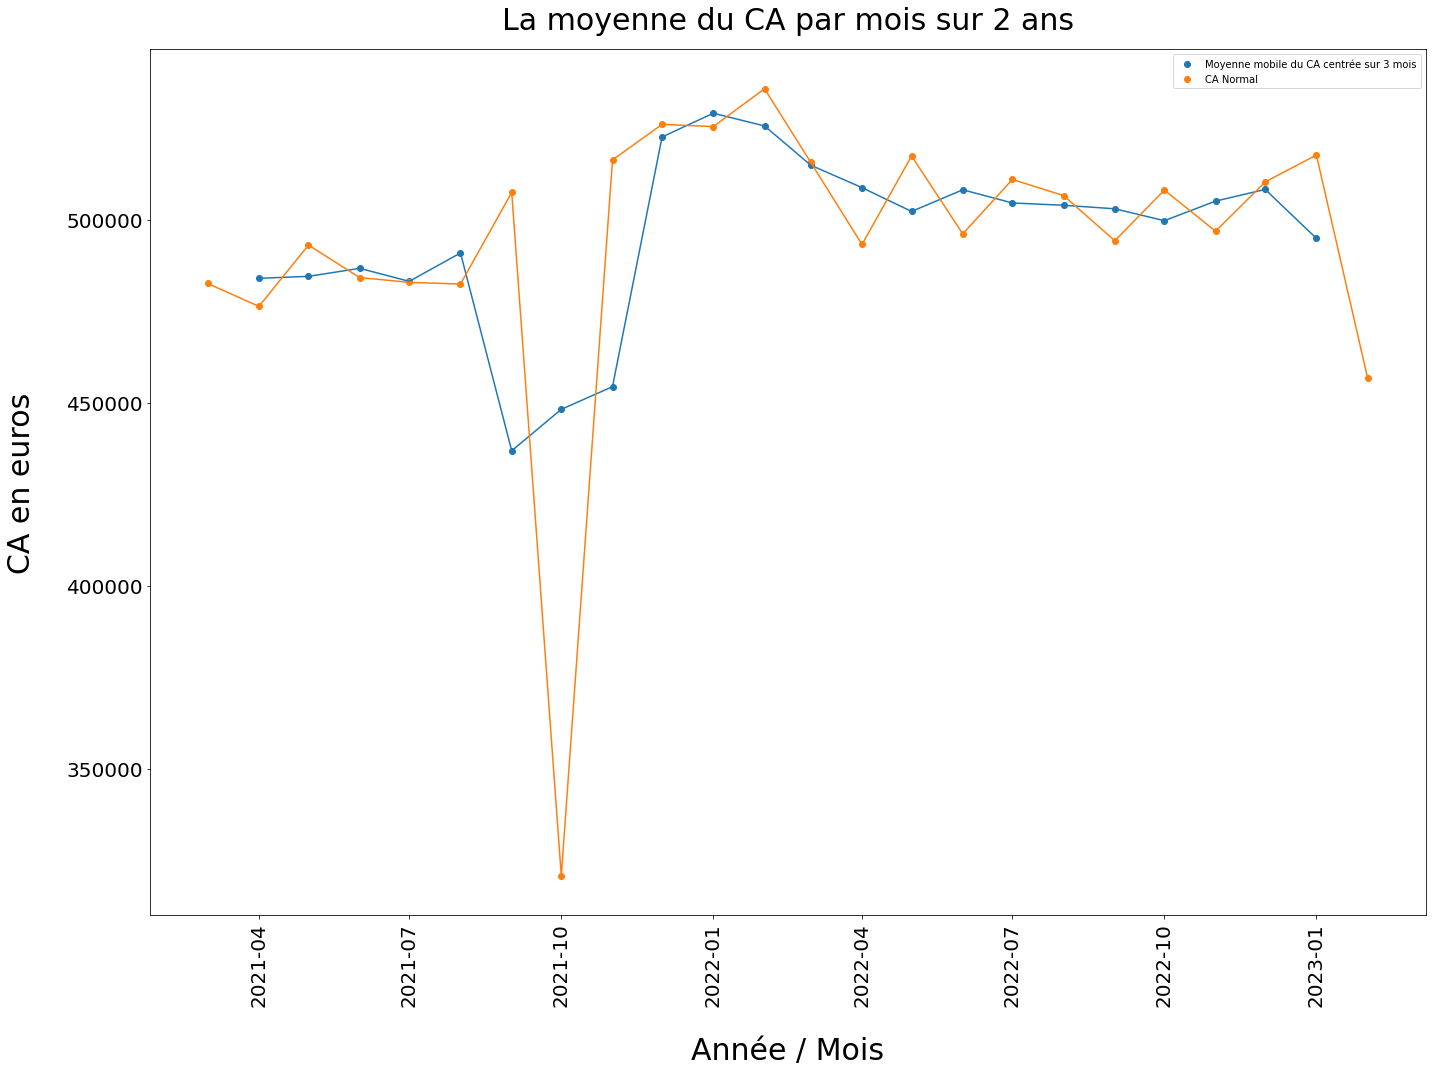

In [124]:
# Faisons-en une représentation graphique

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs-5))

# X et Y moyenne roulante

Y = CA_par_année_mois_mobile["CA"]
X = CA_par_année_mois_mobile.index[:]

# X et Y moyenne "normal"

Y2 = CA_par_année_mois["CA"]
X2 = CA_par_année_mois.index



# Traçage de la courbe

plt.scatter(X,Y,label="Moyenne mobile du CA centrée sur 3 mois")
plt.plot(X, Y)
plt.scatter(X2,Y2,label="CA Normal")
plt.plot(X2, Y2)


# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Année / Mois", fontsize = fs+10, labelpad= 30 )
plt.title(u"La moyenne du CA par mois sur 2 ans", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs,rotation="vertical")
plt.yticks(fontsize=fs)

plt.legend(loc='best')

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_CA_Mois_rolling.png")
plt.show()

In [125]:
# Il y a une autre manière de faire la moving average avec la fonction ewm qui fait un lissage de manière exponentiel 
# il suffit de définir un paramètre alpha

alpha1 = 0.2
alpha2 = 0.8

CA_par_année_mois_mobile1 = CA_par_année_mois.ewm(alpha = alpha1).mean().round(2)
CA_par_année_mois_mobile2 = CA_par_année_mois.ewm(alpha = alpha2).mean().round(2)

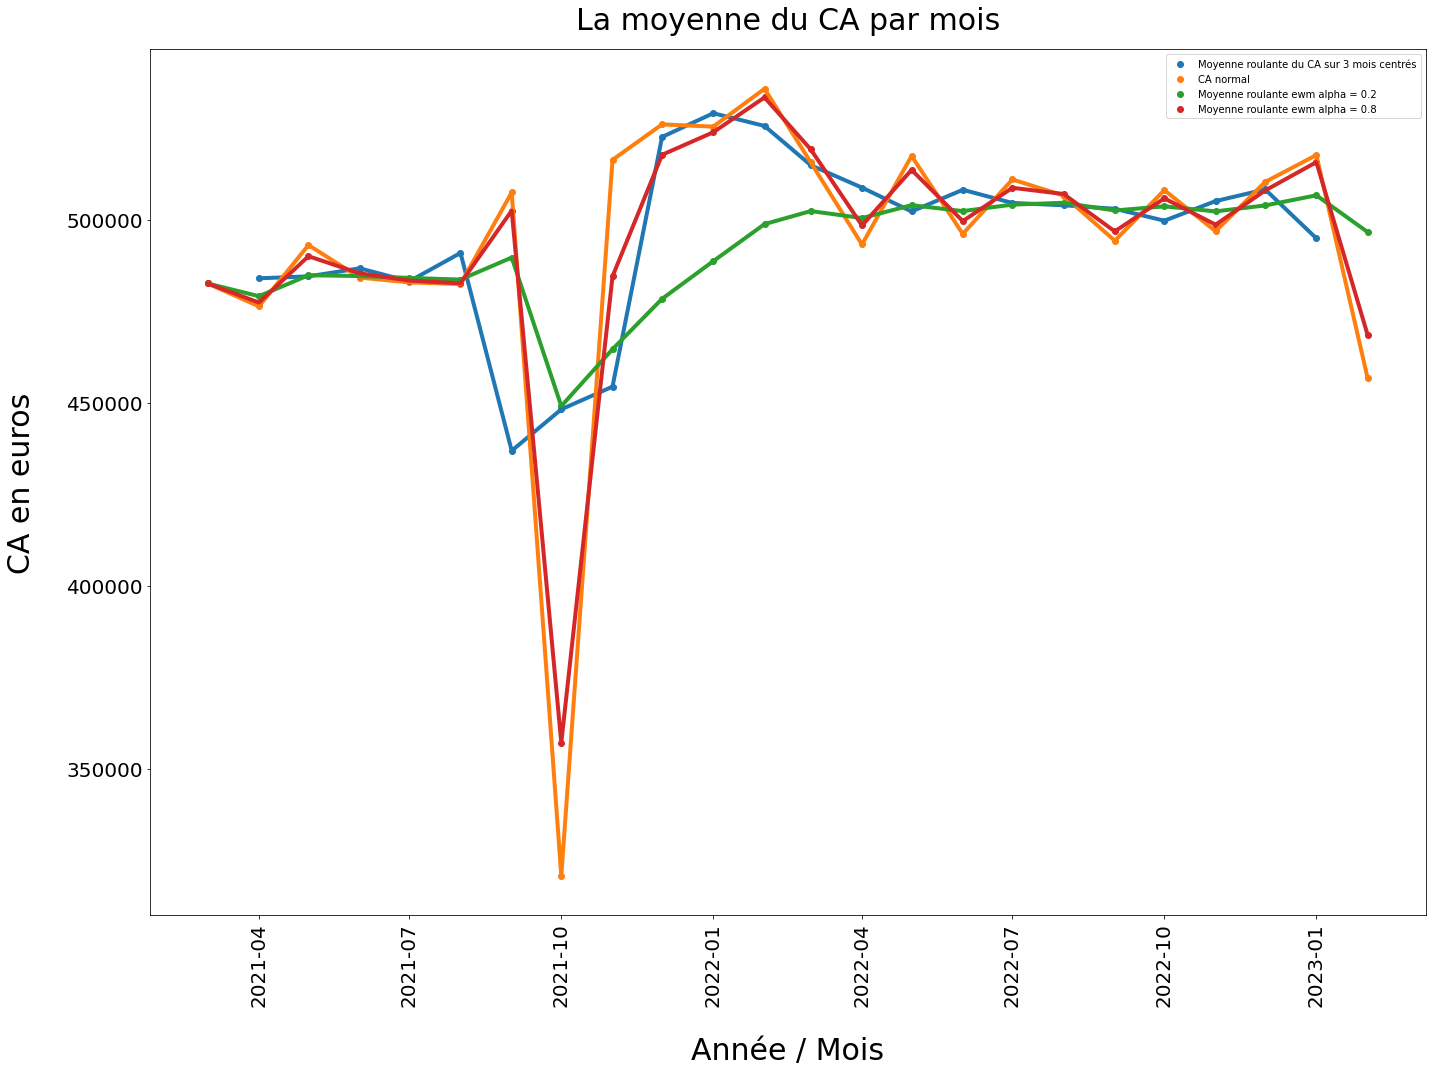

In [126]:
# Faisons-en une représentation graphique

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs-5))

# X et Y moyenne roulante

Y = CA_par_année_mois_mobile["CA"]
X = CA_par_année_mois_mobile.index[:]

# X et Y moyenne "normal"

Y2 = CA_par_année_mois["CA"]
X2 = CA_par_année_mois.index

# X et Y moyenne roulante ewm

Y3 = CA_par_année_mois_mobile1["CA"]
X3 = CA_par_année_mois_mobile1.index[:]

# X et Y moyenne roulante

Y4 = CA_par_année_mois_mobile2["CA"]
X4 = CA_par_année_mois_mobile2.index[:]

# épaisseur des traits

ep = 4

# Traçage de la courbe

plt.scatter(X,Y,label="Moyenne roulante du CA sur 3 mois centrés")
plt.plot(X, Y, linewidth=ep)
plt.scatter(X2,Y2,label="CA normal")
plt.plot(X2, Y2, linewidth=ep)
plt.scatter(X3,Y3,label="Moyenne roulante ewm alpha = 0.2")
plt.plot(X3, Y3, linewidth=ep)
plt.scatter(X4,Y4,label="Moyenne roulante ewm alpha = 0.8")
plt.plot(X4, Y4, linewidth=ep)

# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Année / Mois", fontsize = fs+10, labelpad= 30 )
plt.title(u"La moyenne du CA par mois", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs,rotation="vertical")
plt.yticks(fontsize=fs)

plt.legend(loc='best')

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_CA_Mois_ewm_rolling.png")
plt.show()

### Le CA des Outliers potentiels

In [127]:
# On avait identifié des outliers potentiels avec un prix unitaire du livre statiqtiquement élevé

Outliers_Price

,id_prod,price,categ
6,1_463,36.99,1
7,0_2157,34.99,0
10,2_228,225.17,2
11,1_178,51.92,1
15,0_1232,26.65,0
...,...,...,...
3271,2_123,147.99,2
3279,1_331,55.99,1
3282,2_23,115.99,2
3285,1_140,38.56,1


In [128]:
print(f"Il y a {Outliers_Price.count()[0]} valeurs avec un prix statistiquement aberrant soit {((100*Outliers_Price.count()[0])/(A[0])).round(2)} % de valeurs prix \nstatistiquement aberrantes au total ")

Il y a 744 valeurs avec un prix statistiquement aberrant soit 22.63 % de valeurs prix 
statistiquement aberrantes au total 


In [129]:
#Lions la table mère et la table des outliers pour calculer leur CA

Outliers_CA = [0]
Outliers_CA = pd.merge(Outliers_Price,Mother_Table, on="id_prod",how = "left")
Outliers_CA

,id_prod,price_x,categ_x,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price_y,categ_y,price_modif,categ_modif,sex,birth,age
0,1_463,36.99,1,2021-05-04 09:29:41.969029,s_29726,c_481,2021-05-04,2021.0,2021/05,4.0,09-29,36.99,1.0,36.99,1.0,f,1941.0,80.0
1,1_463,36.99,1,2021-05-15 18:22:42.022952,s_34945,c_166,2021-05-15,2021.0,2021/05,15.0,18-22,36.99,1.0,36.99,1.0,f,1967.0,54.0
2,1_463,36.99,1,2021-06-24 01:03:30.885489,s_52898,c_4749,2021-06-24,2021.0,2021/06,24.0,01-03,36.99,1.0,36.99,1.0,f,1979.0,42.0
3,1_463,36.99,1,2021-07-02 13:00:41.302563,s_56872,c_6573,2021-07-02,2021.0,2021/07,2.0,13-00,36.99,1.0,36.99,1.0,f,1976.0,45.0
4,1_463,36.99,1,2021-08-24 21:53:17.008000,s_80210,c_5452,2021-08-24,2021.0,2021/08,24.0,21-53,36.99,1.0,36.99,1.0,f,1981.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103478,1_140,38.56,1,2022-12-09 14:20:34.169187,s_309513,c_7406,2022-12-09,2022.0,2022/12,9.0,14-20,38.56,1.0,38.56,1.0,m,1988.0,33.0
103479,0_1920,25.16,0,2021-04-13 18:36:10.252971,s_20115,c_7088,2021-04-13,2021.0,2021/04,13.0,18-36,25.16,0.0,25.16,0.0,m,1987.0,34.0
103480,0_1920,25.16,0,2021-05-30 02:37:22.371278,s_41465,c_7748,2021-05-30,2021.0,2021/05,30.0,02-37,25.16,0.0,25.16,0.0,f,1989.0,32.0
103481,0_1920,25.16,0,2022-12-30 02:37:22.371278,s_319303,c_7748,2022-12-30,2022.0,2022/12,30.0,02-37,25.16,0.0,25.16,0.0,f,1989.0,32.0


In [130]:
CA_Outliers_2021_2023 = Outliers_CA['price_modif'].sum().round(2)

CA_Outliers_2021_2023

4731072.35

In [131]:
A = Outliers_CA["price_modif"].describe()
A

count    103475.000000
mean         45.721888
std          33.086150
min          24.030000
25%          26.990000
50%          29.360000
75%          55.990000
max         300.000000
Name: price_modif, dtype: float64

In [132]:
print(f"On peut voir qu'il y a eu {A[0]} transactions avec les outliers pour un CA total de {CA_Outliers_2021_2023} euros")
print(f"Soit un CA outliers représentant {(CA_Outliers_2021_2023*100/CA_Global_2021_2023).round(2)} % du CA Total avec les Outliers sur les 2 ans d'exercice")

On peut voir qu'il y a eu 103475.0 transactions avec les outliers pour un CA total de 4731072.35 euros
Soit un CA outliers représentant 39.9 % du CA Total avec les Outliers sur les 2 ans d'exercice


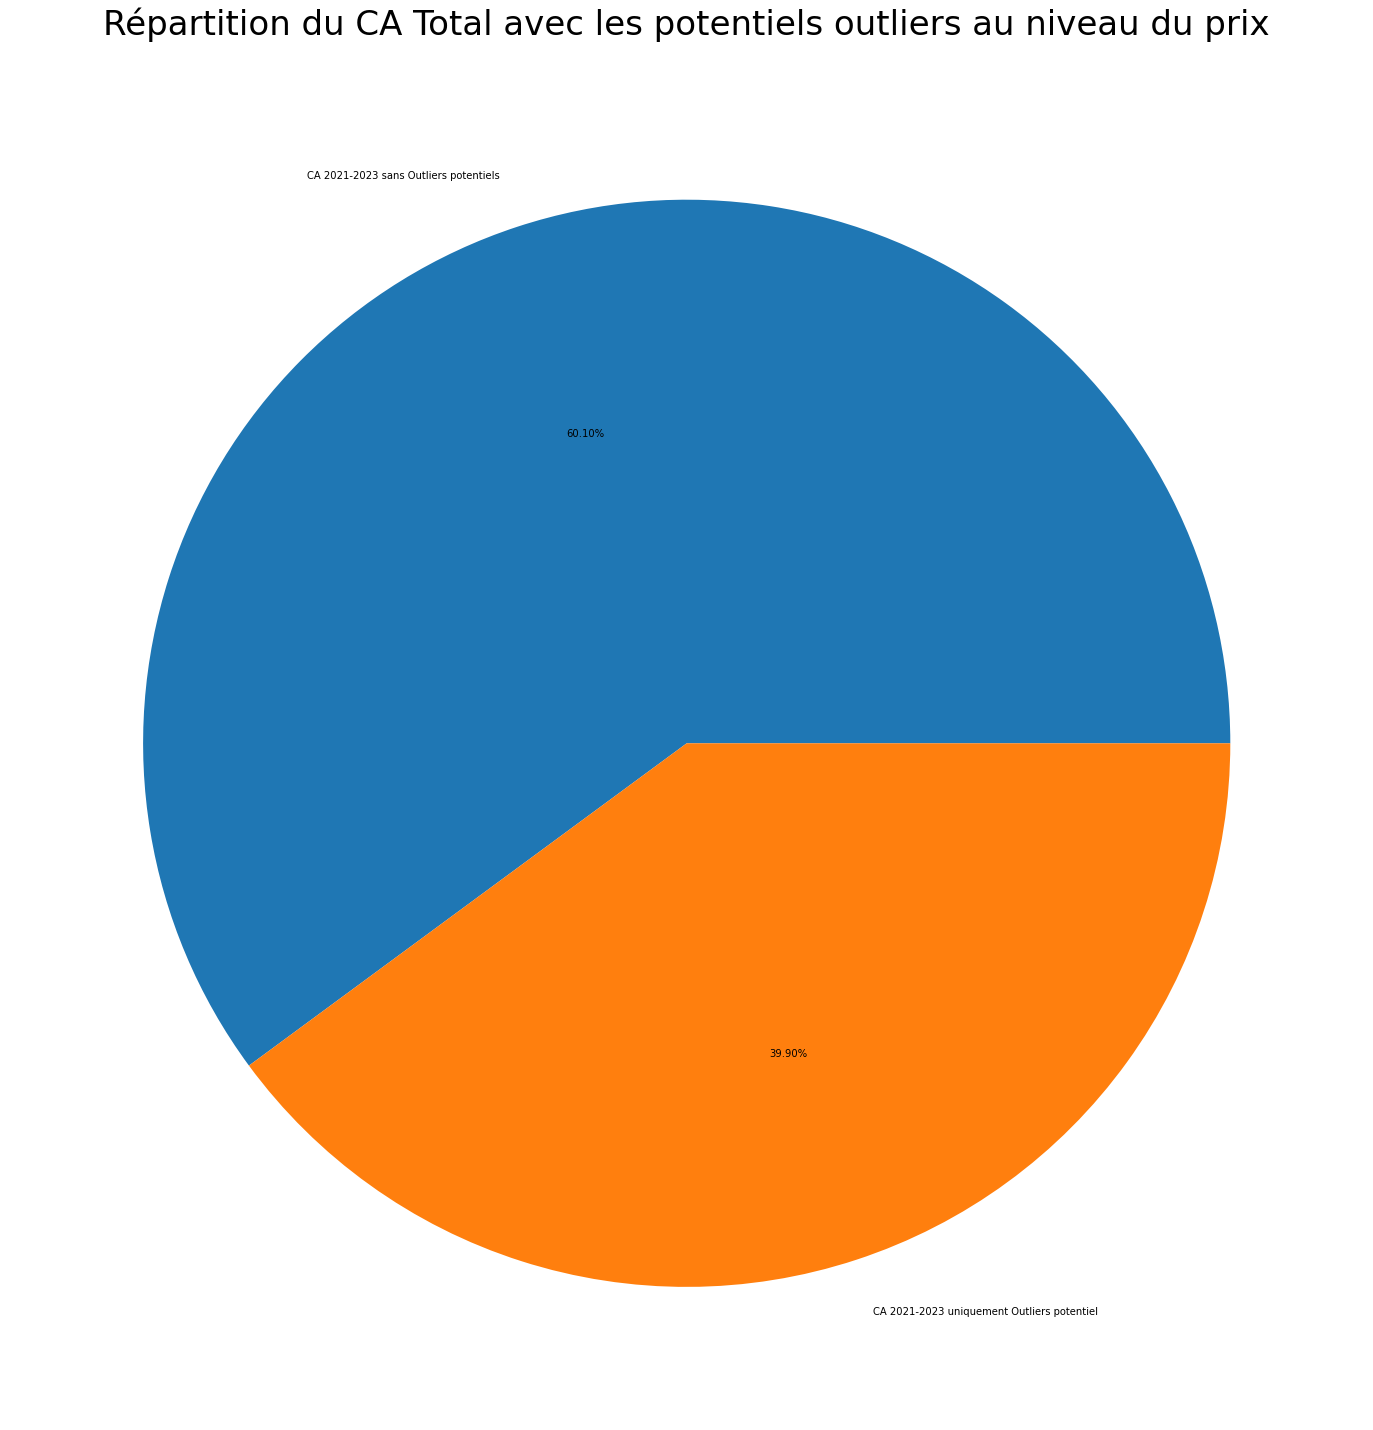

In [133]:
# Taille de la figure

fs = 30

plt.figure(figsize=(fs,fs-5))

# X et Y

a = CA_Global_2021_2023-CA_Outliers_2021_2023
b = CA_Outliers_2021_2023

Y = [a,b]

values = Y

myLabels = ["CA 2021-2023 sans Outliers potentiels","CA 2021-2023 uniquement Outliers potentiel"]

# Pour afficher le % dans le pie chart

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

# Traçage de la courbe

plt.pie(Y,labels = myLabels, autopct=make_autopct(values) )

# Customisation du graphique

plt.title(u"Répartition du CA Total avec les potentiels outliers au niveau du prix", fontsize = fs+4, pad= 30)


# Set text labels.

plt.rc('font', size=fs)


# Pour sauvegarder la figure

plt.savefig("P6_répartition_CA_Outliers.png")
plt.show()

## b) Analyse par référence et par catégorie

### Les produits jamais vendus en 2 ans d'excercice

In [134]:
# On peut remarquer que certains product_id n'ont pas été vendus
# Ceux sans transactions. Supprimons les transactrion pour faire un dataframe propre

Prod_Non_Vendus_Outer = pd.merge(Transactions3,Products2,on='id_prod',how='outer')
Prod_Non_Vendus_Outer

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ
0,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021.0,2021/03,1.0,21-50,4.22,0.0
1,0_1682,2021-03-07 08:44:14.451539,s_2963,c_2631,2021-03-07,2021.0,2021/03,7.0,08-44,4.22,0.0
2,0_1682,2021-03-23 22:13:15.453979,s_10546,c_6775,2021-03-23,2021.0,2021/03,23.0,22-13,4.22,0.0
3,0_1682,2021-03-23 09:46:54.869200,s_10307,c_85,2021-03-23,2021.0,2021/03,23.0,09-46,4.22,0.0
4,0_1682,2021-04-05 14:33:37.029851,s_16374,c_2176,2021-04-05,2021.0,2021/04,5.0,14-33,4.22,0.0
...,...,...,...,...,...,...,...,...,...,...,...
679348,0_1624,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,24.50,0.0
679349,2_86,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,132.36,2.0
679350,0_299,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,22.99,0.0
679351,0_510,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,23.66,0.0


In [135]:
M8 = Prod_Non_Vendus_Outer["client_id"].isna()
M8

0         False
1         False
2         False
3         False
4         False
          ...  
679348     True
679349     True
679350     True
679351     True
679352     True
Name: client_id, Length: 679353, dtype: bool

In [136]:
Prod_Non_Vendus = Prod_Non_Vendus_Outer[M8]
Prod_Non_Vendus

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ
679332,0_1016,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,35.06,0.0
679333,0_1780,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,1.67,0.0
679334,0_1062,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,20.08,0.0
679335,0_1119,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,2.99,0.0
679336,0_1014,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,1.15,0.0
679337,1_0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,31.82,1.0
679338,0_1318,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,20.92,0.0
679339,0_1800,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,22.05,0.0
679340,0_1645,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,2.99,0.0
679341,0_322,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,2.99,0.0


In [137]:
Prod_Non_Vendus.count()

id_prod       21
date           0
session_id     0
client_id      0
Calendrier     0
Année          0
Année_Mois     0
Jour           0
Heure          0
price         21
categ         21
dtype: int64

In [138]:
print(f"Il y a {Prod_Non_Vendus.count()[0]} produits que l'on a jamais vendus sur le site en ligne")
print(f"Ces produits représentent {(100*(Prod_Non_Vendus.count()[0])/(Products2.count()[0])).round(2)} % des produits totaux soit {Products2.count()[0]} produits sur le site")

Il y a 21 produits que l'on a jamais vendus sur le site en ligne
Ces produits représentent 0.64 % des produits totaux soit 3286 produits sur le site


In [139]:
Prod_Non_Vendus = Prod_Non_Vendus[["id_prod","price","categ"]].sort_values(["price"], ascending=False)
Prod_Non_Vendus

,id_prod,price,categ
679344,2_87,220.99,2.0
679346,2_72,141.32,2.0
679349,2_86,132.36,2.0
679345,1_394,39.73,1.0
679332,0_1016,35.06,0.0
679337,1_0,31.82,1.0
679343,0_1025,24.99,0.0
679348,0_1624,24.50,0.0
679351,0_510,23.66,0.0
679350,0_299,22.99,0.0


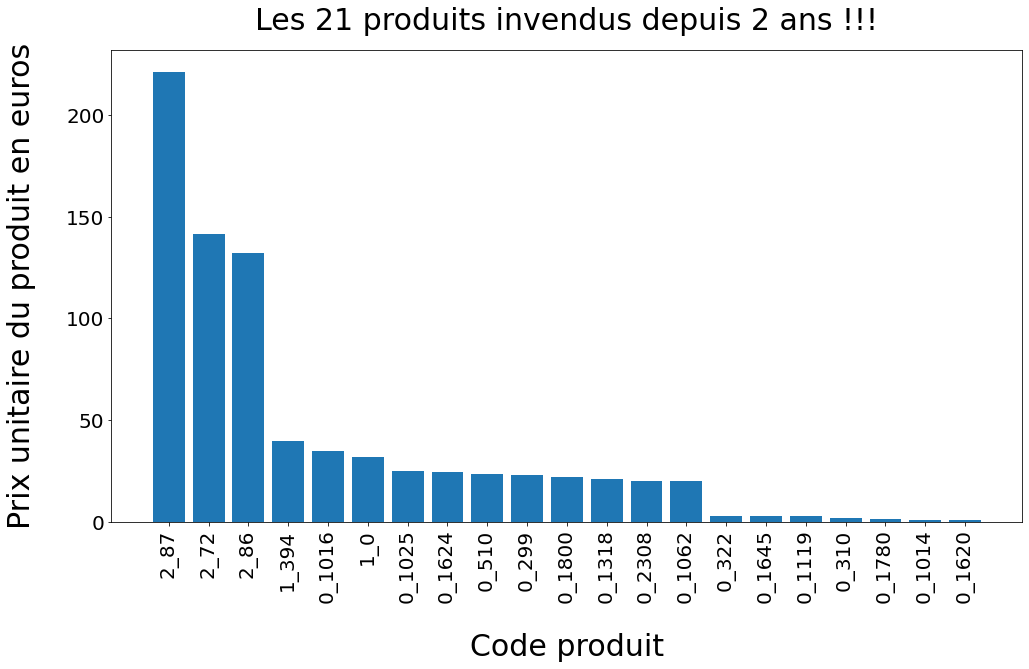

In [140]:
# Voici l'histogramme représentant les prix des produits invendus

# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

# X et Y

X = Prod_Non_Vendus["id_prod"]

Y = Prod_Non_Vendus["price"]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"Prix unitaire du produit en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Code produit", fontsize = fs+10, labelpad= 30 )
plt.title(u"Les 21 produits invendus depuis 2 ans !!!", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Produits_invendus.png")
plt.show()

### Le CA du produit sans info (id_prod = 0_2245)

In [141]:
Produit_Vendu_Sans_info_Prix

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ
251,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,2021-03-01,2021,2021/03,1,00-09,NaN,NaN
1167,0_2245,2021-03-02 15:55:49.728644,s_783,c_8060,2021-03-02,2021,2021/03,2,15-55,NaN,NaN
6204,0_2245,2021-03-07 20:00:01.525768,s_3159,c_1189,2021-03-07,2021,2021/03,7,20-00,NaN,NaN
20686,0_2245,2021-03-23 15:57:44.266387,s_10427,c_5869,2021-03-23,2021,2021/03,23,15-57,NaN,NaN
25323,0_2245,2021-03-28 10:46:04.804784,s_12567,c_966,2021-03-28,2021,2021/03,28,10-46,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
662331,0_2245,2023-02-10 11:54:44.891532,s_339558,c_6952,2023-02-10,2023,2023/02,10,11-54,NaN,NaN
667240,0_2245,2023-02-16 05:53:01.627491,s_342289,c_7954,2023-02-16,2023,2023/02,16,05-53,NaN,NaN
668167,0_2245,2023-02-17 20:34:06.230094,s_343000,c_1551,2023-02-17,2023,2023/02,17,20-34,NaN,NaN
668919,0_2245,2023-02-17 03:03:12.668129,s_342683,c_1533,2023-02-17,2023,2023/02,17,03-03,NaN,NaN


In [142]:
Produit_Vendu_Sans_info_Prix.describe()

,Année,Jour,price,categ
count,221.000000,221.000000,0.0,0.0
mean,2021.669683,15.009050,NaN,NaN
std,0.591173,8.450385,NaN,NaN
min,2021.000000,1.000000,NaN,NaN
25%,2021.000000,8.000000,NaN,NaN
50%,2022.000000,16.000000,NaN,NaN
75%,2022.000000,22.000000,NaN,NaN
max,2023.000000,31.000000,NaN,NaN


In [143]:
# Pour rappel on a remplacer leur prix par la moyenne des prix unitaire des autres produits et 
# leurs catégories par 0 dans les colonnes price_modif et categ_modif

Mother_Table.head(5)

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age
0,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021,2021/03,1,21-50,4.22,0.0,4.22,0.0,f,1981,40
1,0_1115,2021-03-01 06:43:40.590384,s_134,c_7575,2021-03-01,2021,2021/03,1,06-43,6.99,0.0,6.99,0.0,m,1973,48
2,0_1434,2021-03-01 10:14:21.593374,s_206,c_226,2021-03-01,2021,2021/03,1,10-14,8.58,0.0,8.58,0.0,m,1984,37
3,2_43,2021-03-01 21:11:16.391272,s_437,c_7563,2021-03-01,2021,2021/03,1,21-11,69.99,2.0,69.99,2.0,f,1999,22
4,1_631,2021-03-01 05:43:45.601513,s_127,c_8607,2021-03-01,2021,2021/03,1,05-43,14.99,1.0,14.99,1.0,m,1974,47


In [144]:
# Le CA avec price_modif

CA_Global_2021_2023

11857586.18

In [145]:
# Le CA avec la colonne price sans les modifications des 221 lignes Nan

CA_Global_2021_2023_price = Mother_Table["price"].sum().round(2)
CA_Global_2021_2023_price

11853728.68

In [146]:
CA_2021_2013_estimé_prod_0_2245 = CA_Global_2021_2023-CA_Global_2021_2023_price
CA_2021_2013_estimé_prod_0_2245

3857.5

In [147]:
print(f"Il y a au total pour la référence 0_2245 un CA estimé de {CA_2021_2013_estimé_prod_0_2245}")
print(f"Cela représente {(CA_2021_2013_estimé_prod_0_2245*100/(CA_Global_2021_2023)).round(2)}% du CA total avec ce CA estimé")
print(f"En valeur absolu ce CA de ce produit représente {CA_2021_2013_estimé_prod_0_2245} euros")

Il y a au total pour la référence 0_2245 un CA estimé de 3857.5
Cela représente 0.03% du CA total avec ce CA estimé
En valeur absolu ce CA de ce produit représente 3857.5 euros


# Top / Flop Référence

In [148]:
CA_par_id_prod = Mother_Table[["id_prod","price_modif"]].groupby(["id_prod"]).sum()
CA_par_id_prod = CA_par_id_prod.sort_values(["price_modif"], ascending = False)
CA_par_id_prod.rename(columns={'price_modif': 'CA'
                           }, inplace=True)
CA_par_id_prod.head(10)

#Ps: La colonne price_modif est en fait le CA sur 2021-2023 avec les 221 lignes nan qu'on a mis une valeur estimée

,CA
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86
1_395,54356.25
1_369,54025.48
2_110,53846.25
2_39,53060.85


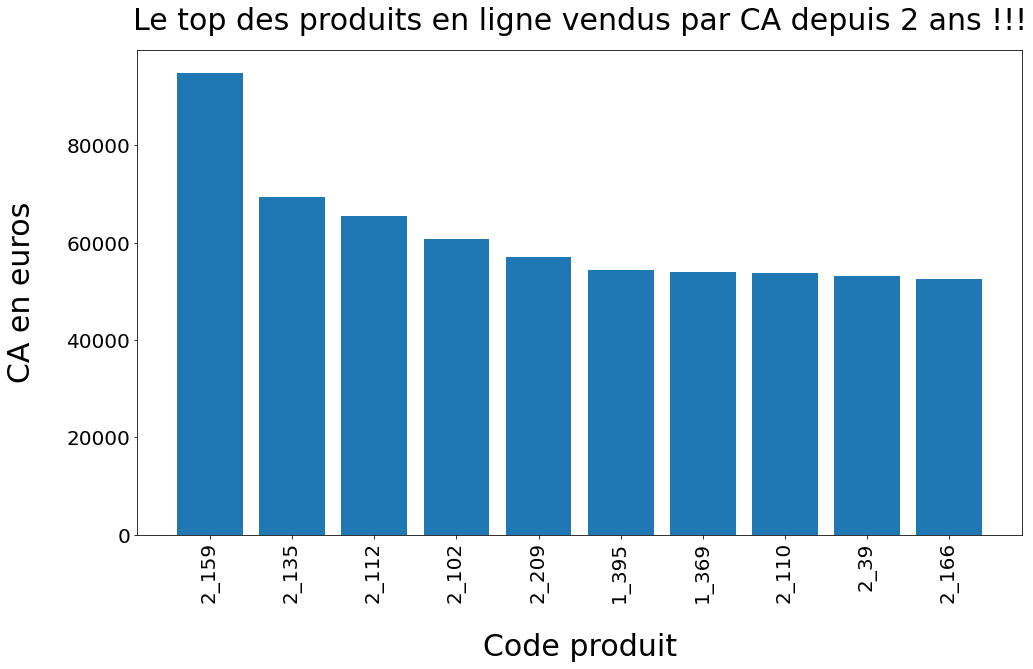

In [149]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

# On veut afficher le Top

Top = 10

# X et Y

X = CA_par_id_prod.index[:Top]

Y = [CA_par_id_prod.iloc[i][0] for i in range(Top)]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Code produit", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le top des produits en ligne vendus par CA depuis 2 ans !!!", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Top_réf.png")
plt.show()

In [150]:
#Pour le flop

CA_par_id_prod.tail(10)

,CA
id_prod,
0_1840,2.56
0_898,2.54
0_1498,2.48
0_1728,2.27
0_541,1.99
0_1601,1.99
0_807,1.99
0_1653,1.98
0_1284,1.38


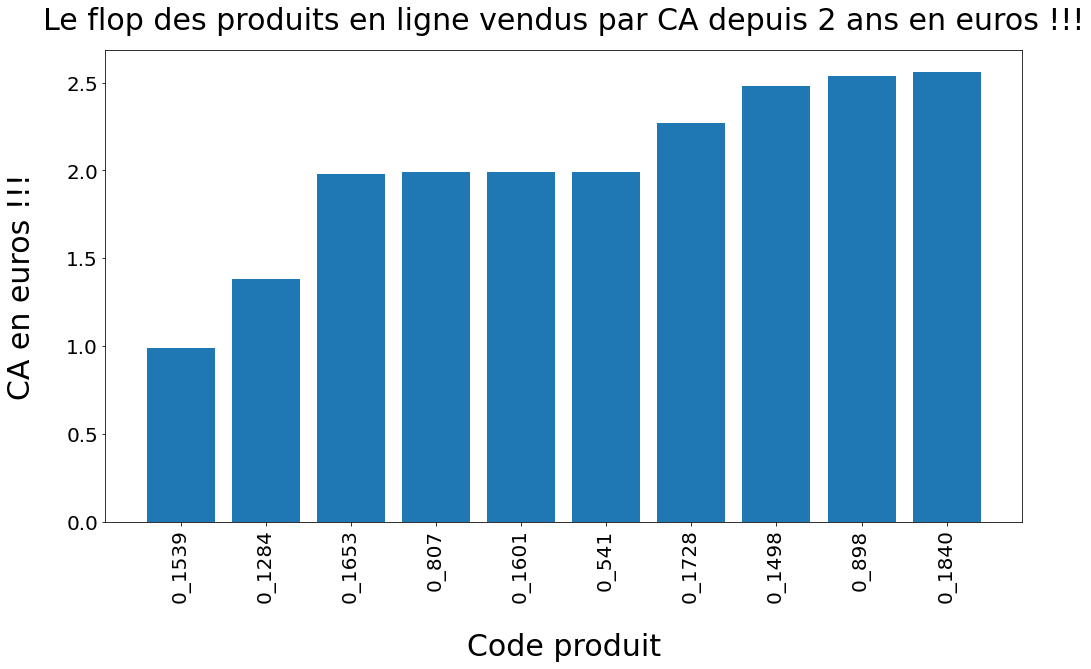

In [151]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

# On veut afficher le flop

Flop = 10

# X et Y

X = CA_par_id_prod.index[-Flop:]
X2 = list(reversed(X))

Y = [CA_par_id_prod.iloc[i][0] for i in range(-Flop,0)]
Y2 = list(reversed(Y))

# Traçage de la courbe

plt.bar(X2,Y2)

# Customisation du graphique

plt.ylabel(u"CA en euros !!!", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Code produit", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le flop des produits en ligne vendus par CA depuis 2 ans en euros !!!", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Flop_réf.png")
plt.show()

In [152]:
# Fixons une limite de CA sur 2 ans pour les produits flop

CA_Flop_2021_2023 = 100

# Cela fait ppar exemple CA Flop = 100 => 50 € par an soit 5 € par mois par produit

Masque_Flop = CA_par_id_prod["CA"]<= CA_Flop_2021_2023
Produits_Flop = CA_par_id_prod[Masque_Flop]
Produits_Flop

,CA
id_prod,
0_2081,99.96
0_797,99.80
0_109,99.80
0_402,99.00
1_314,99.00
...,...
0_1601,1.99
0_807,1.99
0_1653,1.98


In [153]:
Produits_Flop.describe()

,CA
count,397.000000
mean,40.334408
std,30.762386
min,0.990000
25%,13.620000
50%,29.830000
75%,69.040000
max,99.960000


In [154]:
print(f"Pour un CA FLOP plafond sur 2 ans de {CA_Flop_2021_2023} € par produit on a identifié {Produits_Flop.count()[0]} produits FLOP avec un CA \nsur 2 ans de {(Produits_Flop.sum()[0]).round(2)} € au total")
print(f"Soit {(Produits_Flop.describe().iloc[1][0]).round(2)} € en moyenne sur 2 ans par produits")

Pour un CA FLOP plafond sur 2 ans de 100 € par produit on a identifié 397 produits FLOP avec un CA 
sur 2 ans de 16012.76 € au total
Soit 40.33 € en moyenne sur 2 ans par produits


# Top / Flop Catégorie

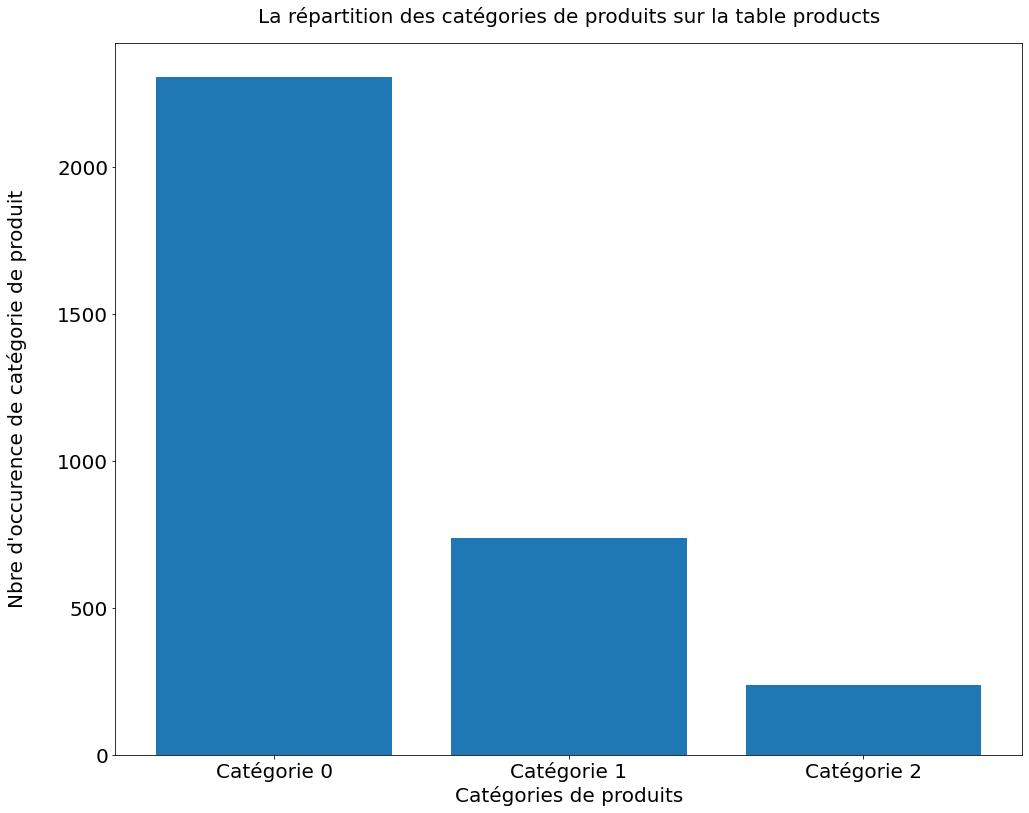

In [155]:
# Voici l'histogramme représentant les catégories de tous les produits


# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-8))

# X et Y

a = Count_Products.iloc[0,0]

b = Count_Products.iloc[1,0]

c = Count_Products.iloc[2,0]

Y = [a,b,c]

X = ["Catégorie 0","Catégorie 1","Catégorie 2"]


# Traçage de la courbe

plt.bar(X,Y)


# Customisation du graphique

plt.ylabel(u"Nbre d'occurence de catégorie de produit", fontsize = fs, labelpad= 30)
plt.xlabel(u"Catégories de produits", fontsize = fs )
plt.title(u"La répartition des catégories de produits sur la table products", fontsize = fs, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()



# Pour sauvegarder la figure

plt.savefig("P6_La_répartition_catégories_produits.png")
plt.show()


In [156]:
print(f"On voit qu'il y a principalement des catégories 0 puis 1 puis 2.")
print(f"Il y a {a} de catégorie 0 , {b} catégorie 1 et {c} catégorie 2")
print(f"Soit {(a/b).round(2)} fois plus de catégorie 0 par rapport au catégorie 1 et {(b/c).round(2)} fois plus de catégorie 1 par rapport \naux catégorie 2")

On voit qu'il y a principalement des catégories 0 puis 1 puis 2.
Il y a 2309 de catégorie 0 , 739 catégorie 1 et 239 catégorie 2
Soit 3.12 fois plus de catégorie 0 par rapport au catégorie 1 et 3.09 fois plus de catégorie 1 par rapport 
aux catégorie 2


In [157]:
# Affichons l'ensemble des transaction par catégorie

CA_par_categ = Mother_Table[["price_modif","categ_modif"]].groupby("categ_modif").sum()
CA_par_categ.rename(columns={'price_modif': 'CA'
                           }, inplace=True)
CA_par_categ

,CA
categ_modif,
0.0,4.423588e+06
1.0,4.653723e+06
2.0,2.780275e+06


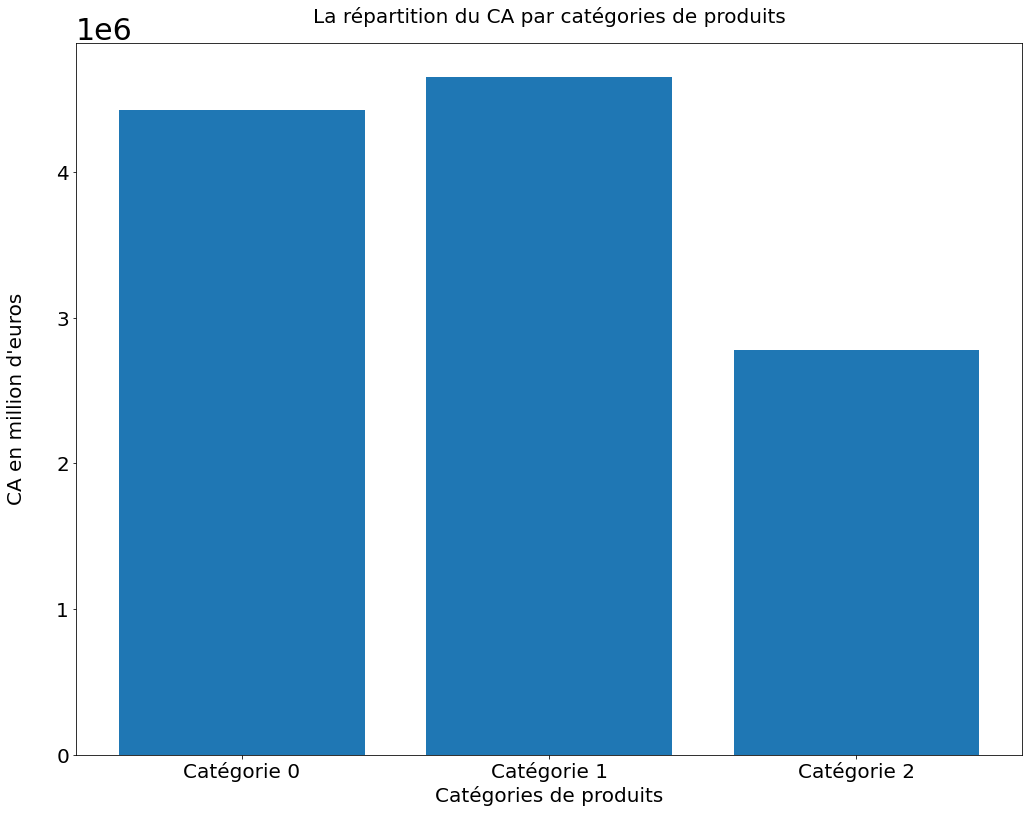

In [158]:
# Voici l'histogramme représentant les catégories de tous les produits


# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-8))

# X et Y

a, b, c = CA_par_categ.iloc[0,0], CA_par_categ.iloc[1,0], CA_par_categ.iloc[2,0]

Y = [a,b,c]

X = ["Catégorie 0","Catégorie 1","Catégorie 2"]


# Traçage de la courbe

plt.bar(X,Y)


# Customisation du graphique

plt.ylabel(u"CA en million d'euros", fontsize = fs, labelpad= 30)
plt.xlabel(u"Catégories de produits", fontsize = fs )
plt.title(u"La répartition du CA par catégories de produits", fontsize = fs, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()



# Pour sauvegarder la figure

plt.savefig("P6_La_répartition_CA_par_catégories_produits.png")
plt.show()


In [159]:
# On va créer les 3 tables mère en les filtrant sur les catégories de produits pour afficher le top 
# et le flop par catégorie

Masque_categ_0 = Mother_Table["categ_modif"] == 0
Mother_Table_categ_0 = Mother_Table[Masque_categ_0]

Masque_categ_1 = Mother_Table["categ_modif"] == 1
Mother_Table_categ_1 = Mother_Table[Masque_categ_1]

Masque_categ_2 = Mother_Table["categ_modif"] == 2
Mother_Table_categ_2 = Mother_Table[Masque_categ_2]

In [160]:
# Groupons le CA par id_prod

CA_categ_0 = Mother_Table_categ_0[["price_modif","id_prod"]].groupby("id_prod").sum().sort_values(["price_modif"], ascending = False)
CA_categ_0.rename(columns={'price_modif': 'CA'
                           }, inplace=True)
CA_categ_0

,CA
id_prod,
0_1441,23452.65
0_1421,23008.49
0_1414,22287.00
0_1451,21689.15
0_1417,21372.12
...,...
0_1601,1.99
0_541,1.99
0_1653,1.98


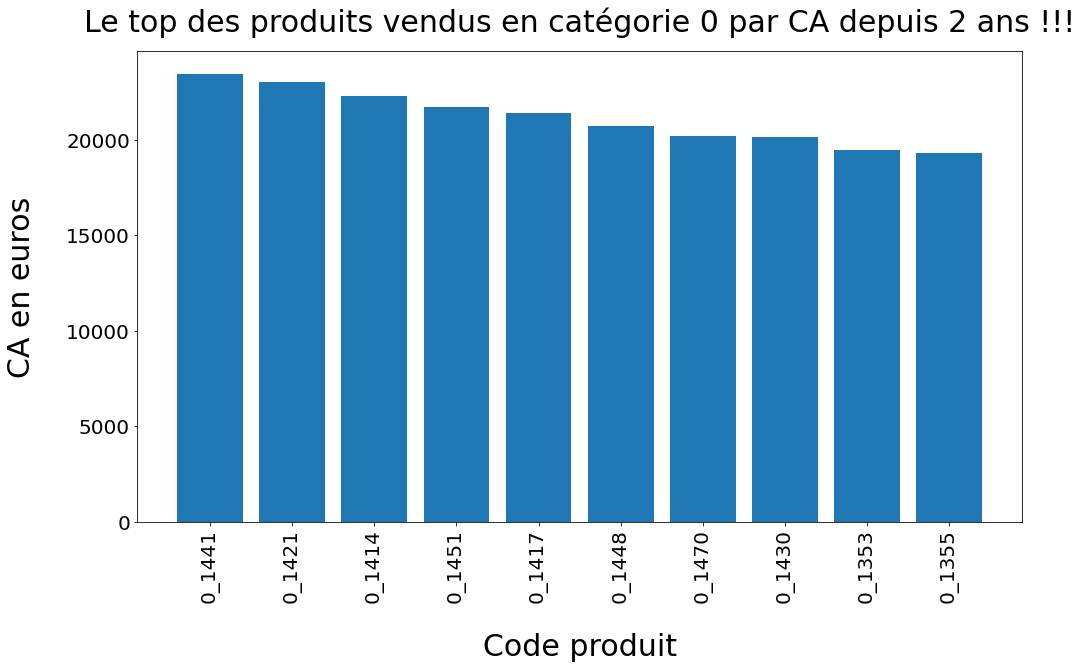

In [161]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

# On veut afficher le Top

Top = 10

# X et Y

X = CA_categ_0.index[:Top]

Y = [CA_categ_0.iloc[i][0] for i in range(Top)]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Code produit", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le top des produits vendus en catégorie 0 par CA depuis 2 ans !!!", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Top_réf_categ_0.png")
plt.show()

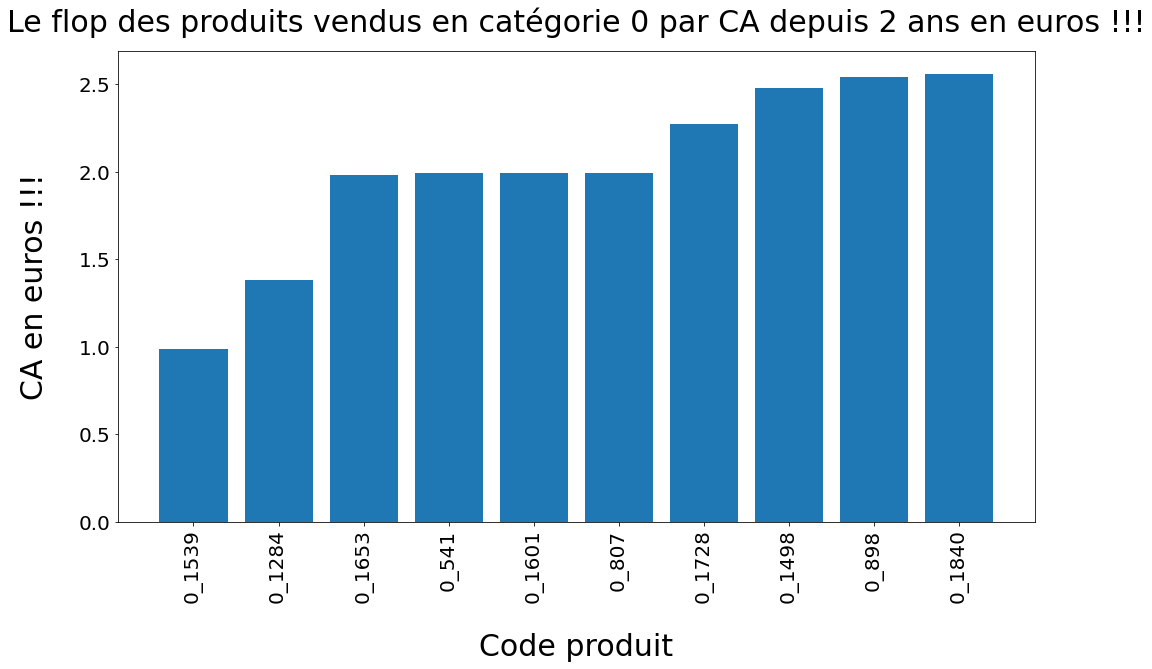

In [162]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

# On veut afficher le flop

Flop = 10

# X et Y

X = CA_categ_0.index[-Flop:]
X2 = list(reversed(X))

Y = [CA_categ_0.iloc[i][0] for i in range(-Flop,0)]
Y2 = list(reversed(Y))

# Traçage de la courbe

plt.bar(X2,Y2)

# Customisation du graphique

plt.ylabel(u"CA en euros !!!", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Code produit", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le flop des produits vendus en catégorie 0 par CA depuis 2 ans en euros !!!", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Flop_réf_categ_0.png")
plt.show()

In [163]:
CA_categ_1 = Mother_Table_categ_1[["price_modif","id_prod"]].groupby("id_prod").sum().sort_values(["price_modif"], ascending = False)
CA_categ_1.rename(columns={'price_modif': 'CA'
                           }, inplace=True)
CA_categ_1

,CA
id_prod,
1_395,54356.25
1_369,54025.48
1_414,51949.40
1_383,51486.24
1_498,49731.36
...,...
1_404,29.55
1_473,26.91
1_470,21.64


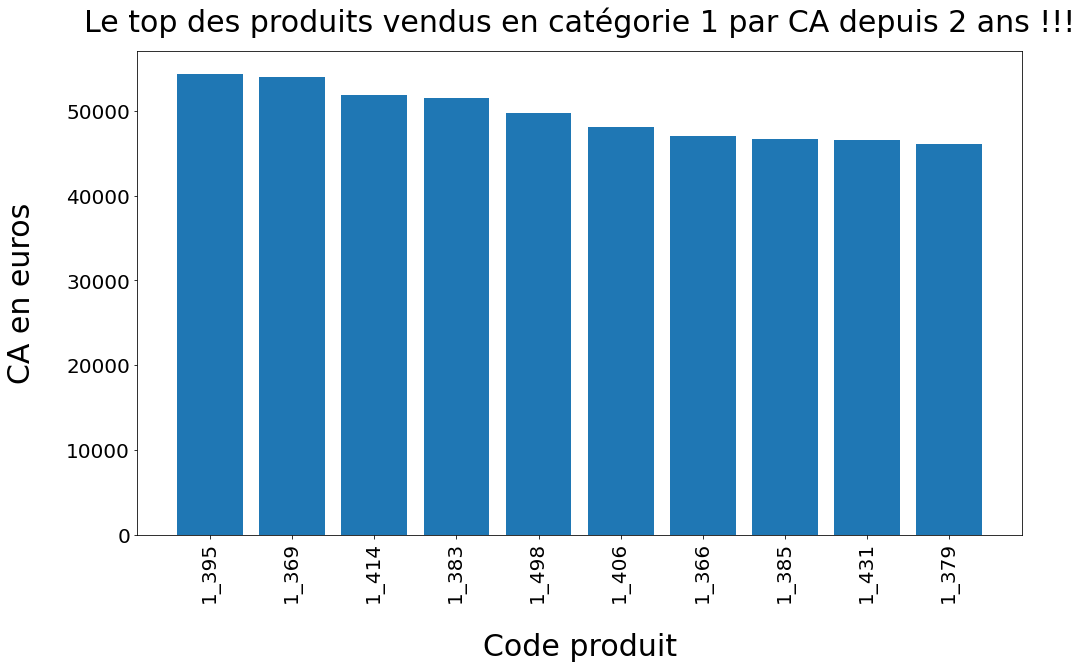

In [164]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

# On veut afficher le Top

Top = 10

# X et Y

X = CA_categ_1.index[:Top]

Y = [CA_categ_1.iloc[i][0] for i in range(Top)]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Code produit", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le top des produits vendus en catégorie 1 par CA depuis 2 ans !!!", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Top_réf_categ_1.png")
plt.show()

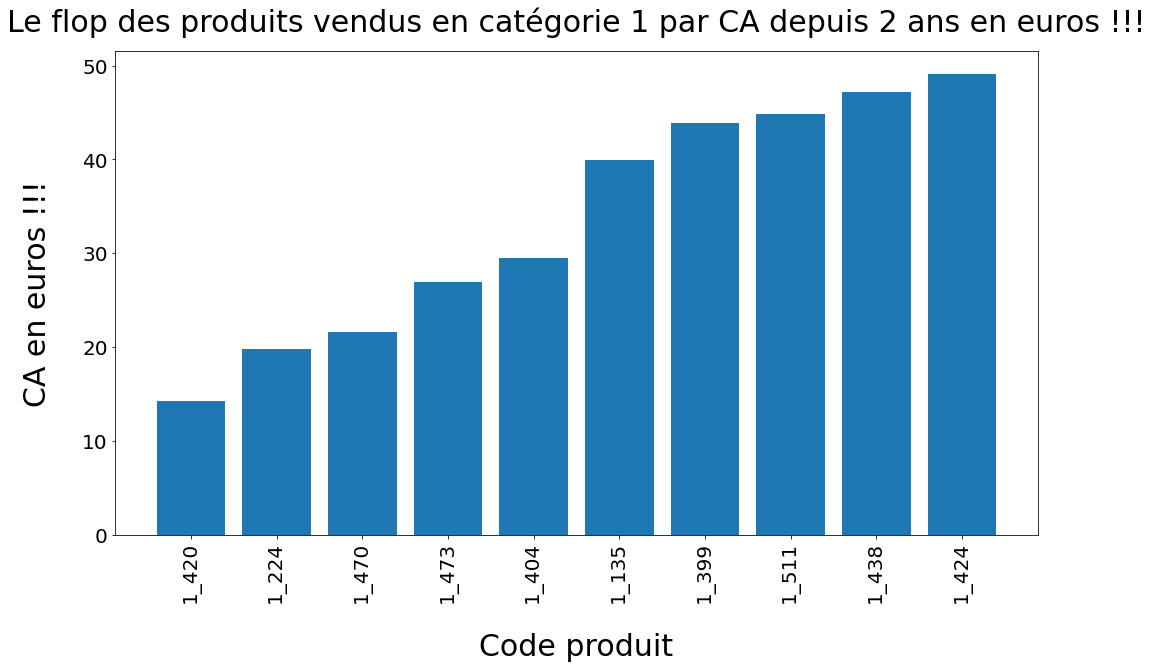

In [165]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

# On veut afficher le flop

Flop = 10

# X et Y

X = CA_categ_1.index[-Flop:]
X2 = list(reversed(X))

Y = [CA_categ_1.iloc[i][0] for i in range(-Flop,0)]
Y2 = list(reversed(Y))

# Traçage de la courbe

plt.bar(X2,Y2)

# Customisation du graphique

plt.ylabel(u"CA en euros !!!", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Code produit", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le flop des produits vendus en catégorie 1 par CA depuis 2 ans en euros !!!", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Flop_réf_categ_1.png")
plt.show()

In [166]:
CA_categ_2 = Mother_Table_categ_2[["price_modif","id_prod"]].groupby("id_prod").sum().sort_values(["price_modif"], ascending = False)
CA_categ_2.rename(columns={'price_modif': 'CA'
                           }, inplace=True)
CA_categ_2

,CA
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86
...,...
2_107,203.94
2_93,157.98
2_98,149.74


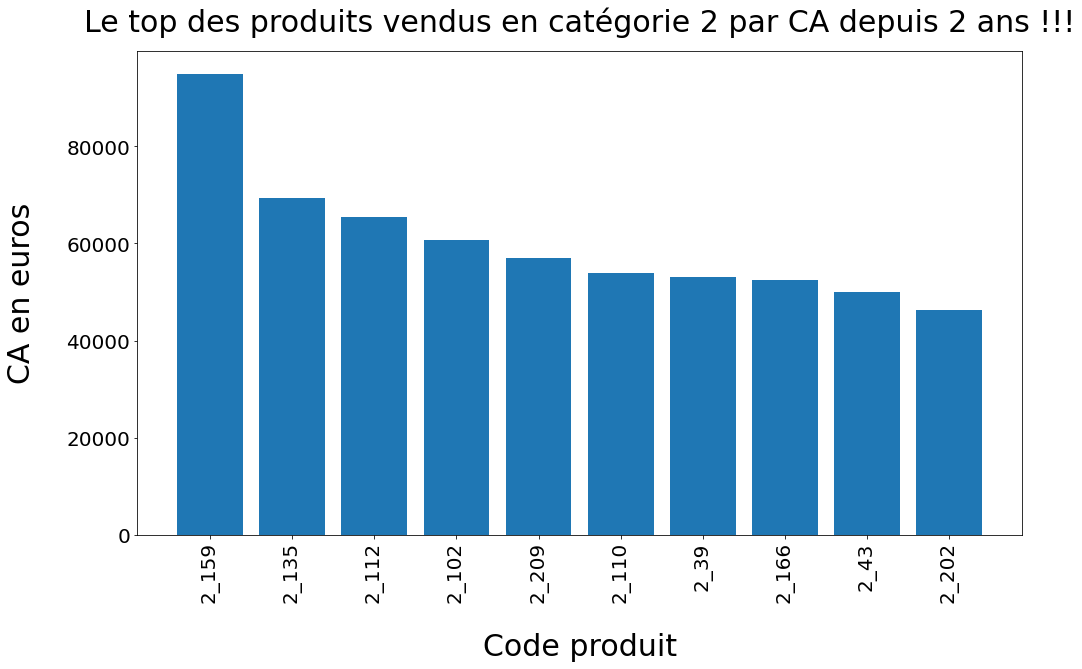

In [167]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

# On veut afficher le Top

Top = 10

# X et Y

X = CA_categ_2.index[:Top]

Y = [CA_categ_2.iloc[i][0] for i in range(Top)]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Code produit", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le top des produits vendus en catégorie 2 par CA depuis 2 ans !!!", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Top_réf_categ_2.png")
plt.show()

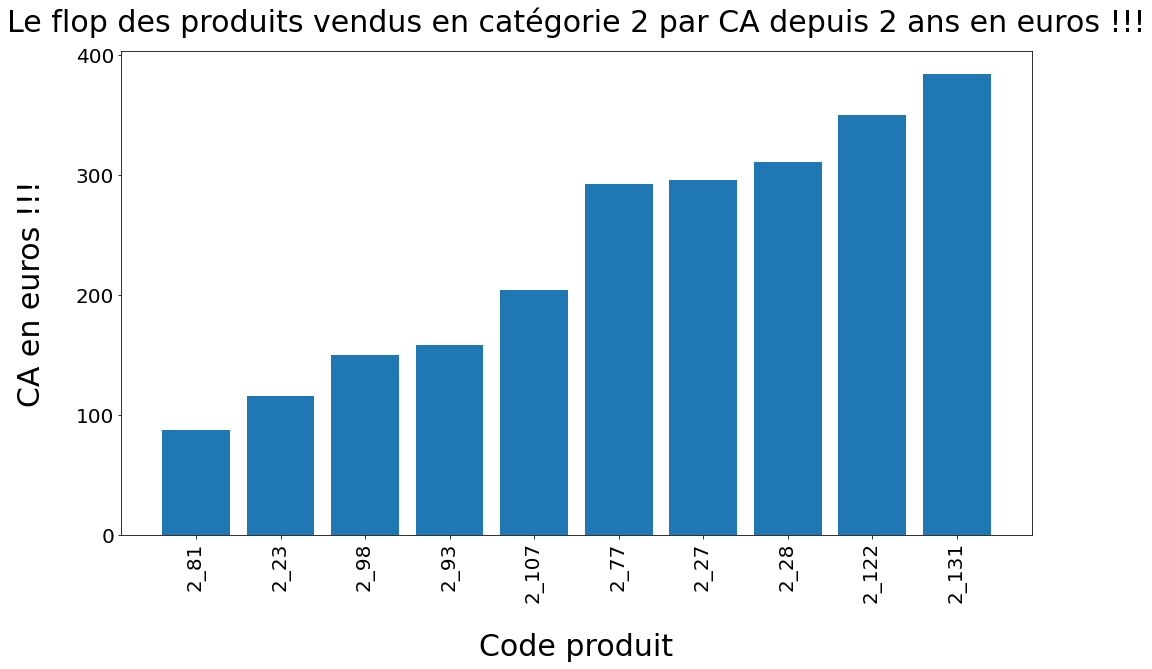

In [168]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

# On veut afficher le flop

Flop = 10

# X et Y

X = CA_categ_2.index[-Flop:]
X2 = list(reversed(X))

Y = [CA_categ_2.iloc[i][0] for i in range(-Flop,0)]
Y2 = list(reversed(Y))

# Traçage de la courbe

plt.bar(X2,Y2)

# Customisation du graphique

plt.ylabel(u"CA en euros !!!", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Code produit", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le flop des produits vendus en catégorie 2 par CA depuis 2 ans en euros !!!", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Flop_réf_categ_2.png")
plt.show()

## Analyse du panier Moyen par Catégorie 

In [169]:
# Demande du tuteur

# Le panier est le CA par session
# Le panier moyen est la moyenn,e de tout ces panier

# Calculons le panier par session

Panier = Mother_Table[["price_modif","session_id"]].groupby(["session_id"]).sum().round(2)
Panier.rename(columns={'price_modif': 'CA'
                           }, inplace=True)
Panier

,CA
session_id,
s_1,11.99
s_10,26.99
s_100,33.72
s_1000,39.22
s_10000,41.49
...,...
s_99994,28.92
s_99995,19.84
s_99996,56.27


In [170]:
# Calculons le panier moyen

Panier_Moyen = Panier.mean()[0].round(2)
Panier_Moyen

34.64

In [171]:
# Analysons le panier moyen par catégorie

Panier_Categ = Mother_Table.pivot_table("price_modif","session_id","categ_modif")
Panier_Categ

categ_modif,0.0,1.0,2.0
session_id,,,
s_1,11.990000,NaN,NaN
s_10,NaN,26.99,NaN
s_100,16.860000,NaN,NaN
s_1000,9.805000,NaN,NaN
s_10000,6.250000,28.99,NaN
...,...,...,...
s_99994,9.640000,NaN,NaN
s_99995,19.840000,NaN,NaN
s_99996,14.067500,NaN,NaN


In [172]:
Panier_Moyen_Categ = Panier_Categ.mean().round(2)
Panier_Moyen_Categ

categ_modif
0.0    10.65
1.0    20.48
2.0    76.30
dtype: float64

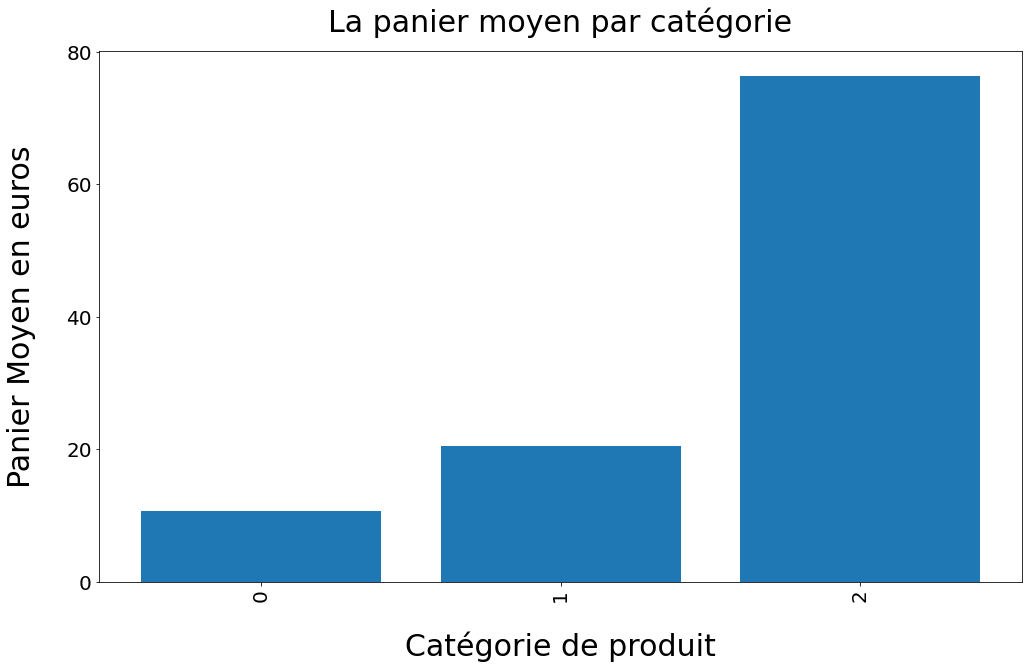

In [173]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

# X et Y

X = Panier_Moyen_Categ.index[:]


Y = Panier_Moyen_Categ

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"Panier Moyen en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Catégorie de produit", fontsize = fs+10, labelpad= 30 )
plt.title(u"La panier moyen par catégorie", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(np.arange(0,3),fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Panier_Moyen_Categ.png")
plt.show()

In [174]:
print("Le panier moyen par catégorie est vraiment énorme pour la catégorie 3 !!! comparé au 2 autres catégories")
print(f"Le panier moyen de la catégorie 3 est {(Panier_Moyen_Categ[2]/Panier_Moyen_Categ[1]).round(2)} fois plus grand que la catégorie 2")
print(f"Et le panier moyen de la catégorie 3 est {(Panier_Moyen_Categ[2]/Panier_Moyen_Categ[0]).round(2)} fois plus grand que la catégorie 1")

Le panier moyen par catégorie est vraiment énorme pour la catégorie 3 !!! comparé au 2 autres catégories
Le panier moyen de la catégorie 3 est 3.73 fois plus grand que la catégorie 2
Et le panier moyen de la catégorie 3 est 7.16 fois plus grand que la catégorie 1


# c) Analyse par profil client

In [175]:
Customers2

,client_id,sex,birth,age
0,c_4410,f,1967,54
1,c_7839,f,1975,46
2,c_1699,f,1984,37
3,c_5961,f,1962,59
4,c_5320,m,1943,78
...,...,...,...,...
8618,c_7920,m,1956,65
8619,c_7403,f,1970,51
8620,c_5119,m,1974,47
8621,c_5643,f,1968,53


## Profil Client par sexe

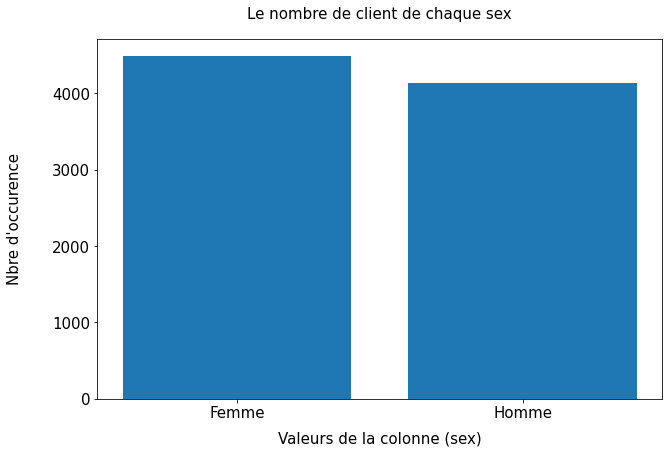

In [176]:

# Taille de la figure

fs = 15

plt.figure(figsize=(fs-5,fs-8))


# X et Y

# a nombre de femme

a = Count_Customers.iloc[0,0]

#b nbr d'homme

b = Count_Customers.iloc[1,0]

Y = [a,b]
X = ["Femme","Homme"]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"Nbre d'occurence", fontsize = fs, labelpad= 30)
plt.xlabel(u"Valeurs de la colonne (sex)", fontsize = fs, labelpad= 10)
plt.title(u"Le nombre de client de chaque sex", fontsize = fs, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Nbre_Client_Par_Sex.png")
plt.show()


In [177]:
CA_par_sex = Mother_Table[["sex","price_modif"]].groupby(["sex"]).sum()
CA_par_sex.rename(columns={'price_modif': 'CA'
                           }, inplace=True)
CA_par_sex

,CA
sex,
f,5.861725e+06
m,5.995861e+06


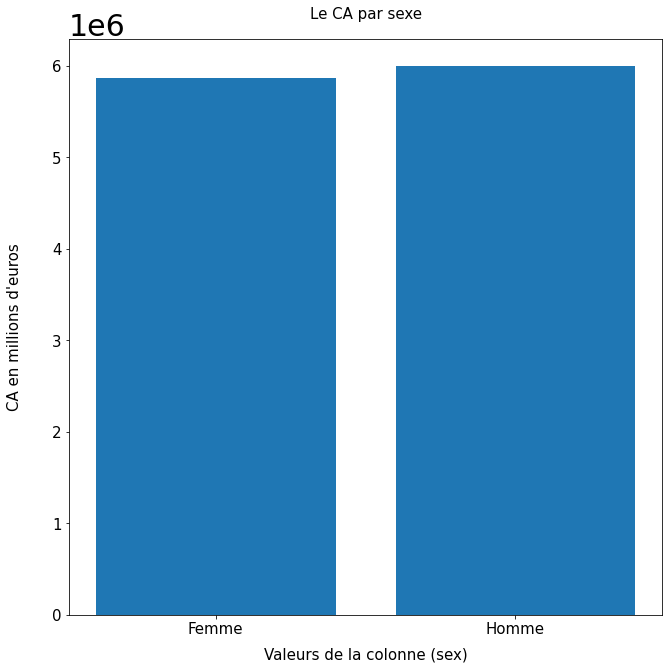

In [178]:

# Taille de la figure

fs = 15

plt.figure(figsize=(fs-5,fs-5))


# X et Y

a = CA_par_sex.iloc[0,0]

b = CA_par_sex.iloc[1,0]

Y = [a,b]
X = ["Femme","Homme"]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"CA en millions d'euros", fontsize = fs, labelpad= 30)
plt.xlabel(u"Valeurs de la colonne (sex)", fontsize = fs, labelpad= 10)
plt.title(u"Le CA par sexe", fontsize = fs, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_CA_Par_Sex.png")
plt.show()


## Profil Client par âge 

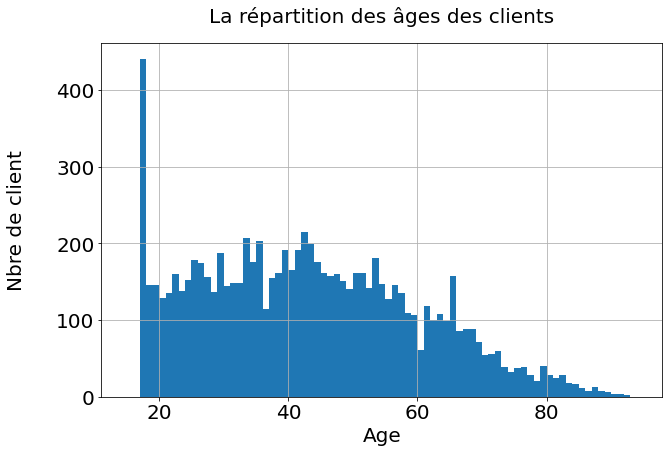

In [179]:
# Voici l'histogramme représentant l'âge de tous les clients

# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-8))

# Traçage de la courbe

Customers["age"].hist(figsize=(fs-10,fs-13), bins = np.arange(15,95,1))

# Customisation du graphique

plt.ylabel(u"Nbre de client", fontsize = fs, labelpad= 30)
plt.xlabel(u"Age", fontsize = fs )
plt.title(u"La répartition des âges des clients", fontsize = fs, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()


# Pour sauvegarder la figure

plt.savefig("P6_La_répartition_ages_clients.png")
plt.show()


In [180]:
# Voyons leur CA par âge !!!

CA_par_age = Mother_Table[["age","price_modif"]].groupby(["age"]).sum().round(2)
CA_par_age.rename(columns={'price_modif': 'CA'
                           }, inplace=True)
CA_par_age

,CA
age,
17,609013.69
18,178195.78
19,184229.71
20,178497.70
21,165042.89
...,...
88,5271.80
89,5043.19
90,2815.45


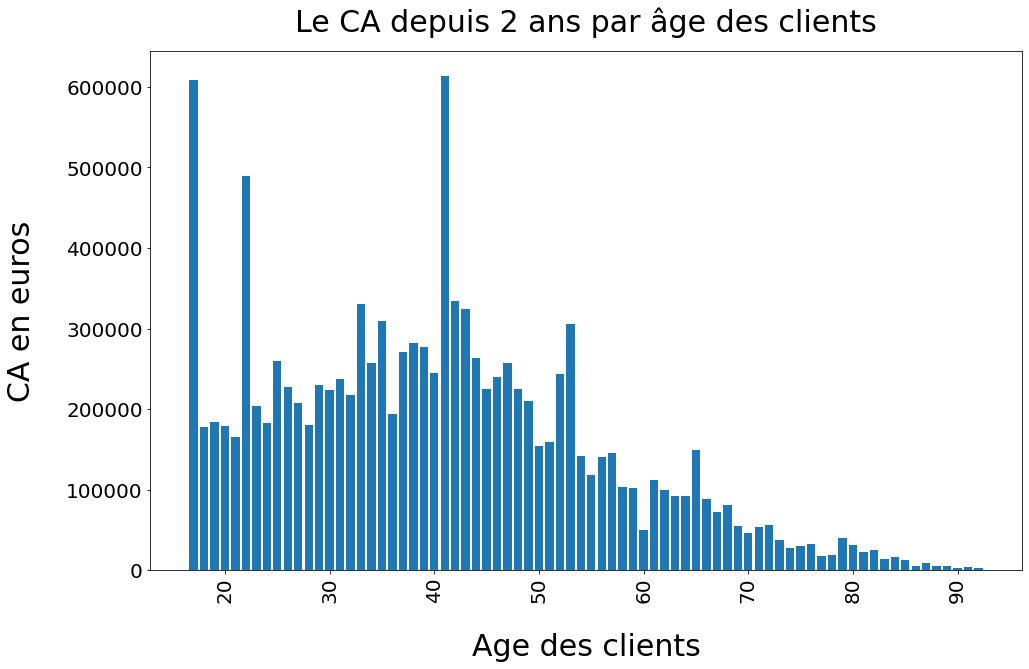

In [181]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

Nbre_ligne = len(CA_par_age)

# X et Y

X = CA_par_age.index[:Nbre_ligne]

Y = [CA_par_age.iloc[i][0] for i in range(Nbre_ligne)]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Age des clients", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le CA depuis 2 ans par âge des clients", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_CA_par_age.png")
plt.show()

In [182]:
# Je vais afficher les 3 groupes au delà de 400 000 euros de CA sur 2 ans

M9 = CA_par_age["CA"] >= 400000

CA_par_age[M9]


,CA
age,
17,609013.69
22,489497.54
41,613684.40


In [183]:
CA_par_age

,CA
age,
17,609013.69
18,178195.78
19,184229.71
20,178497.70
21,165042.89
...,...
88,5271.80
89,5043.19
90,2815.45


In [184]:
Count_Cust_par_age = Customers2[["client_id","age"]].groupby(["age"]).count()
Count_Cust_par_age

,client_id
age,
17,440
18,146
19,146
20,127
21,136
...,...
88,8
89,6
90,4


In [185]:
CA_age_count = pd.merge(CA_par_age,Count_Cust_par_age, on ="age",how='left')
CA_age_count

,CA,client_id
age,,
17,609013.69,440
18,178195.78,146
19,184229.71,146
20,178497.70,127
21,165042.89,136
...,...,...
88,5271.80,8
89,5043.19,6
90,2815.45,4


In [186]:
Nbre_ligne = len(CA_par_age)

CA_age_count["CA_Moyen_par_age"] = [((CA_par_age.iloc[i][0])/(Count_Cust_par_age.iloc[i][0])).round(2) for i in range(Nbre_ligne)]
CA_age_count

,CA,client_id,CA_Moyen_par_age
age,,,
17,609013.69,440,1384.12
18,178195.78,146,1220.52
19,184229.71,146,1261.85
20,178497.70,127,1405.49
21,165042.89,136,1213.55
...,...,...,...
88,5271.80,8,658.98
89,5043.19,6,840.53
90,2815.45,4,703.86


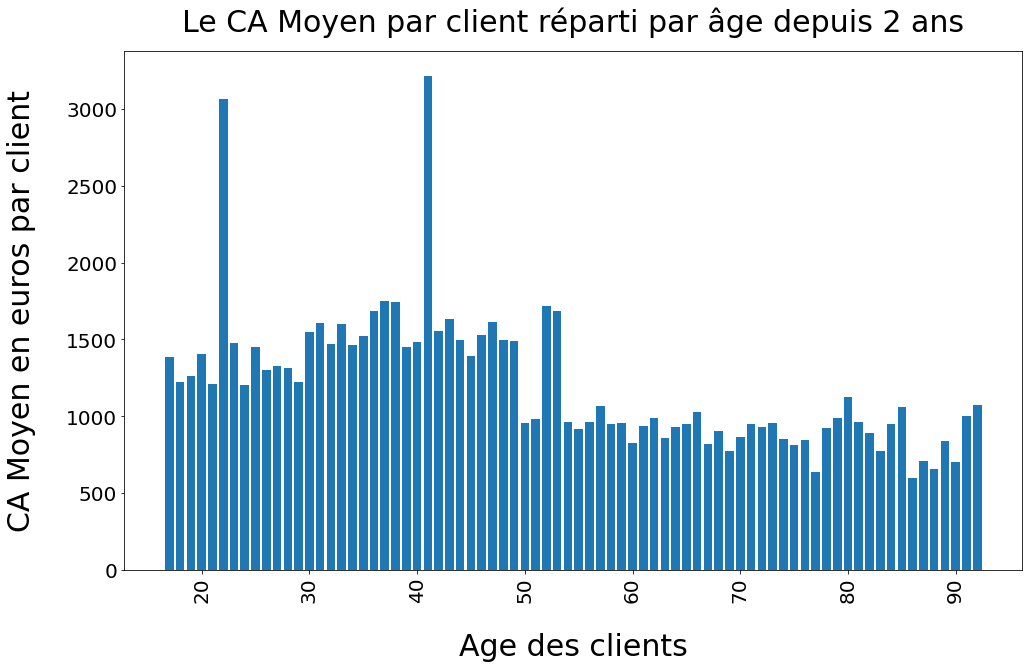

In [187]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

Nbre_ligne = len(CA_age_count)

# X et Y

X = CA_age_count.index[:Nbre_ligne]

Y = [CA_age_count.iloc[i][2] for i in range(Nbre_ligne)]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"CA Moyen en euros par client", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Age des clients", fontsize = fs+10, labelpad= 30 )
plt.title(u"Le CA Moyen par client réparti par âge depuis 2 ans", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_CA_Moyen_age.png")
plt.show()

In [188]:
M10 = CA_age_count["CA_Moyen_par_age"] >= 2000
CA_age_count[M10]

,CA,client_id,CA_Moyen_par_age
age,,,
22,489497.54,160,3059.36
41,613684.40,191,3213.01


## Profil des Client de 17 ans

In [189]:
# Voici les clients de 17 ans

DF_Cust_17_ans

,client_id,sex,birth,age
43,c_1046,m,2004,17
71,c_3081,m,2004,17
95,c_1418,f,2004,17
101,c_3338,m,2004,17
106,c_1774,f,2004,17
...,...,...,...,...
8584,c_461,f,2004,17
8594,c_294,m,2004,17
8598,c_5339,f,2004,17
8606,c_4077,m,2004,17


In [190]:
DF_Cust_17_ans.groupby(["sex"]).count()

,client_id,birth,age
sex,,,
f,232,232,232
m,208,208,208


In [191]:
CA_age_count.head(1)

,CA,client_id,CA_Moyen_par_age
age,,,
17,609013.69,440,1384.12


## Analyse du Meilleur client

In [192]:
Transactions["client_id"].describe()

count     679532
unique      8602
top       c_1609
freq       25488
Name: client_id, dtype: object

In [193]:
M11 = Mother_Table["client_id"] == 'c_1609'
Best_Client_c_1609 = Mother_Table[M11]
Best_Client_c_1609

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age
30,0_1304,2021-03-01 00:07:04.371179,s_7,c_1609,2021-03-01,2021,2021/03,1,00-07,5.86,0.0,5.86,0.0,m,1980,41
59,0_1460,2021-03-01 12:30:57.658136,s_257,c_1609,2021-03-01,2021,2021/03,1,12-30,4.59,0.0,4.59,0.0,m,1980,41
72,0_1529,2021-03-01 02:52:05.750117,s_46,c_1609,2021-03-01,2021,2021/03,1,02-52,3.99,0.0,3.99,0.0,m,1980,41
98,0_1079,2021-03-01 22:53:25.407499,s_472,c_1609,2021-03-01,2021,2021/03,1,22-53,5.99,0.0,5.99,0.0,m,1980,41
115,0_1614,2021-03-01 14:05:53.112762,s_296,c_1609,2021-03-01,2021,2021/03,1,14-05,4.03,0.0,4.03,0.0,m,1980,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679232,1_730,2023-02-28 00:58:47.684406,s_347974,c_1609,2023-02-28,2023,2023/02,28,00-58,22.65,1.0,22.65,1.0,m,1980,41
679289,0_1030,2023-02-28 17:06:21.321049,s_348306,c_1609,2023-02-28,2023,2023/02,28,17-06,13.73,0.0,13.73,0.0,m,1980,41
679292,1_735,2023-02-28 21:42:40.632842,s_348401,c_1609,2023-02-28,2023,2023/02,28,21-42,22.99,1.0,22.99,1.0,m,1980,41
679293,0_1090,2023-02-28 12:39:14.464950,s_348219,c_1609,2023-02-28,2023,2023/02,28,12-39,13.78,0.0,13.78,0.0,m,1980,41


In [194]:
print(f"Ce client est un homme, il a 41 ans et achète régulièrement de mars 2021 à février 2023")

Ce client est un homme, il a 41 ans et achète régulièrement de mars 2021 à février 2023


In [195]:
# Le nombre d'achat

Best_Client_c_1609_achat = Best_Client_c_1609[["date","id_prod"]].groupby(["id_prod"]).count().sort_values(["date"], ascending = False)
Best_Client_c_1609_achat.rename(columns={'date': 'Nbre_achat'}, inplace=True)
Best_Client_c_1609_achat

,Nbre_achat
id_prod,
0_1438,95
0_1360,79
0_1334,78
0_1424,75
0_1411,73
...,...
1_455,1
0_376,1
0_375,1


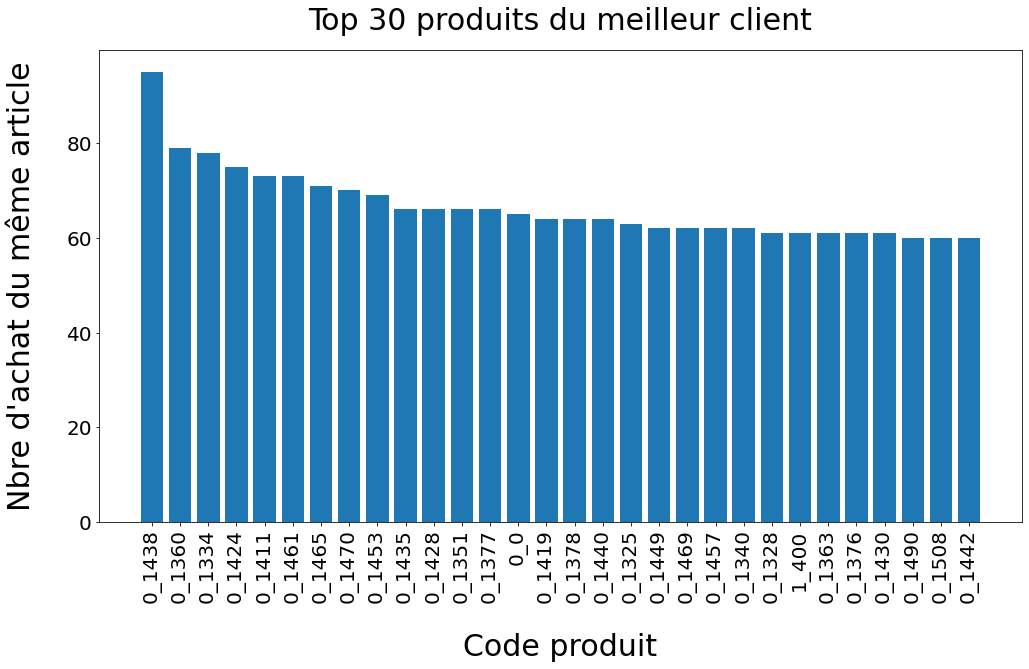

In [196]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

Top = 30

# X et Y

X = Best_Client_c_1609_achat.index[:Top]

Y = [Best_Client_c_1609_achat.iloc[i][0] for i in range(Top)]

# Traçage de la courbe

plt.bar(X,Y)

# Customisation du graphique

plt.ylabel(u"Nbre d'achat du même article", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Code produit", fontsize = fs+10, labelpad= 30 )
plt.title(u"Top 30 produits du meilleur client", fontsize = fs+10, pad= 20)


# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Best_client.png")
plt.show()

## Courbe de Lorenz

In [197]:
# On va calculer le CA de chaque client et faire la somme cumulé dans l'ordre croissant 
# de chacun de ces CA pour tracer la courbe de Lorentz

Lorenz = Mother_Table[["price_modif","client_id"]].groupby(["client_id"]).sum().sort_values(["price_modif"], ascending = True).round(2)
Lorenz.rename(columns={'price_modif': 'CA'}, inplace=True)
Lorenz

,CA
client_id,
c_8351,6.31
c_8140,8.30
c_8114,9.98
c_240,11.06
c_4648,11.20
...,...
c_3263,5276.87
c_3454,113690.29
c_6714,153703.65


In [198]:
Y_Lorenz = (Lorenz["CA"].cumsum())/(Lorenz["CA"].sum())
Y_Lorenz

client_id
c_8351    5.321488e-07
c_8140    1.232123e-06
c_8114    2.073778e-06
c_240     3.006514e-06
c_4648    3.951057e-06
              ...     
c_3263    9.256857e-01
c_3454    9.352737e-01
c_6714    9.482362e-01
c_4958    9.726729e-01
c_1609    1.000000e+00
Name: CA, Length: 8600, dtype: float64

In [199]:
# La courbe de Lorenz commence à 0

Y_Lorenz = np.append([0],Y_Lorenz) 
Y_Lorenz

array([0.00000000e+00, 5.32148789e-07, 1.23212263e-06, ...,
       9.48236201e-01, 9.72672907e-01, 1.00000000e+00])

In [200]:
# Traçons le X sur lma courbe de Lorenz

n = len(Y_Lorenz)

xaxis = np.arange(0,1,1/n) 
xaxis


array([0.00000000e+00, 1.16265551e-04, 2.32531101e-04, ...,
       9.99651203e-01, 9.99767469e-01, 9.99883734e-01])

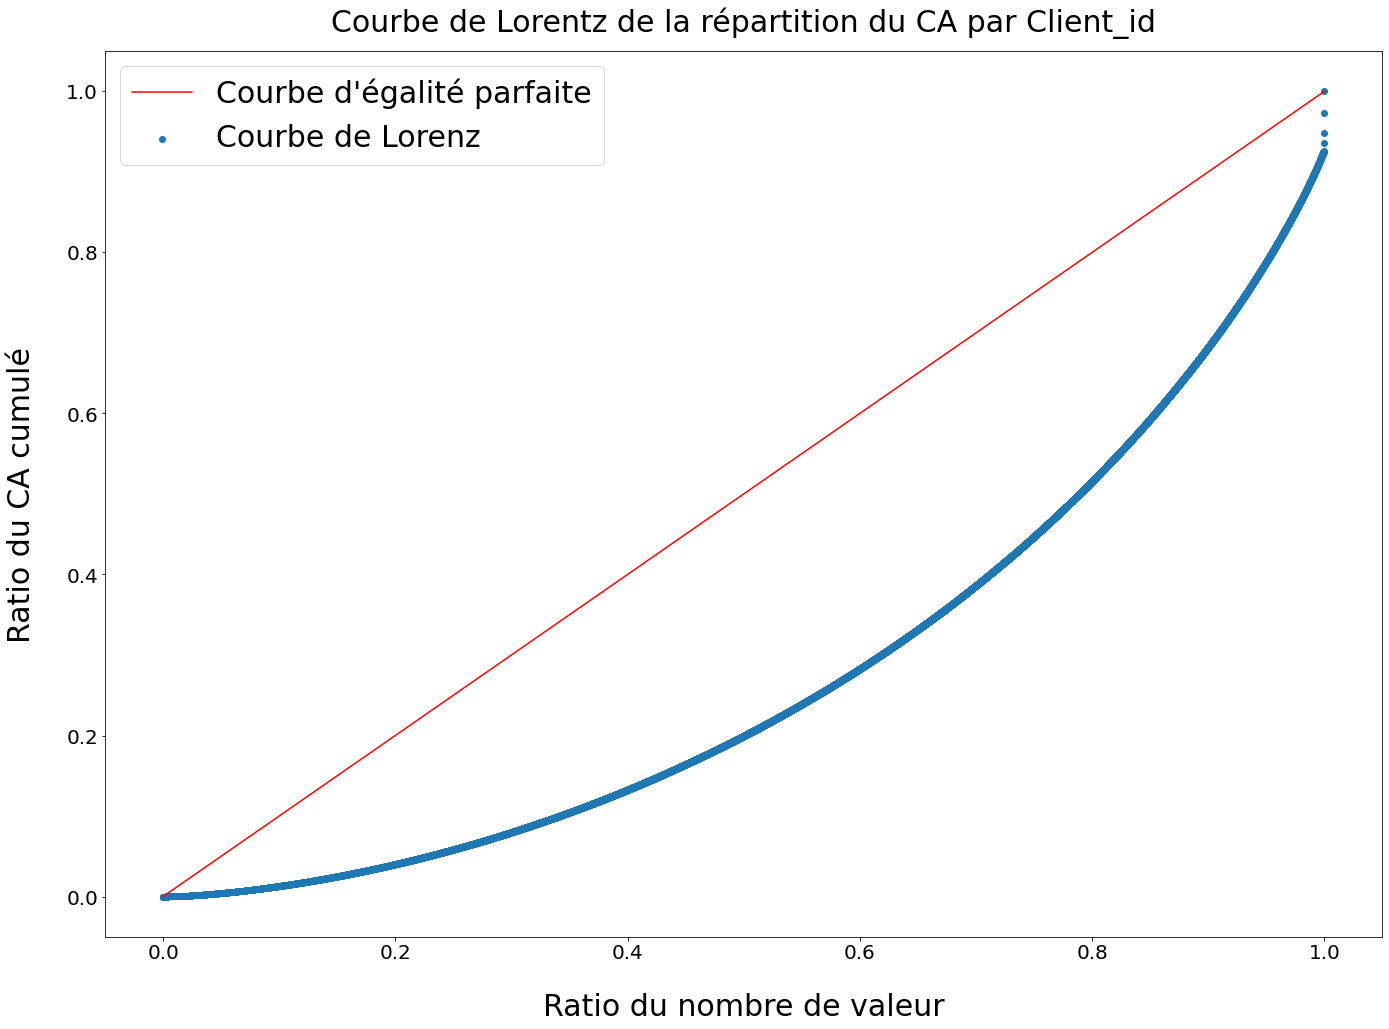

In [201]:
# Taille de la figure

fs = 20

plt.subplots(figsize=[fs,fs-5])

# X et Y

X = xaxis[:]

Y = Y_Lorenz[:]

# Traçage de la courbe

plt.scatter(X,Y,label="Courbe de Lorenz")

# Traçage de la courbe de répartition équitable

plt.plot([0, 1], [0, 1], color = 'red', linestyle = 'solid',label="Courbe d'égalité parfaite")

# Customisation du graphique

plt.ylabel(u"Ratio du CA cumulé", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Ratio du nombre de valeur", fontsize = fs +10, labelpad= 30 )
plt.title(u"Courbe de Lorentz de la répartition du CA par Client_id", fontsize = fs+10, pad= 20)


# Set text labels.

plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)
plt.legend()

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P6_Lorenz.png")
plt.show()

In [202]:
# D'après le cours pour calculer l'indicateur de Gini et interpréter la courbe de Lorenz

# AUC, la surface sous la courbe de Lorenz.

n = len(Y_Lorenz)

AUC = (Y_Lorenz.sum()-Y_Lorenz[-1])/n 

# S est la surface entre la première bissectrice et le courbe de Lorenz

S = 0.5 - AUC 

# Définition de l'indicateur de Gini

gini = (2*S).round(3)

print(f"L'indice de Gini est égal à {gini}")

L'indice de Gini est égal à 0.447


## Interpolation de la courbe de lorenz pour trouver la médiale

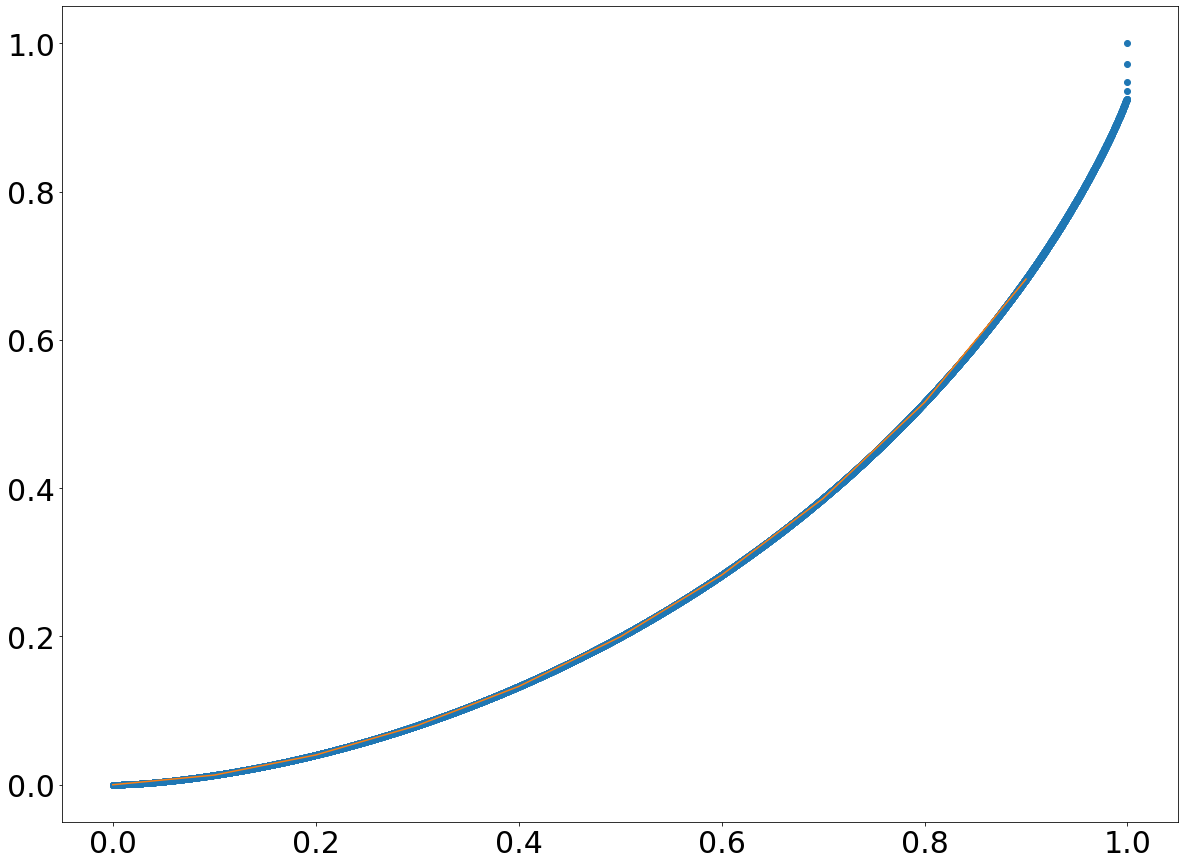

In [203]:
# Taille de la figure

fs = 20

plt.subplots(figsize=[fs,fs-5])

f = scipy.interpolate.interp1d(xaxis[:], Y_Lorenz[:], kind='quadratic')

xnew = np.arange(0, 1, 0.1)
ynew = f(xnew)
plt.plot(xaxis[:], Y_Lorenz[:], 'o', xnew, ynew, '-')

plt.show()

In [204]:
# Trouvons la valeur y de la médiale

Médiale = round(float(f(0.5)),4)
Médiale

0.1995

# 5) Demande de Julie

## Les corrélations 

In [205]:
# Voici les corrélations entre toutes les variables quantitatives:

pc = Mother_Table.corr(method='pearson', min_periods=5)
pc

,Année,Jour,price,categ,price_modif,categ_modif,birth,age
Année,1.000000,-0.018287,0.014201,0.033502,0.014199,0.033494,-0.002629,0.002629
Jour,-0.018287,1.000000,0.000621,-0.002420,0.000621,-0.002399,0.005249,-0.005249
price,0.014201,0.000621,1.000000,0.671752,1.000000,0.671752,0.209465,-0.209465
categ,0.033502,-0.002420,0.671752,1.000000,0.671752,1.000000,0.099241,-0.099241
price_modif,0.014199,0.000621,1.000000,0.671752,1.000000,0.671692,0.209443,-0.209443
categ_modif,0.033494,-0.002399,0.671752,1.000000,0.671692,1.000000,0.099222,-0.099222
birth,-0.002629,0.005249,0.209465,0.099241,0.209443,0.099222,1.000000,-1.000000
age,0.002629,-0.005249,-0.209465,-0.099241,-0.209443,-0.099222,-1.000000,1.000000


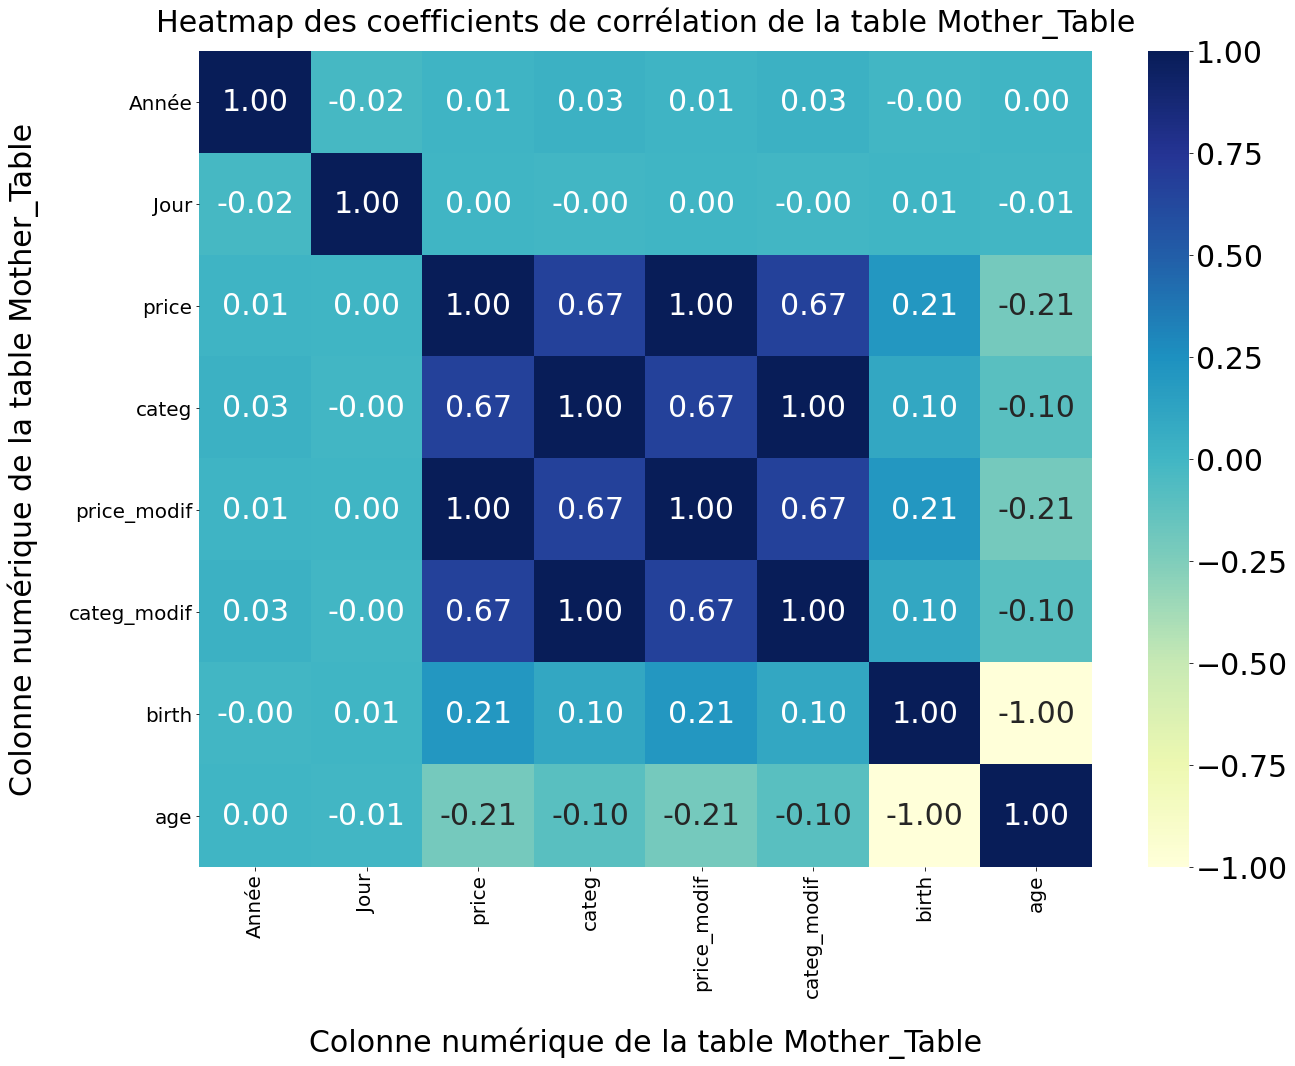

In [206]:
# Taille de la figure

fs = 20

plt.subplots(figsize=[fs,fs-5])

sns.heatmap(pc, annot=True, fmt=".2f", cmap="YlGnBu")

# Customisation du graphique

plt.ylabel(u"Colonne numérique de la table Mother_Table", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Colonne numérique de la table Mother_Table", fontsize = fs +10, labelpad= 30 )
plt.title(u"Heatmap des coefficients de corrélation de la table Mother_Table", fontsize = fs+10, pad= 20)


# Set text labels.

plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)

# Pour sauvegarder la figure

plt.savefig("P6_Corrélations_Mother_Table.png")
plt.show()

## a) Corrélation: Genre d'un client / Catégorie de livre acheté

In [207]:
# Affichons le nombre de transactions par catégorie de livre

Corre_Sexe_Categ_modif = pd.crosstab(Mother_Table['sex'],Mother_Table["categ_modif"], rownames=["Sexe"], colnames=["Catégorie de livre modifiée"],margins=False,margins_name="Total", normalize=False)
Corre_Sexe_Categ_modif

Catégorie de livre modifiée,0.0,1.0,2.0
Sexe,,,
f,206220,114899,17283
m,209460,112270,19200


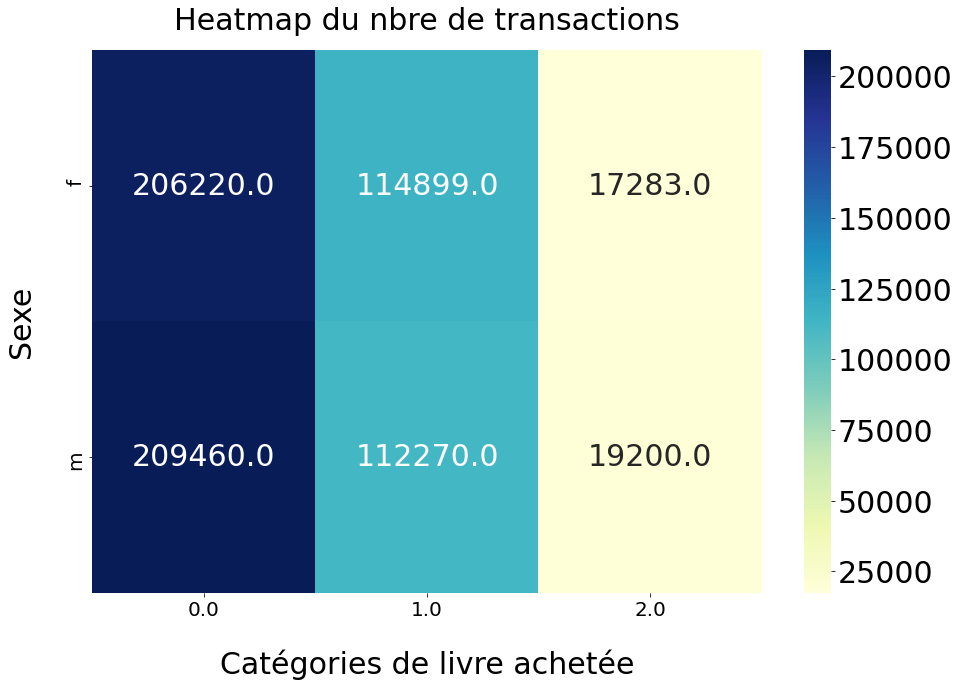

In [208]:
# Taille de la figure

fs = 20

plt.subplots(figsize=[fs-5,fs-10])

sns.heatmap(Corre_Sexe_Categ_modif, annot=True, fmt=".1f", cmap="YlGnBu")

# Customisation du graphique

plt.ylabel(u"Sexe", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Catégories de livre achetée", fontsize = fs +10, labelpad= 30 )
plt.title(u"Heatmap du nbre de transactions", fontsize = fs+10, pad= 20)


# Set text labels.

plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)

# Pour sauvegarder la figure

plt.savefig("P6_Contingence_Sexe_Catégorie_livre_achetées.png")
plt.show()

In [209]:
# Voici la répartition en pourcentage des effectifs de ces catégories

Corre_Sexe_Categ_modif_pourcentage = pd.crosstab(Mother_Table['sex'],Mother_Table["categ_modif"], rownames=["Sexe"], colnames=["Catégorie de livre modifiée"],margins=True,margins_name="Total", normalize=True)
Corre_Sexe_Categ_modif_pourcentage

Catégorie de livre modifiée,0.0,1.0,2.0,Total
Sexe,,,,
f,0.303563,0.169135,0.025441,0.498139
m,0.308332,0.165265,0.028263,0.501861
Total,0.611895,0.334401,0.053704,1.000000


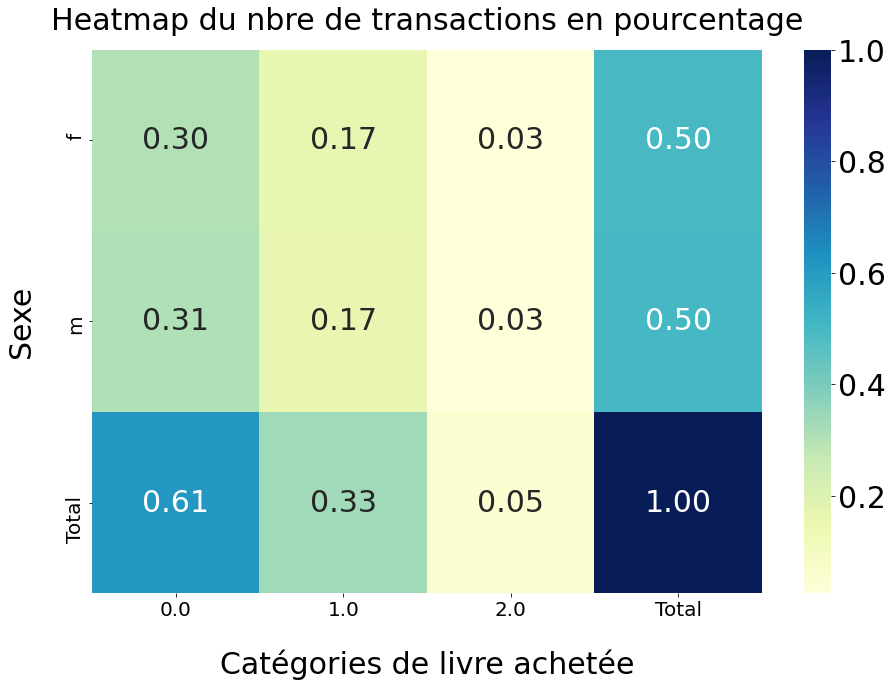

In [210]:
# Taille de la figure

fs = 20

plt.subplots(figsize=[fs-5,fs-10])

sns.heatmap(Corre_Sexe_Categ_modif_pourcentage, annot=True, fmt=".2f", cmap="YlGnBu")

# Customisation du graphique

plt.ylabel(u"Sexe", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Catégories de livre achetée", fontsize = fs +10, labelpad= 30 )
plt.title(u"Heatmap du nbre de transactions en pourcentage", fontsize = fs+10, pad= 20)


# Set text labels.

plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)

# Pour sauvegarder la figure

plt.savefig("P6_Contingence_Sexe_Catégorie_livre_achetées_pourcentage.png")
plt.show()

In [211]:
# Cette fonction dans le module scipy, permet directement d'effectuer le test du khi 2

scipy.stats.chi2_contingency(Corre_Sexe_Categ_modif, correction=False)

(147.00253568681114,
 1.1989607410166063e-32,
 2,
 array([[207066.56444861, 113161.81769444,  18173.61785695],
        [208613.43555139, 114007.18230556,  18309.38214305]]))

In [212]:
# Je vais expliquer à quoi correspond chaque chiffre

chi2, p_value, dof, exp_freq = scipy.stats.chi2_contingency(Corre_Sexe_Categ_modif)

print(f"Le test du chi-2 permet de tester la dépendance de 2 variables qualitatives\n")
print(f"Le premier chiffre de la fonction donne le résultat du chi-2 qui est de {chi2.round(2)}")
print(f"La p_value donne la probabilité à laquelle correspond ce résultat du chi-2 si les 2 variables \nsont indépendantes: p_value = {p_value:.1e}\n")

print(f"Ici cela veut dire si les variables sont indépendantes la probabilité d'obtenir cette valeur est très très faible")
print(f"Voir trop faible => Ici on considère que ces 2 variables sont corrélées à un risque de s'être trompé de {p_value:.1e}\n")
print(f"dof veut dire les degré de liberté du tableau\n")
print(f"exp_freq correspond aux fréquences attendues pour chaque cellule du tableau si les variables étaient \nparfaitement indépendantes")

Le test du chi-2 permet de tester la dépendance de 2 variables qualitatives

Le premier chiffre de la fonction donne le résultat du chi-2 qui est de 147.0
La p_value donne la probabilité à laquelle correspond ce résultat du chi-2 si les 2 variables 
sont indépendantes: p_value = 1.2e-32

Ici cela veut dire si les variables sont indépendantes la probabilité d'obtenir cette valeur est très très faible
Voir trop faible => Ici on considère que ces 2 variables sont corrélées à un risque de s'être trompé de 1.2e-32

dof veut dire les degré de liberté du tableau

exp_freq correspond aux fréquences attendues pour chaque cellule du tableau si les variables étaient 
parfaitement indépendantes


## Corrélation entre âge et autres variables 

### Age et montant total des achats 

In [213]:
# traçons le graphique pôur regarder s'il y a une corrélation

Corre_age_montant_total_achat  = Mother_Table[["price_modif","age"]].groupby(["age"]).sum().round(2)
Corre_age_montant_total_achat.rename(columns={'price_modif': 'CA'}, inplace=True)
Corre_age_montant_total_achat

,CA
age,
17,609013.69
18,178195.78
19,184229.71
20,178497.70
21,165042.89
...,...
88,5271.80
89,5043.19
90,2815.45


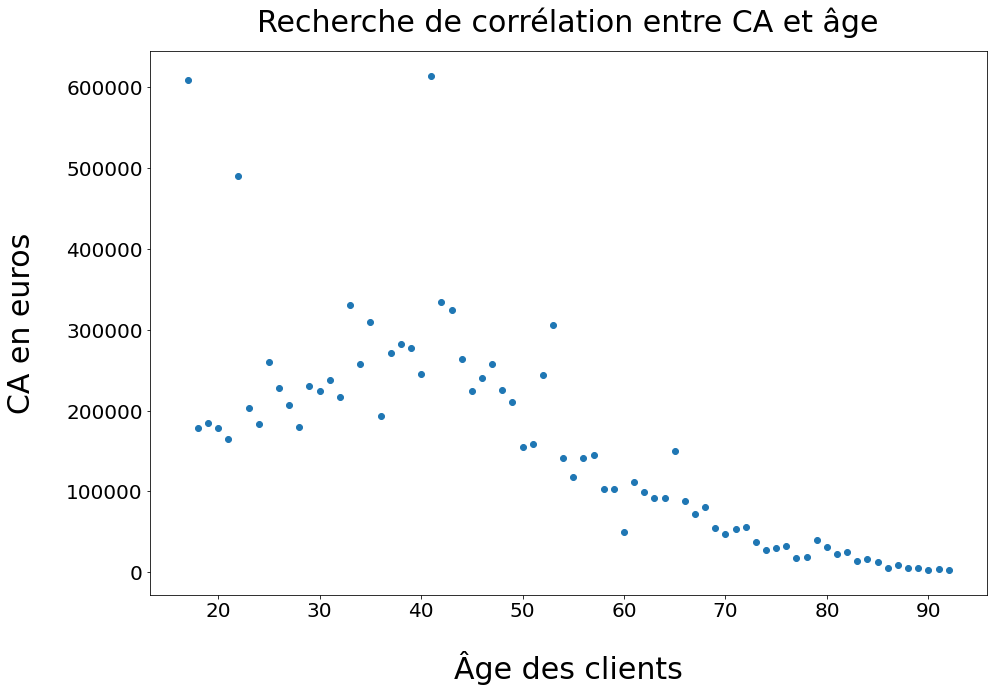

In [214]:
# Taille de la figure

fs = 20

plt.subplots(figsize=[fs-5,fs-10])

# X et Y

X = Corre_age_montant_total_achat.index

Y = Corre_age_montant_total_achat.iloc[:,0]

# Traçage de la courbe

plt.scatter(X,Y,label="Corrélation entre âge et le CA par âge ? ")

# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Âge des clients", fontsize = fs +10, labelpad= 30 )
plt.title(u"Recherche de corrélation entre CA et âge", fontsize = fs+10, pad= 20)


# Set text labels.

plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)

plt.show()

In [215]:
# Définisson une fonction pour tracer la courbe a x + b

def regLin(x, y):
    """
    Ajuste une droite d'équation a*x + b sur les points (x, y) par la méthode
    des moindres carrés.

    Args :
        * x (list): valeurs de x
        * y (list): valeurs de y

    Return:
        * a (float): pente de la droite
        * b (float): ordonnée à l'origine
        * coeff_pearson: Coefficient de corrélation linéaire
        * R2: Coefficient de détermination = coeff_pearson^2
    """
    # Initialisation des sommes
    
    x_sum = 0.
    x2_sum = 0.
    y_sum = 0.
    xy_sum = 0.
    
    # Calcul des sommes
    
    for xi, yi in zip(x, y):
        x_sum += xi
        x2_sum += xi**2
        y_sum += yi
        xy_sum += xi * yi
    
    # Nombre de points
    
    npoints = len(x)
    
    # Calcul des paramètres
    a = (npoints * xy_sum - x_sum * y_sum) / (npoints * x2_sum - x_sum**2)
    b = (x2_sum * y_sum - x_sum * xy_sum) / (npoints * x2_sum - x_sum**2)
    
    # Calcul du coefficient de pearson
    
    coeff_pearson, p_value_pearson = scipy.stats.pearsonr(X,Y)
    
    # Calcul du coefficient de détermination
    
    R2 = coeff_pearson*coeff_pearson
    
    # Boucles pour gérer les différents cas du coefficient linéaire de pearson et afficher les bons commentaires

    if (coeff_pearson) > 0:
          print("La corrélation est positive")
    elif coeff_pearson < 0:
          print("La corrélation est négative")
    else:
          print("La corrélation est nulle !!! Les variables sont indépendantes")
    if abs(coeff_pearson)>= 0.8:
        print("La corrélation est très forte")
    elif abs(coeff_pearson)>= 0.6:
        print("La corrélation est forte")
    elif abs(coeff_pearson)>= 0.4:
        print("La corrélation est modéré")
    elif abs(coeff_pearson)>= 0.2:
        print("La corrélation est faible")
    else:
        print("La corrélation est quasi-inexcistante")     
    
    # Affichage d'informations
    
    print(f"Le coefficient de corrélation linéaire vaut {coeff_pearson.round(2)}")
    print(f"On peut faire confiance à cette corrélation avec une p_value de {p_value_pearson:2e}")
    
    
    # Renvoie des parametres
    return a, b, coeff_pearson, R2

    

La corrélation est négative
La corrélation est forte
Le coefficient de corrélation linéaire vaut -0.78
On peut faire confiance à cette corrélation avec une p_value de 1.200983e-16


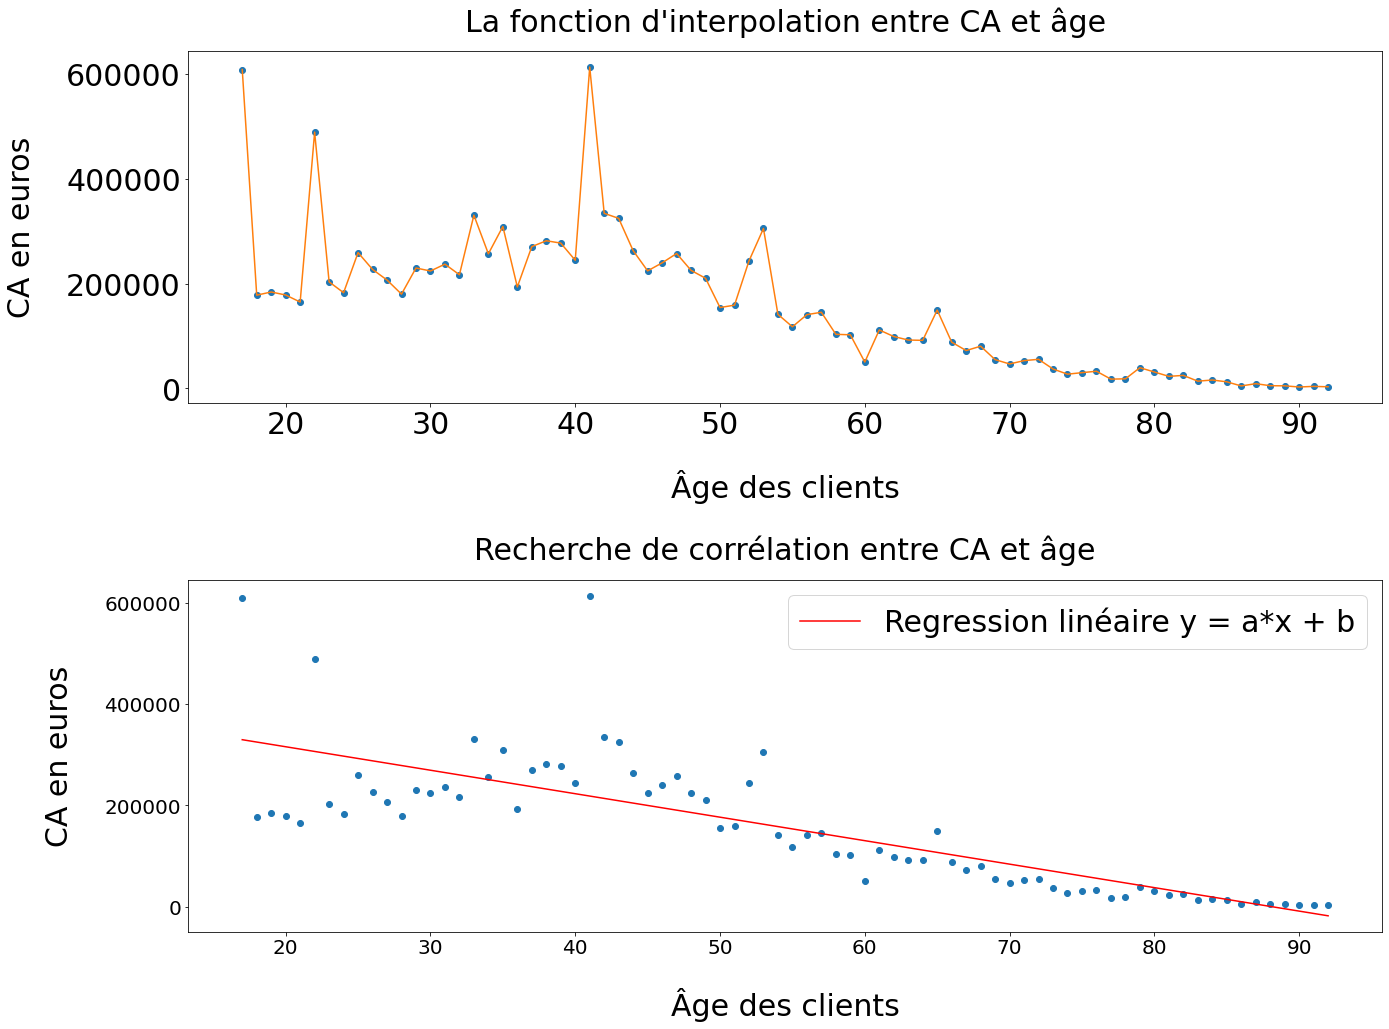

La corrélation est négative
La corrélation est forte
Le coefficient de corrélation linéaire vaut -0.78
On peut faire confiance à cette corrélation avec une p_value de 1.200983e-16
Pour la regression linéaire f(x) = a*x+b, a vaut -4634.8 et b vaut 408617.39


In [216]:
# Taille de la figure

fs = 20

plt.subplots(figsize=[fs,fs-5])

# X et Y

X = Corre_age_montant_total_achat.index

Y = Corre_age_montant_total_achat.iloc[:,0]

# Regression linéaire

a, b, coeff_pearson, R2 = regLin(X,Y)

# Interpolation

g = scipy.interpolate.interp1d(X,Y, kind='cubic',fill_value="extrapolate")

xnew = np.arange(17, 93, 1)
ynew = g(xnew)

# Traçage de l'interpolation

plt.subplot(2,1,1)
plt.plot(X, Y, 'o', xnew, ynew, '-')

# Customisation du graphique 1

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Âge des clients", fontsize = fs +10, labelpad= 30 )
plt.title(u"La fonction d'interpolation entre CA et âge", fontsize = fs+10, pad= 20)

# Graphique 2

plt.subplot(2,1,2)

plt.scatter(X,Y)
plt.plot(X, a*X+b, c='red',label='Regression linéaire y = a*x + b')

# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Âge des clients", fontsize = fs +10, labelpad= 30 )
plt.title(u"Recherche de corrélation entre CA et âge", fontsize = fs+10, pad= 20)


# Set text labels.

plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)

plt.tight_layout()
plt.legend()

plt.savefig("P6_Corrélation_CA_âge.png")
plt.show()

# Info en bas du graphique
a, b, coeff_pearson, R2 = regLin(X,Y)
print(f"Pour la regression linéaire f(x) = a*x+b, a vaut {round(a,2)} et b vaut {round(b,2)}")


In [217]:
M12 = Corre_age_montant_total_achat["CA"] <= 400000
Corre_age_montant_total_achat_filtré2 = Corre_age_montant_total_achat[M12]
Corre_age_montant_total_achat_filtré2

,CA
age,
18,178195.78
19,184229.71
20,178497.70
21,165042.89
23,203545.80
...,...
88,5271.80
89,5043.19
90,2815.45


La corrélation est négative
La corrélation est très forte
Le coefficient de corrélation linéaire vaut -0.84
On peut faire confiance à cette corrélation avec une p_value de 8.812916e-21


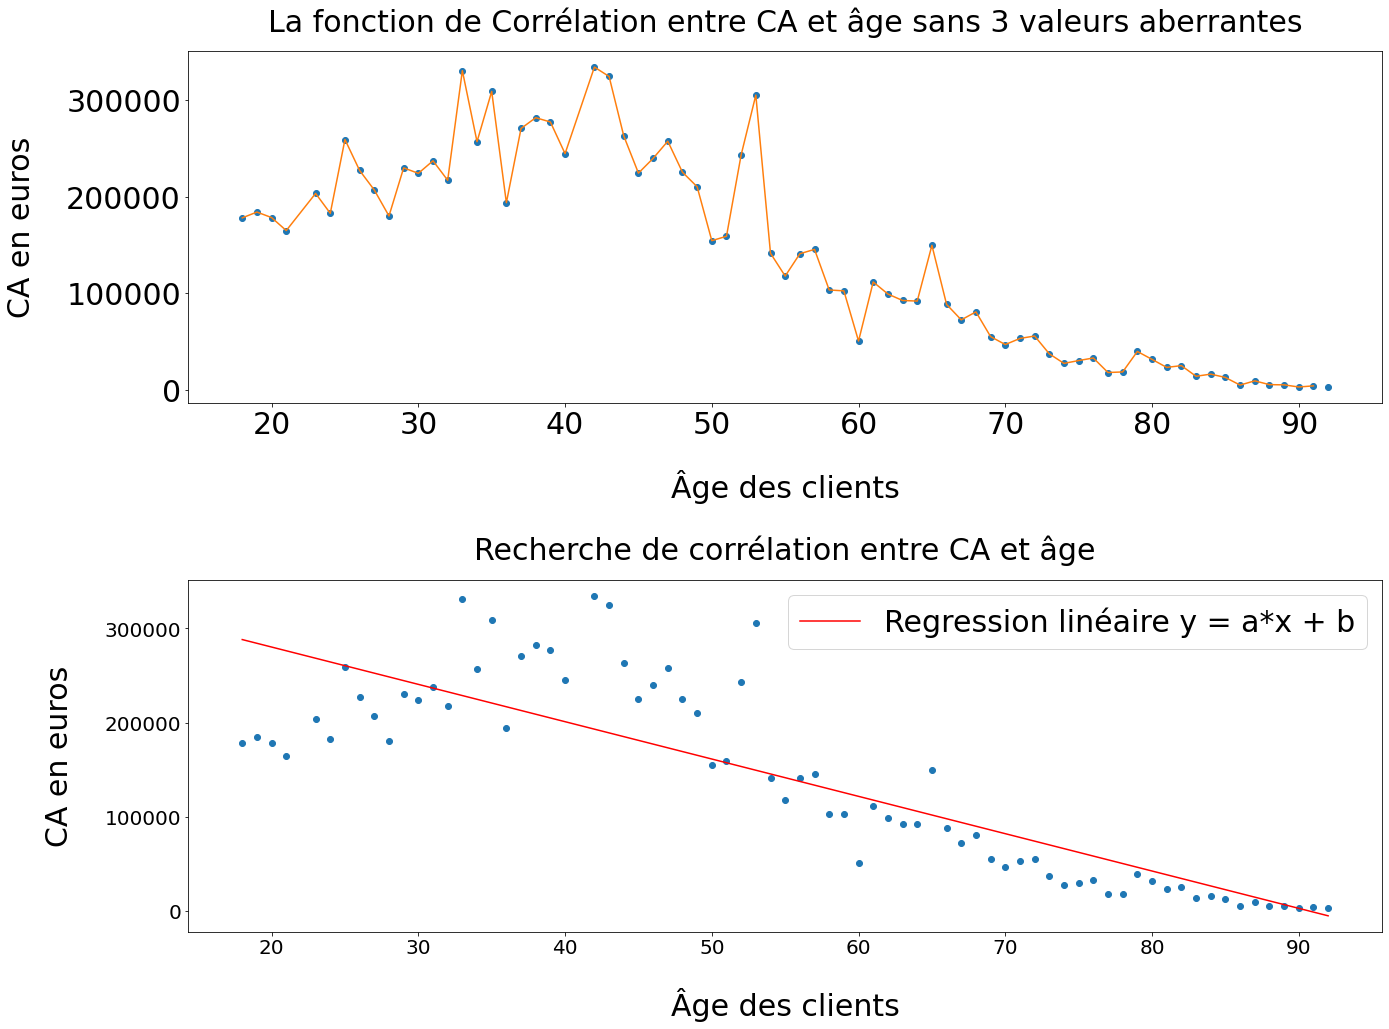

La corrélation est négative
La corrélation est très forte
Le coefficient de corrélation linéaire vaut -0.84
On peut faire confiance à cette corrélation avec une p_value de 8.812916e-21
Pour la regression linéaire f(x) = a*x+b, a vaut -3963.12 et b vaut 359500.92


In [218]:
# Taille de la figure

fs = 20

plt.subplots(figsize=[fs,fs-5])

# X et Y

X = Corre_age_montant_total_achat_filtré2.index

Y = Corre_age_montant_total_achat_filtré2.iloc[:,0]

# regression linéaire

a, b, coeff_pearson, R2 = regLin(X,Y)

# Interpolation

g = scipy.interpolate.interp1d(X,Y, kind='linear',fill_value="extrapolate")

xnew = np.arange(18, 92, 1)
ynew = g(xnew)

# Traçage de l'interpolation

plt.subplot(2,1,1)

plt.plot(X, Y, 'o', xnew, ynew, '-',label='Fonction d\'interpolation')


# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Âge des clients", fontsize = fs +10, labelpad= 30 )
plt.title(u"La fonction de Corrélation entre CA et âge sans 3 valeurs aberrantes", fontsize = fs+10, pad= 20)


# Graphique 2

plt.subplot(2,1,2)

plt.scatter(X,Y)
plt.plot(X, a*X+b, c='red',label='Regression linéaire y = a*x + b')


# Customisation du graphique

plt.ylabel(u"CA en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Âge des clients", fontsize = fs +10, labelpad= 30 )
plt.title(u"Recherche de corrélation entre CA et âge", fontsize = fs+10, pad= 20)


# Set text labels.

plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)
plt.legend()

plt.tight_layout()

plt.savefig("P6_Extrapolation_corrélation_age_CA_sans3points.png")
plt.show()

# Pour afficher des informations

a, b, coeff_pearson, R2 = regLin(X,Y)
print(f"Pour la regression linéaire f(x) = a*x+b, a vaut {round(a,2)} et b vaut {round(b,2)}")


### Création de tranche d'âge

In [219]:
# Création de tranche d'âge de 10 ans

bin_labels=labels=['17 à 20 ans','21 à 30 ans', '31 à 40 ans', '41 à 50 ans', '51 à 60 ans', '61 à 70 ans', '71 à 80 ans', '81 à 90 ans', '+ 90 ans']
Mother_Table['Age_Range'],bin_values= pd.cut(x=Mother_Table['age'], bins=[10,20,30,40,50,60,70,80,90,100],labels=bin_labels,retbins=True)

Mother_Table.head(5)

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age,Age_Range
0,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021,2021/03,1,21-50,4.22,0.0,4.22,0.0,f,1981,40,31 à 40 ans
1,0_1115,2021-03-01 06:43:40.590384,s_134,c_7575,2021-03-01,2021,2021/03,1,06-43,6.99,0.0,6.99,0.0,m,1973,48,41 à 50 ans
2,0_1434,2021-03-01 10:14:21.593374,s_206,c_226,2021-03-01,2021,2021/03,1,10-14,8.58,0.0,8.58,0.0,m,1984,37,31 à 40 ans
3,2_43,2021-03-01 21:11:16.391272,s_437,c_7563,2021-03-01,2021,2021/03,1,21-11,69.99,2.0,69.99,2.0,f,1999,22,21 à 30 ans
4,1_631,2021-03-01 05:43:45.601513,s_127,c_8607,2021-03-01,2021,2021/03,1,05-43,14.99,1.0,14.99,1.0,m,1974,47,41 à 50 ans


### Corrélation entre âge et fréquence d'achat

In [220]:
# Regardons la fréquence d'achat par Année

Corre_age_freq_achat_Année = pd.crosstab(Mother_Table['age'],Mother_Table["Année"], rownames=["Âge"], colnames=["Année"],margins=True,margins_name="Total", normalize=False)
Corre_age_freq_achat_Année

Année,2021,2022,2023,Total
Âge,,,,
17,5935,7851,1363,15149
18,1785,2212,374,4371
19,1834,2394,359,4587
20,1664,2204,384,4252
21,1743,2320,352,4415
...,...,...,...,...
89,135,144,32,311
90,71,85,14,170
91,93,119,14,226


La corrélation est négative
La corrélation est modéré
Le coefficient de corrélation linéaire vaut -0.53
On peut faire confiance à cette corrélation avec une p_value de 6.888378e-07


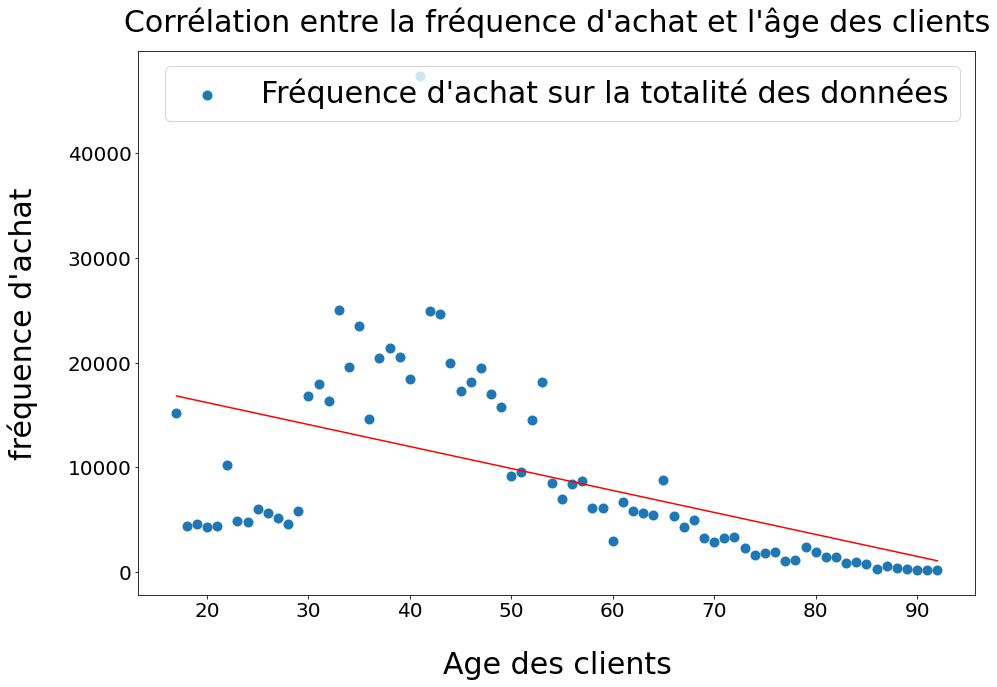

La corrélation est négative
La corrélation est modéré
Le coefficient de corrélation linéaire vaut -0.53
On peut faire confiance à cette corrélation avec une p_value de 6.888378e-07


In [221]:
# Taille de la figure

fs = 20

plt.subplots(figsize=[fs-5,fs-10])

# X et Y Total

X = Corre_age_freq_achat_Année.index[:-1]

Y = Corre_age_freq_achat_Année.iloc[:-1,3]

# regression linéaire

a, b, coeff_pearson, R2 = regLin(X,Y)


# Traçage de la courbe

# Epaisseur des traits

ep = 4

plt.scatter(X,Y,label="Fréquence d'achat sur la totalité des données", linewidth=ep)
plt.plot(X,a*X+b, c='red')

# Customisation du graphique

plt.ylabel(u"fréquence d'achat", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Age des clients", fontsize = fs +10, labelpad= 30 )
plt.title(u"Corrélation entre la fréquence d'achat et l'âge des clients", fontsize = fs+10, pad= 20)


# Set text labels.

plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)
plt.legend()

# Pour sauvegarder la figure

plt.savefig("P6_fréquence_âge_clients.png")
plt.show()

a, b, coeff_pearson, R2 = regLin(X,Y)

In [226]:
# Coefficient de corrélation étha carré

# x qualitative
# y quantitative

def etha_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT


In [227]:
A = Mother_Table[["id_prod","client_id"]].groupby(["client_id"]).count()
A = A.rename(columns={'id_prod': 'Fréquence d\'achat'})
A

,Fréquence d'achat
client_id,
c_1,39
c_10,58
c_100,8
c_1000,125
c_1001,102
...,...
c_995,14
c_996,95
c_997,59


In [228]:
# Pour utiliser la fonction étha 2 je dois  avoir les colonnes Age_Range et Fréquence d'achat dans le même dataframe

A2 = pd.merge(A,Mother_Table[["Age_Range","client_id"]],on="client_id",how="left").drop_duplicates()
A2

,client_id,Fréquence d'achat,Age_Range
0,c_1,39,61 à 70 ans
39,c_10,58,61 à 70 ans
97,c_100,8,21 à 30 ans
105,c_1000,125,51 à 60 ans
230,c_1001,102,31 à 40 ans
...,...,...,...
679065,c_995,14,61 à 70 ans
679079,c_996,95,51 à 60 ans
679174,c_997,59,21 à 30 ans
679233,c_998,53,17 à 20 ans


In [230]:
# X qualitative

X= A2["Age_Range"]

# Y quantitative

Y = A2["Fréquence d\'achat"]

etha_squared(X,Y)

0.013061193860011927

### Corrélation entre âge et panier moyen 

In [231]:
Corre_age_panier = Mother_Table[["price_modif","session_id","age"]].groupby(["age","session_id"]).sum()
Corre_age_panier = Corre_age_panier.rename(columns={'price_modif': 'Panier'})
Corre_age_panier

Panier
age session_id        
17  s_100056     68.99
    s_100057     67.57
    s_100084     12.99
    s_100087     15.99
    s_100148     67.57
...                ...
92  s_83514      13.11
    s_87562      84.49
    s_92980       7.99
    s_95446      21.19
    s_95746      78.90

[342315 rows x 1 columns]

In [232]:
# Prenons le paniers moyen qui est la moyenne de tout ces paniers

Corre_age_panier_moyen = Corre_age_panier.groupby(["age"]).mean().round(2)
Corre_age_panier_moyen = Corre_age_panier_moyen.rename(columns={'Panier': 'Panier Moyen'})
Corre_age_panier_moyen

,Panier Moyen
age,
17,70.86
18,69.42
19,70.75
20,73.43
21,68.17
...,...
88,22.53
89,24.48
90,29.33


La corrélation est négative
La corrélation est forte
Le coefficient de corrélation linéaire vaut -0.75
On peut faire confiance à cette corrélation avec une p_value de 1.030888e-14


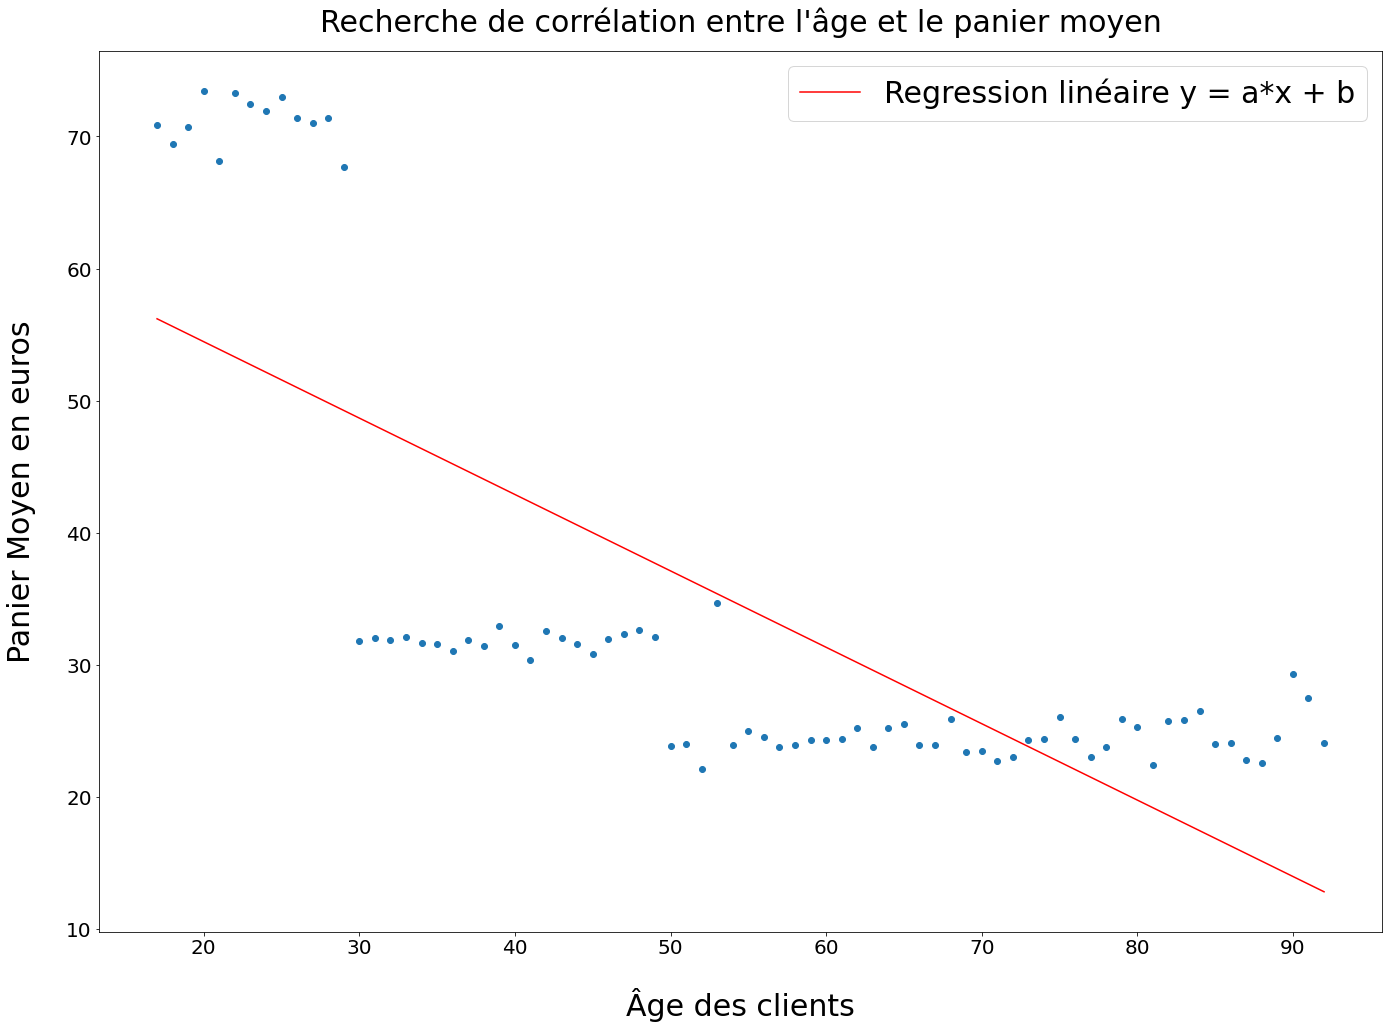

La corrélation est négative
La corrélation est forte
Le coefficient de corrélation linéaire vaut -0.75
On peut faire confiance à cette corrélation avec une p_value de 1.030888e-14
Pour la regression linéaire f(x) = a*x+b, a vaut -0.58 et b vaut 66.03


In [233]:
# Taille de la figure

fs = 20

plt.subplots(figsize=[fs,fs-5])

# X et Y

X = Corre_age_panier_moyen.index

Y = Corre_age_panier_moyen.iloc[:,0]

# regression linéaire

a, b, coeff_pearson, R2 = regLin(X,Y)

# Graphiques

plt.scatter(X,Y)
plt.plot(X, a*X+b, c='red',label='Regression linéaire y = a*x + b')

# Customisation du graphique

plt.ylabel(u"Panier Moyen en euros", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Âge des clients", fontsize = fs +10, labelpad= 30 )
plt.title(u"Recherche de corrélation entre l'âge et le panier moyen", fontsize = fs+10, pad= 20)

# Set text labels.

plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)

plt.legend()

plt.tight_layout()

plt.savefig("P6_corrélation_age_panier_moyen.png")
plt.show()

# Pour afficher des informations

a, b, coeff_pearson, R2 = regLin(X,Y)
print(f"Pour la regression linéaire f(x) = a*x+b, a vaut {round(a,2)} et b vaut {round(b,2)}")


In [234]:
print(f"Le coefficient de détermination est de {R2.round(4)}")
print(f"Ce qui veut dire que en connaissant le panier moyen on peut expliquer {(R2*100).round(2)} % de la variation de l'âge du client")

Le coefficient de détermination est de 0.5568
Ce qui veut dire que en connaissant le panier moyen on peut expliquer 55.68 % de la variation de l'âge du client


### Corrélation entre âge et catégories de livres achetées

In [235]:
Corre_age_Categ_modif = pd.crosstab(Mother_Table['age'],Mother_Table["categ_modif"], rownames=["Age"], colnames=["Catégorie de livre modifiée"],margins=False,margins_name="Total", normalize=False)
Corre_age_Categ_modif

Catégorie de livre modifiée,0.0,1.0,2.0
Age,,,
17,3418,5719,6012
18,909,1678,1784
19,1019,1723,1845
20,974,1550,1728
21,1116,1628,1671
...,...,...,...
88,143,183,1
89,132,177,2
90,77,91,2


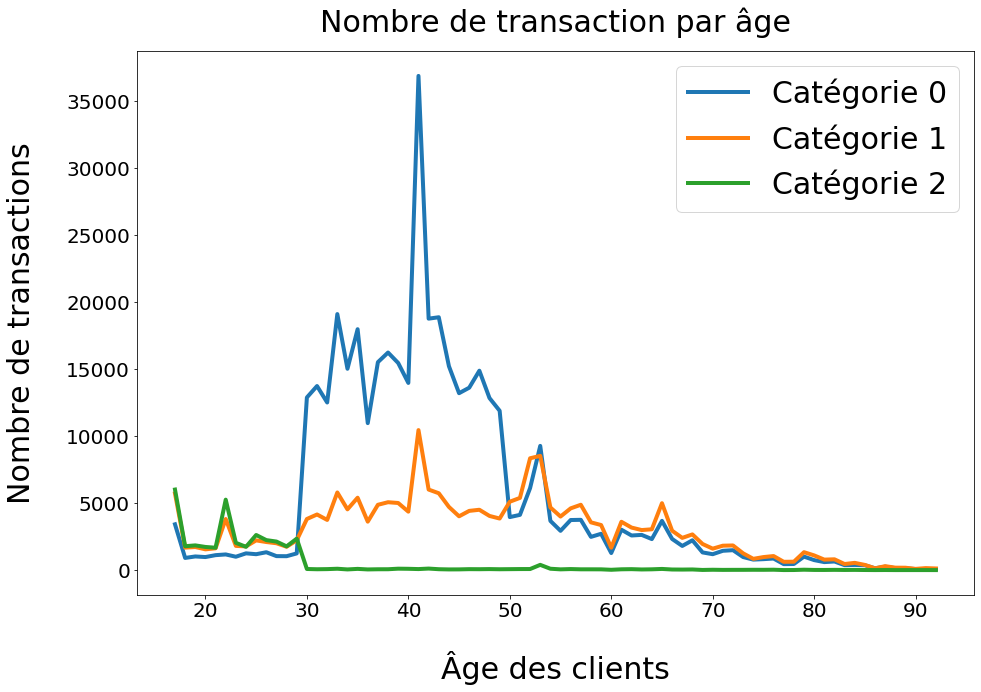

In [236]:
# Taille de la figure

fs = 20

plt.subplots(figsize=[fs-5,fs-10])

# X et Y cat 0

X = Corre_age_Categ_modif.index

Y = Corre_age_Categ_modif.iloc[:,0]


# X et Y cat 1

X = Corre_age_Categ_modif.index

Y2 = Corre_age_Categ_modif.iloc[:,1]


# X et Y categ 2

X = Corre_age_Categ_modif.index

Y3 = Corre_age_Categ_modif.iloc[:,2]


# Traçage de la courbe

# Epaisseur des traits

ep = 4

plt.plot(X,Y,label="Catégorie 0", linewidth=ep)
plt.plot(X,Y2,label="Catégorie 1", linewidth=ep)
plt.plot(X,Y3,label="Catégorie 2", linewidth=ep)


#sns.heatmap(Corre_age_Categ_modif, annot=False, cmap="YlGnBu")

# Customisation du graphique

plt.ylabel(u"Nombre de transactions", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Âge des clients", fontsize = fs +10, labelpad= 30 )
plt.title(u"Nombre de transaction par âge", fontsize = fs+10, pad= 20)


# Set text labels.

plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)

plt.legend()

plt.savefig("P6_corrélation_age_categorie_livre.jpeg")
plt.show()

In [237]:
Mother_Table

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age,Age_Range
0,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021,2021/03,1,21-50,4.22,0.0,4.22,0.0,f,1981,40,31 à 40 ans
1,0_1115,2021-03-01 06:43:40.590384,s_134,c_7575,2021-03-01,2021,2021/03,1,06-43,6.99,0.0,6.99,0.0,m,1973,48,41 à 50 ans
2,0_1434,2021-03-01 10:14:21.593374,s_206,c_226,2021-03-01,2021,2021/03,1,10-14,8.58,0.0,8.58,0.0,m,1984,37,31 à 40 ans
3,2_43,2021-03-01 21:11:16.391272,s_437,c_7563,2021-03-01,2021,2021/03,1,21-11,69.99,2.0,69.99,2.0,f,1999,22,21 à 30 ans
4,1_631,2021-03-01 05:43:45.601513,s_127,c_8607,2021-03-01,2021,2021/03,1,05-43,14.99,1.0,14.99,1.0,m,1974,47,41 à 50 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,1_283,2023-02-28 13:27:38.262457,s_348222,c_6775,2023-02-28,2023,2023/02,28,13-27,14.99,1.0,14.99,1.0,m,1983,38,31 à 40 ans
679328,0_1421,2023-02-28 12:37:59.788687,s_348221,c_7844,2023-02-28,2023,2023/02,28,12-37,19.99,0.0,19.99,0.0,f,1979,42,41 à 50 ans
679329,0_1333,2023-02-28 22:40:24.405750,s_348416,c_6714,2023-02-28,2023,2023/02,28,22-40,5.99,0.0,5.99,0.0,f,1968,53,51 à 60 ans
679330,2_12,2023-02-28 15:36:26.670993,s_348280,c_4958,2023-02-28,2023,2023/02,28,15-36,57.91,2.0,57.91,2.0,m,1999,22,21 à 30 ans


In [238]:
# test étha 2

X = Mother_Table["categ_modif"] #qualitative
Y = Mother_Table["age"] #quantitative

etha_squared(X,Y)

0.11900916927611822

In [239]:
Corre_tranche_age_Categ_modif = pd.crosstab(Mother_Table['Age_Range'],Mother_Table["categ_modif"], rownames=["Tranche d'âge"], colnames=["Catégorie de livre modifiée"],margins=False,margins_name="Total", normalize=False)
Corre_tranche_age_Categ_modif

Catégorie de livre modifiée,0.0,1.0,2.0
Tranche d'âge,,,
17 à 20 ans,6320,10670,11369
21 à 30 ans,23267,23120,21896
31 à 40 ans,150522,46561,762
41 à 50 ans,160140,52850,712
51 à 60 ans,40078,49024,985
61 à 70 ans,23077,29369,496
71 à 80 ans,9021,11457,183
81 à 90 ans,3102,3847,77
+ 90 ans,153,271,3


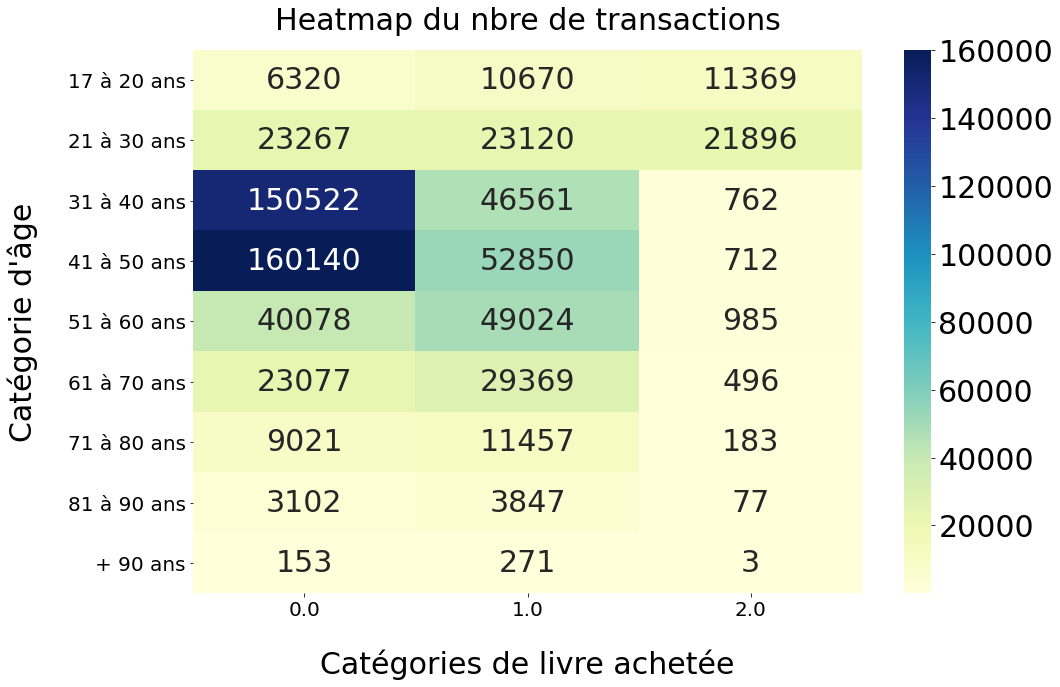

In [240]:
# Taille de la figure

fs = 20

plt.subplots(figsize=[fs-5,fs-10])

sns.heatmap(Corre_tranche_age_Categ_modif, annot=True, fmt=".0f", cmap="YlGnBu")

# Customisation du graphique

plt.ylabel(u"Catégorie d'âge", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Catégories de livre achetée", fontsize = fs +10, labelpad= 30 )
plt.title(u"Heatmap du nbre de transactions", fontsize = fs+10, pad= 20)


# Set text labels.

plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)

# Pour sauvegarder la figure

plt.savefig("P6_Contingence_Age_Catégorie_livre_achetées.png")
plt.show()

In [241]:
# Regardons en fréquence

Corre_tranche_age_Categ_modif_pourcent = pd.crosstab(Mother_Table['Age_Range'],Mother_Table["categ_modif"], rownames=["Catégorie d'âge"], colnames=["Catégorie de livre modifiée"],margins=False,margins_name="Total", normalize=True)
Corre_tranche_age_Categ_modif_pourcent

Catégorie de livre modifiée,0.0,1.0,2.0
Catégorie d'âge,,,
17 à 20 ans,0.009303,0.015707,0.016736
21 à 30 ans,0.034250,0.034033,0.032232
31 à 40 ans,0.221574,0.068539,0.001122
41 à 50 ans,0.235732,0.077797,0.001048
51 à 60 ans,0.058996,0.072165,0.001450
61 à 70 ans,0.033970,0.043232,0.000730
71 à 80 ans,0.013279,0.016865,0.000269
81 à 90 ans,0.004566,0.005663,0.000113
+ 90 ans,0.000225,0.000399,0.000004


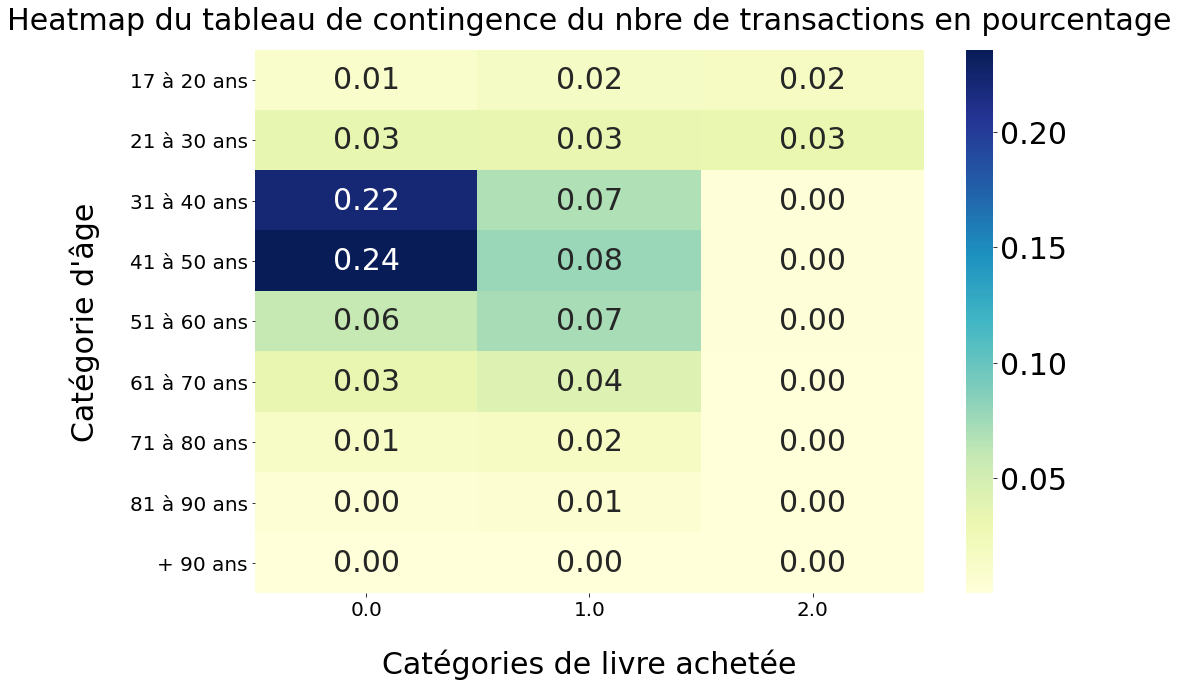

In [242]:
# Taille de la figure

fs = 20

plt.subplots(figsize=[fs-5,fs-10])

sns.heatmap(Corre_tranche_age_Categ_modif_pourcent, annot=True, fmt=".2f", cmap="YlGnBu")

# Customisation du graphique

plt.ylabel(u"Catégorie d'âge", fontsize = fs+10, labelpad= 30)
plt.xlabel(u"Catégories de livre achetée", fontsize = fs +10, labelpad= 30 )
plt.title(u"Heatmap du tableau de contingence du nbre de transactions en pourcentage", fontsize = fs+10, pad= 20)


# Set text labels.

plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)

# Pour sauvegarder la figure

plt.savefig("P6_Contingence_Age_Catégorie_livre_achetées_pourcentage.png")
plt.show()

In [243]:
Corre_tranche_age_Categ_modif

Catégorie de livre modifiée,0.0,1.0,2.0
Tranche d'âge,,,
17 à 20 ans,6320,10670,11369
21 à 30 ans,23267,23120,21896
31 à 40 ans,150522,46561,762
41 à 50 ans,160140,52850,712
51 à 60 ans,40078,49024,985
61 à 70 ans,23077,29369,496
71 à 80 ans,9021,11457,183
81 à 90 ans,3102,3847,77
+ 90 ans,153,271,3


In [244]:
# Faisons le test du chi-2

chi2, p_value, dof, exp_freq = scipy.stats.chi2_contingency(Corre_tranche_age_Categ_modif)

print(f"Le test du chi-2 permet de tester la dépendance de 2 variables qualitatives\n")
print(f"Le premier chiffre de la fonction donne le résultat du chi-2 qui est de {chi2.round(2)}")
print(f"La p_value donne la probabilité à laquelle correspond ce résultat du chi-2 si les 2 variables \nsont indépendantes: p_value = {p_value}")
print(f"\nIci clairement les variables sont corrélées")
print(f"Ici on considère que ces 2 variables sont corrélées à un risque de s'être trompé de {p_value:.1e}")
print(f"\ndof veut dire les degré de liberté du tableau, ils sont de {dof}")
print(f"\nexp_freq correspond aux fréquences attendues pour chaque cellule du tableau si les variables étaient parfaitement\nindépendantes")

Le test du chi-2 permet de tester la dépendance de 2 variables qualitatives

Le premier chiffre de la fonction donne le résultat du chi-2 qui est de 251159.45
La p_value donne la probabilité à laquelle correspond ce résultat du chi-2 si les 2 variables 
sont indépendantes: p_value = 0.0

Ici clairement les variables sont corrélées
Ici on considère que ces 2 variables sont corrélées à un risque de s'être trompé de 0.0e+00

dof veut dire les degré de liberté du tableau, ils sont de 16

exp_freq correspond aux fréquences attendues pour chaque cellule du tableau si les variables étaient parfaitement
indépendantes


## c) Calcul de probabilité conditionnel 

## Calculons P(A) et P(B) 

In [245]:
Mother_Table.head(4)

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age,Age_Range
0,0_1682,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021,2021/03,1,21-50,4.22,0.0,4.22,0.0,f,1981,40,31 à 40 ans
1,0_1115,2021-03-01 06:43:40.590384,s_134,c_7575,2021-03-01,2021,2021/03,1,06-43,6.99,0.0,6.99,0.0,m,1973,48,41 à 50 ans
2,0_1434,2021-03-01 10:14:21.593374,s_206,c_226,2021-03-01,2021,2021/03,1,10-14,8.58,0.0,8.58,0.0,m,1984,37,31 à 40 ans
3,2_43,2021-03-01 21:11:16.391272,s_437,c_7563,2021-03-01,2021,2021/03,1,21-11,69.99,2.0,69.99,2.0,f,1999,22,21 à 30 ans


In [246]:
Nbre_Transaction_Totale = Mother_Table.count()[0]
Nbre_Transaction_Totale

679332

In [247]:
Masque_A = Mother_Table["id_prod"] == '0_525'
A = Mother_Table[Masque_A]
A

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age,Age_Range
774,0_525,2021-03-01 19:06:04.500272,s_397,c_2011,2021-03-01,2021,2021/03,1,19-06,2.99,0.0,2.99,0.0,m,1965,56,51 à 60 ans
1698,0_525,2021-03-02 13:39:35.502960,s_757,c_5585,2021-03-02,2021,2021/03,2,13-39,2.99,0.0,2.99,0.0,m,1954,67,61 à 70 ans
2322,0_525,2021-03-03 23:55:10.815245,s_1384,c_2984,2021-03-03,2021,2021/03,3,23-55,2.99,0.0,2.99,0.0,f,1975,46,41 à 50 ans
2531,0_525,2021-03-03 06:40:26.290615,s_1078,c_3612,2021-03-03,2021,2021/03,3,06-40,2.99,0.0,2.99,0.0,m,1988,33,31 à 40 ans
2657,0_525,2021-03-03 08:50:15.922658,s_1106,c_6714,2021-03-03,2021,2021/03,3,08-50,2.99,0.0,2.99,0.0,f,1968,53,51 à 60 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670058,0_525,2023-02-19 17:42:48.253824,s_343979,c_1698,2023-02-19,2023,2023/02,19,17-42,2.99,0.0,2.99,0.0,f,1956,65,61 à 70 ans
671051,0_525,2023-02-20 02:40:49.654844,s_344167,c_3558,2023-02-20,2023,2023/02,20,02-40,2.99,0.0,2.99,0.0,m,2003,18,17 à 20 ans
672687,0_525,2023-02-21 10:09:24.688792,s_344793,c_5362,2023-02-21,2023,2023/02,21,10-09,2.99,0.0,2.99,0.0,f,1980,41,41 à 50 ans
672878,0_525,2023-02-22 19:36:56.375363,s_345435,c_7507,2023-02-22,2023,2023/02,22,19-36,2.99,0.0,2.99,0.0,m,1981,40,31 à 40 ans


In [248]:
# Regardons le nbre de transactions de A

Nbre_Transaction_A = A.count()[0]
Nbre_Transaction_A

500

In [249]:
# Calculons P(A)

P_A= Nbre_Transaction_A/Nbre_Transaction_Totale
P_A

0.0007360171462554391

In [250]:
Masque_B = Mother_Table["id_prod"] == '2_159'
B = Mother_Table[Masque_B]
B

,id_prod,date,session_id,client_id,Calendrier,Année,Année_Mois,Jour,Heure,price,categ,price_modif,categ_modif,sex,birth,age,Age_Range
890,2_159,2021-03-01 19:06:03.500272,s_397,c_2011,2021-03-01,2021,2021/03,1,19-06,145.99,2.0,145.99,2.0,m,1965,56,51 à 60 ans
1333,2_159,2021-03-02 13:39:34.502960,s_757,c_5585,2021-03-02,2021,2021/03,2,13-39,145.99,2.0,145.99,2.0,m,1954,67,61 à 70 ans
2150,2_159,2021-03-03 08:50:14.922658,s_1106,c_6714,2021-03-03,2021,2021/03,3,08-50,145.99,2.0,145.99,2.0,f,1968,53,51 à 60 ans
2154,2_159,2021-03-03 23:55:09.815245,s_1384,c_2984,2021-03-03,2021,2021/03,3,23-55,145.99,2.0,145.99,2.0,f,1975,46,41 à 50 ans
2795,2_159,2021-03-03 06:40:25.290615,s_1078,c_3612,2021-03-03,2021,2021/03,3,06-40,145.99,2.0,145.99,2.0,m,1988,33,31 à 40 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670977,2_159,2023-02-20 02:40:48.654844,s_344167,c_3558,2023-02-20,2023,2023/02,20,02-40,145.99,2.0,145.99,2.0,m,2003,18,17 à 20 ans
671901,2_159,2023-02-21 10:09:23.688792,s_344793,c_5362,2023-02-21,2023,2023/02,21,10-09,145.99,2.0,145.99,2.0,f,1980,41,41 à 50 ans
672805,2_159,2023-02-22 19:36:55.375363,s_345435,c_7507,2023-02-22,2023,2023/02,22,19-36,145.99,2.0,145.99,2.0,m,1981,40,31 à 40 ans
674024,2_159,2023-02-23 08:30:07.043044,s_345700,c_1290,2023-02-23,2023,2023/02,23,08-30,145.99,2.0,145.99,2.0,f,1997,24,21 à 30 ans


In [251]:
# Regardons le nbre de transactions de B

Nbre_Transaction_B = B.count()[0]
Nbre_Transaction_B

650

In [252]:
# Calculons P(B)

P_B = Nbre_Transaction_B/Nbre_Transaction_Totale
P_B

0.0009568222901320709

## Calculons P(A sachant B) 

In [253]:
Tableau_G = pd.crosstab(Mother_Table['client_id'],Mother_Table["id_prod"], rownames=["Les clients"], colnames=["Les produits"],margins=False,margins_name="Total", normalize=False)
Tableau_G

Les produits,0_0,0_1,0_10,0_100,0_1000,0_1001,0_1002,0_1003,0_1004,0_1005,...,2_90,2_91,2_92,2_93,2_94,2_95,2_96,2_97,2_98,2_99
Les clients,,,,,,,,,,,,,,,,,,,,,
c_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c_10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c_100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c_1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c_1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c_996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c_997,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [254]:
# Comptons le nombre d'achat de client

Tableau_G.sum()

# Ici on a le nombre d'achat par produit

Les produits
0_0       1242
0_1        487
0_10        22
0_100        3
0_1000     432
          ... 
2_95         4
2_96       598
2_97        13
2_98         1
2_99         7
Length: 3266, dtype: int64

In [255]:
# L1 le nombre total d'achat

L1 = Tableau_G.sum().sum()
L1

679332

In [256]:
# On remarque que le nombre d'achat totaux est bien égale au nombre de transaction total qu'on avait calculé avant

Nbre_Transaction_Totale-L1

0

In [257]:
# Prenons que la référence A et B

Tableau_G2 = Tableau_G[["0_525","2_159"]]
Tableau_G2

Les produits,0_525,2_159
Les clients,,
c_1,0,0
c_10,0,0
c_100,0,0
c_1000,0,0
c_1001,0,0
...,...,...
c_995,0,0
c_996,0,0
c_997,0,0


In [258]:
# Nous voulons regarder là où on a acheté au mois le produit A une fois et le produit B 1 fois

MA = Tableau_G2["0_525"] >=1
MB = Tableau_G2["2_159"] >=1

Tableau_G3 = Tableau_G2[MA & MB]
Tableau_G3

Les produits,0_525,2_159
Les clients,,
c_1025,2,2
c_1028,1,1
c_1050,1,1
c_1063,1,1
c_1077,1,1
...,...,...
c_8541,1,1
c_8562,1,1
c_8572,1,1


In [259]:
# Dans ce tableau G3 on compter le nombre d'achat des clients

G4 = Tableau_G3.sum()
G4

Les produits
0_525    500
2_159    510
dtype: int64

In [260]:
# On voit que il y a plus de B acheté que de A P_A_inter_B est le minimum entre les 2 / L1

L2 = min(G4[0],G4[1])

P_A_inter_B = L2/L1
P_A_inter_B

0.0007360171462554391

In [261]:
# P(A |B) = P(A inter B) / P(B)

P_A_sachant_B = ((L2/L1)/(P_B)).round(2)
P_A_sachant_B

0.77

In [262]:
print(f"Un client a une probabilité d'acheté la référence A 0_525 de {(P_A*100).round(2)} %")
print(f"Un client a une probabilité d'acheté la référence B 2_159 de {(P_B*100).round(2)} %")
print(f"Par contre si un client a acheté le produit B avant il a une probabilité d'acheté par la suite\nla référence A de {(P_A_sachant_B*100).round(2)} %")

Un client a une probabilité d'acheté la référence A 0_525 de 0.07 %
Un client a une probabilité d'acheté la référence B 2_159 de 0.1 %
Par contre si un client a acheté le produit B avant il a une probabilité d'acheté par la suite
la référence A de 77.0 %
